In [1]:
# system
import glob

# scipy
import numpy as np

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

# analysis tools
from tools_template_analysis import *

%matplotlib inline
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

Welcome to JupyROOT 6.26/10


In [2]:
primary  = 'proton'
file_dir = '/sps/grand/pcorrea/nutrig/template/pulse_shape_analysis/'
files    = sorted( glob.glob(file_dir+f'*_{primary}_*.npz') )

vf_dir = '/sps/grand/pcorrea/nutrig/sim/zhaires/voltage/'

In [3]:
energy       = np.empty(1,dtype=float)
zenith       = np.empty(1,dtype=float)
azimuth      = np.empty(1,dtype=float)
omega        = np.empty(1,dtype=float)
omega_c      = np.empty(1,dtype=float)

peak_to_peak = np.empty((1,3),dtype=float)
n_peaks      = np.empty((1,3),dtype=float)
pulse_width  = np.empty((1,3),dtype=float)
peak_ratio   = np.empty((1,3),dtype=float)
peak_dist    = np.empty((1,3),dtype=float)

du_idx       = np.empty(1,dtype=int)
vfile        = np.empty(1,dtype='<U60')

for file in files[:]:
    f            = np.load(file)

    energy       = np.hstack((energy,f['energy']))
    zenith       = np.hstack((zenith,f['zenith']))
    azimuth      = np.hstack((azimuth,f['azimuth']))
    omega        = np.hstack((omega,f['omega']))
    omega_c      = np.hstack((omega_c,f['omega_c']))

    peak_to_peak = np.vstack((peak_to_peak,f['peak_to_peak']))
    n_peaks      = np.vstack((n_peaks,f['n_peaks']))
    pulse_width  = np.vstack((pulse_width,f['pulse_width']))
    peak_ratio   = np.vstack((peak_ratio,f['peak_ratio']))
    peak_dist    = np.vstack((peak_dist,f['peak_dist']))

    du_idx       = np.hstack((du_idx,f['du_idx']))
    vfile        = np.hstack((vfile,f['vfile']))

energy       = energy[1:]
zenith       = zenith[1:]
azimuth      = azimuth[1:]
omega        = omega[1:]
omega_c      = omega_c[1:]

peak_to_peak = peak_to_peak[1:]
n_peaks      = n_peaks[1:]
pulse_width  = pulse_width[1:]
peak_ratio   = peak_ratio[1:]
peak_dist    = peak_dist[1:]

du_idx       = du_idx[1:]
vfile        = vfile[1:]

## Template selection

Energy only affects the amplitude. To have the highest number of sampled ADC points, we only select showers with $E > 1$ EeV.

In [4]:
mask = np.where(energy>1e9)[0]

energy       = energy[mask]
zenith       = zenith[mask]
azimuth      = azimuth[mask]
omega        = omega[mask]
omega_c      = omega_c[mask]

peak_to_peak = peak_to_peak[mask]
n_peaks      = n_peaks[mask]
pulse_width  = pulse_width[mask]
peak_ratio   = peak_ratio[mask]
peak_dist    = peak_dist[mask]

du_idx       = du_idx[mask]
vfile        = vfile[mask]

Need to treat $XY$ and $Z$ polarizations separately. Make the choice here.

In [5]:
pol = 'XY'

if pol == 'XY':
    mask_pol = np.where( np.logical_or( n_peaks[:,0], n_peaks[:,1] ) )[0]
elif pol == 'Z':
    mask_pol = np.where( n_peaks[:,2] )[0]

energy      = energy[mask_pol]
zenith      = zenith[mask_pol]
azimuth     = azimuth[mask_pol]
omega       = omega[mask_pol]
omega_c     = omega_c[mask_pol]

peak_to_peak = peak_to_peak[mask_pol]
n_peaks      = n_peaks[mask_pol]
pulse_width  = pulse_width[mask_pol]
peak_ratio   = peak_ratio[mask_pol]
peak_dist    = peak_dist[mask_pol]

du_idx      = du_idx[mask_pol]
vfile       = vfile[mask_pol]

Variations with zenith come from the fact that the Cherenkov angle $\omega_c(\theta)$ is zenith-dependent.

The main variation in the pulse shape, a "stretch" in time, comes from where you observe w.r.t. $\omega_c$. At $\omega_c$, the emission is the most peaked (smallest stretch), and the stretch increases as you move away from $\omega_c$.

By considering $|\omega-\omega_c|/\omega_c$, we have a handle on this stretch that takes into account the zenith dependence of $\omega_c$.

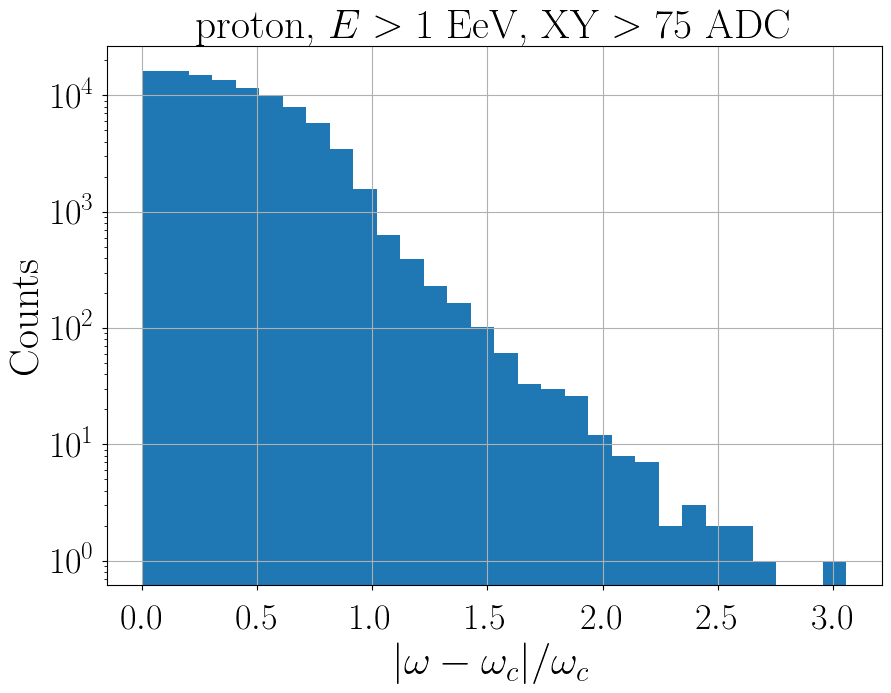

In [6]:
omega_diff = np.abs(omega-omega_c)/omega_c

fig, ax = plt.subplots()

ax.hist(omega_diff,bins=30)

ax.set_yscale('log')

ax.set_xlabel(r'$|\omega-\omega_c|/\omega_c$')
ax.set_ylabel('Counts')

ax.set_title(f'{primary}, ' + r'$E>1$ EeV, ' + f'{pol}' + r' $> 75$ ADC')

plt.show()

In the selected DUs of the simulations, we expect that as the zenith becomes more horizontal, the distribution of $\omega$ (centered around $\omega_c$) will become more narrow. This is due to the fact that the footprint becomes much larger for horizontal showers.

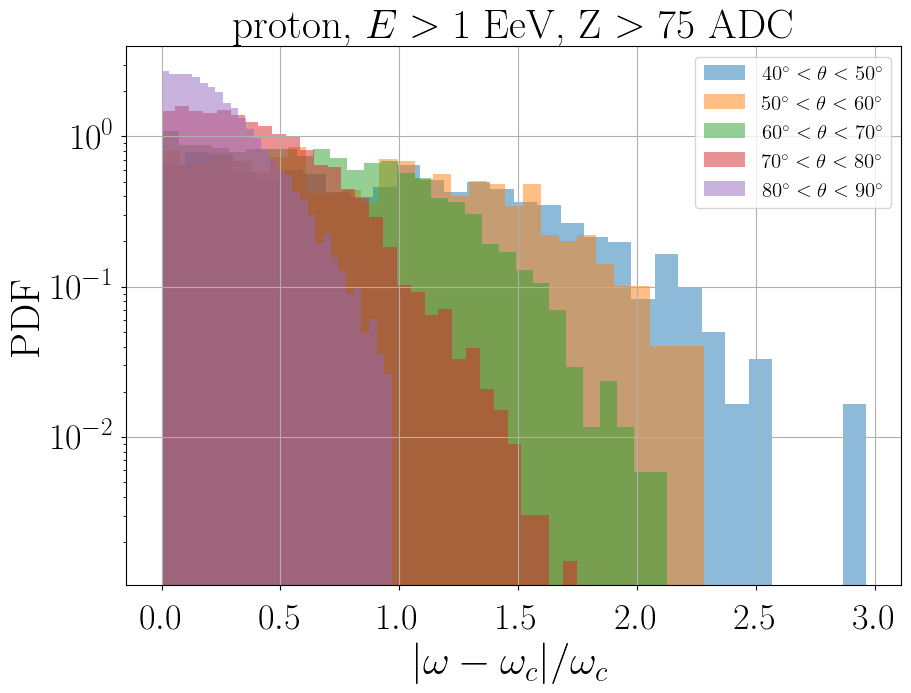

In [71]:
zenith_edges = np.linspace(40,90,6)

fig, ax = plt.subplots()

for i in range(len(zenith_edges[:-1])):
    mask = np.where(np.logical_and(zenith>zenith_edges[i],zenith<zenith_edges[i+1]))[0]
    
    label = r'$' + '{:.0f}'.format(zenith_edges[i]) + r'^{\circ}< \theta <' + '{:.0f}'.format(zenith_edges[i+1]) + r'^{\circ}$'
    ax.hist(omega_diff[mask],bins=30,density=True,alpha=.5,label=label)

    ax.set_yscale('log')

    ax.set_xlabel(r'$|\omega-\omega_c|/\omega_c$')
    ax.set_ylabel('PDF')

    ax.set_title(f'{primary}, ' + r'$E>1$ EeV, ' + f'{pol}' + r' $> 75$ ADC')

    ax.legend(frameon=True,fontsize=15)

plt.show()

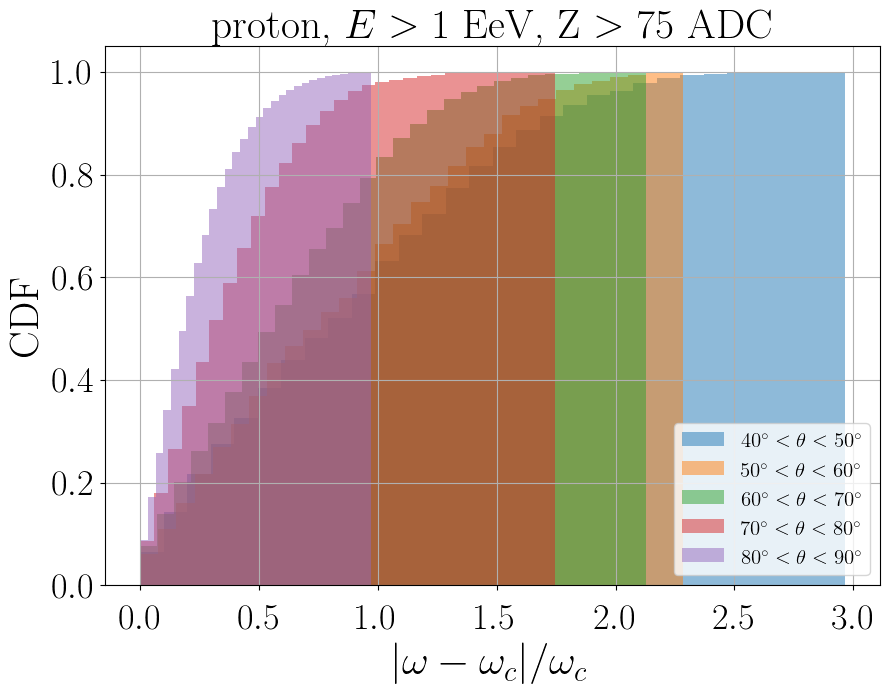

In [72]:
zenith_edges = np.linspace(40,90,6)

fig, ax = plt.subplots()

for i in range(len(zenith_edges[:-1])):
    mask = np.where(np.logical_and(zenith>zenith_edges[i],zenith<zenith_edges[i+1]))[0]
    
    label = r'$' + '{:.0f}'.format(zenith_edges[i]) + r'^{\circ}< \theta <' + '{:.0f}'.format(zenith_edges[i+1]) + r'^{\circ}$'
    ax.hist(omega_diff[mask],bins=30,density=True,alpha=.5,cumulative=True,label=label)

    #ax.set_yscale('log')

    ax.set_xlabel(r'$|\omega-\omega_c|/\omega_c$')
    ax.set_ylabel('CDF')

    ax.set_title(f'{primary}, ' + r'$E>1$ EeV, ' + f'{pol}' + r' $> 75$ ADC')

    ax.legend(frameon=True,fontsize=15,loc='lower right')

plt.show()

Plots above indicate that most of the interesting traces have $|\omega-\omega_c|/\omega_c < 2$. As such, we randomly select $20 \times 5$ traces binned uniformly in $|\omega-\omega_c|/\omega_c \in [0,2]$ (20 bins with width of 0.2) and in the simulated zenith range $\theta \in [31^\circ,87^\circ]$ (5 bins with width $11.2^\circ$).

/scratch/users/p/pcorrea/ipykernel_32945/1986320547.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


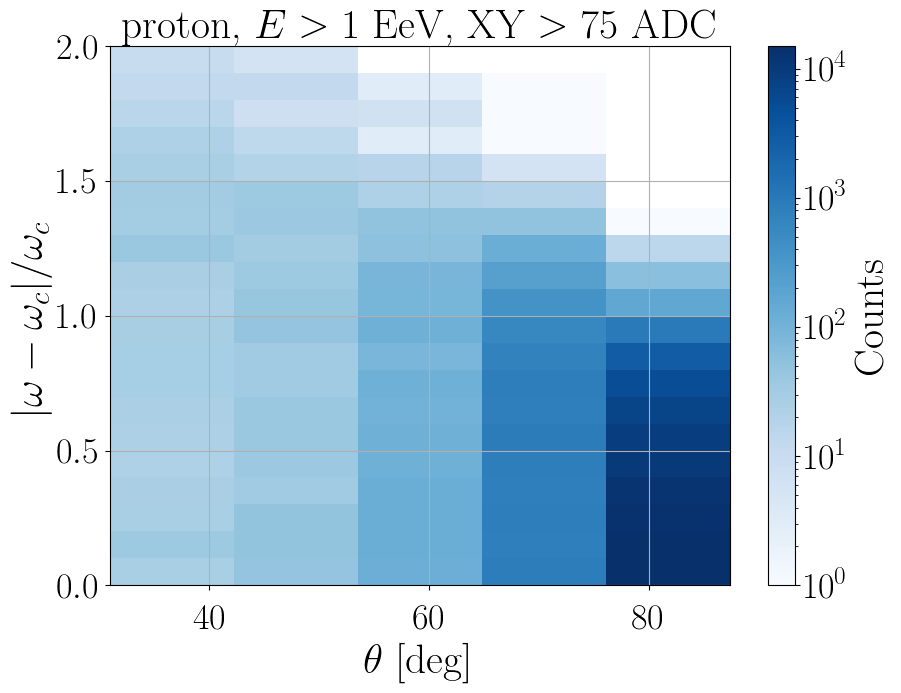

In [7]:
zenith_edges     = np.linspace(np.min(zenith),np.max(zenith),6)
omega_diff_edges = np.linspace(0,2,21)

fig, ax = plt.subplots()

hist2d = ax.hist2d(zenith,
                   omega_diff,
                   bins=[zenith_edges,omega_diff_edges],
                   cmap='Blues',
                   norm=matplotlib.colors.LogNorm())

ax.axvline(np.log10(75),
                color='k',
                linestyle='--')

fig.colorbar(hist2d[3], ax=ax, label='Counts')

ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$|\omega-\omega_c|/\omega_c$')

ax.set_title(f'{primary}, ' + r'$E>1$ EeV, ' + f'{pol}' + r' $> 75$ ADC')

ax.grid(True)

plt.show()

Here we perform the selection. In each bin of the plot above, we chose a random trace as template.

/scratch/users/p/pcorrea/ipykernel_10598/2373537338.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith[mask_sel],


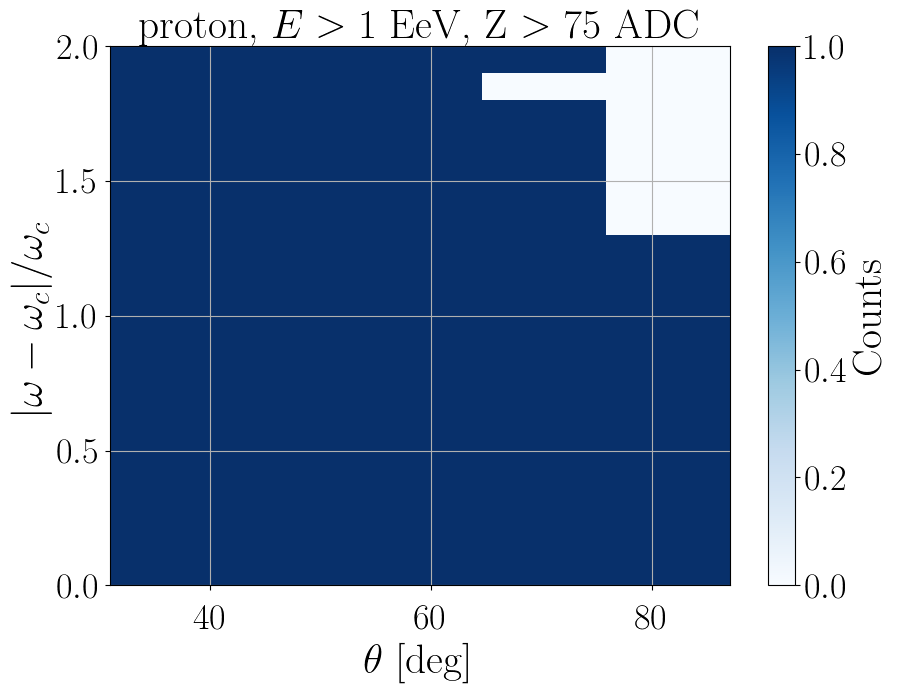

In [95]:
seed = int(2e5) # for GRAND200k! :)
np.random.seed(seed)

n_bins_zenith = len(zenith_edges)-1
n_bins_omega  = len(omega_diff_edges)-1
mask_sel      = np.zeros((n_bins_zenith,n_bins_omega),dtype=int)


for i in range(n_bins_zenith):
    mask_zenith = np.where( np.logical_and( zenith >= zenith_edges[i], zenith < zenith_edges[i+1] ) )[0]

    for j in range(n_bins_omega):
        mask_omega = np.where( np.logical_and( omega_diff[mask_zenith] >= omega_diff_edges[j], omega_diff[mask_zenith] < omega_diff_edges[j+1] ) )[0]

        if mask_omega.size > 0:
            mask_sel[i,j] = np.random.choice(mask_zenith[mask_omega])
            #print(zenith[mask_sel[i,j]],omega_diff[mask_sel[i,j]])

mask_sel = mask_sel[mask_sel>0].flatten()


fig, ax = plt.subplots()

hist2d = ax.hist2d(zenith[mask_sel],
                   omega_diff[mask_sel],
                   bins=[zenith_edges,omega_diff_edges],
                   cmap='Blues')

ax.axvline(np.log10(75),
                color='k',
                linestyle='--')

fig.colorbar(hist2d[3], ax=ax, label='Counts')

ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$|\omega-\omega_c|/\omega_c$')

ax.set_title(f'{primary}, ' + r'$E>1$ EeV, ' + f'{pol}' + r' $> 75$ ADC')

ax.grid(True)

plt.show()

Now it's time to actually select the template traces and save them. We only save a window $w = [t_{\max}-30,t_{\max}+70]$ of 100 samples (200 ns) of a template, where $t_{\max}$ is the time where the absolute value of the trace is maximal.

Each template is normalized by its RMS within the selected window. 

In [75]:
t_minus_peak = 30 # [ADC samples]
t_plus_peak  = 70
templates    = np.empty((mask_sel.size,t_minus_peak+t_plus_peak))

In [76]:
def rms(trace):
    return np.sqrt( np.mean( trace**2 ) )

log10(E/GeV) = 9.25, theta = 39.33 deg, phi = 257.01 deg, omega = 1.107 deg, omega_c = 1.135 deg, |omega-omega_c|/omega_c = 0.025 
Vpp = [3577. 1546. 1521.] ADC counts, pulse_width = [30. 19. 60.] ADC samples, n_peaks = [13.  8. 20.], peak_ratio = [1.25820707 1.16526611 1.01717791], peak_dist = [ 2.  2. 14.] ADC samples


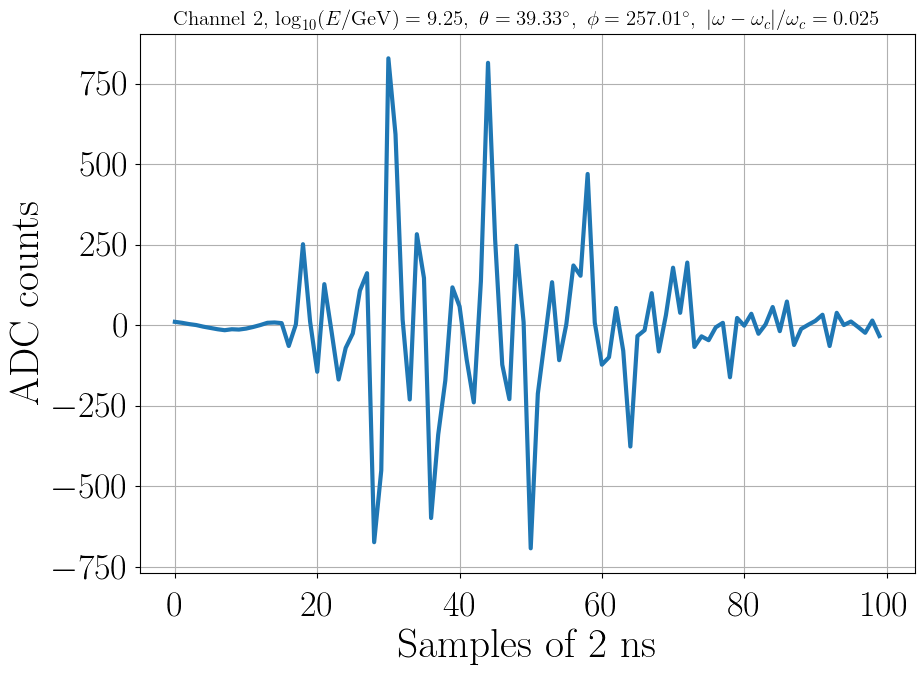

log10(E/GeV) = 9.59, theta = 32.73 deg, phi = 224.55 deg, omega = 1.257 deg, omega_c = 1.097 deg, |omega-omega_c|/omega_c = 0.146 
Vpp = [2313.  419. 2256.] ADC counts, pulse_width = [26. 11. 62.] ADC samples, n_peaks = [ 8.  5. 19.], peak_ratio = [1.31763527 1.42196532 1.13838863], peak_dist = [2. 2. 2.] ADC samples


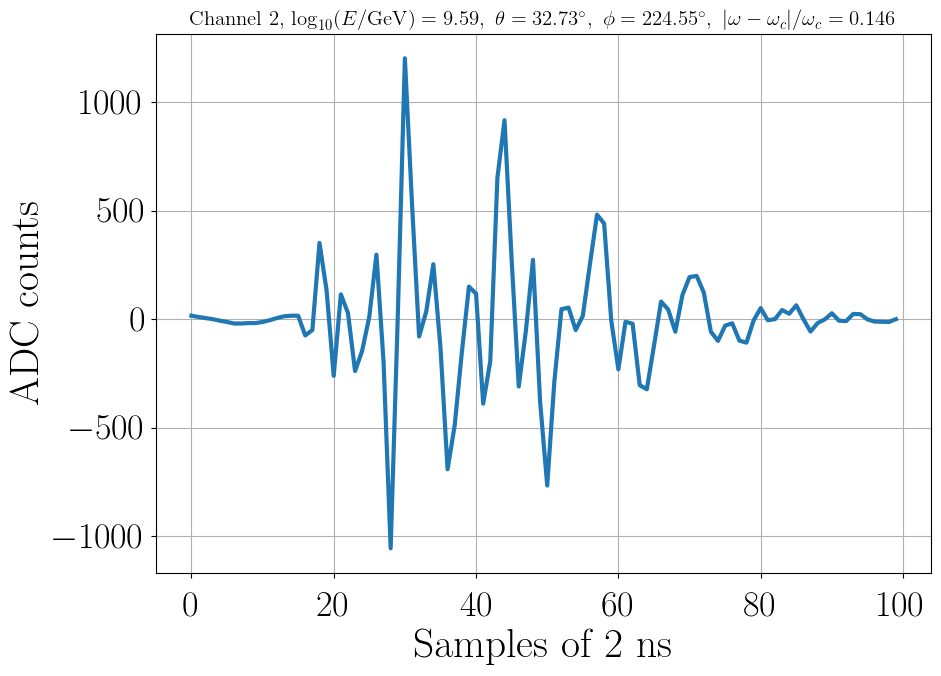

log10(E/GeV) = 9.54, theta = 41.59 deg, phi = 342.24 deg, omega = 1.413 deg, omega_c = 1.087 deg, |omega-omega_c|/omega_c = 0.299 
Vpp = [1351. 6270.  365.] ADC counts, pulse_width = [18. 48. 42.] ADC samples, n_peaks = [ 8. 16. 13.], peak_ratio = [1.14785374 1.15242019 1.18562874], peak_dist = [2. 2. 5.] ADC samples


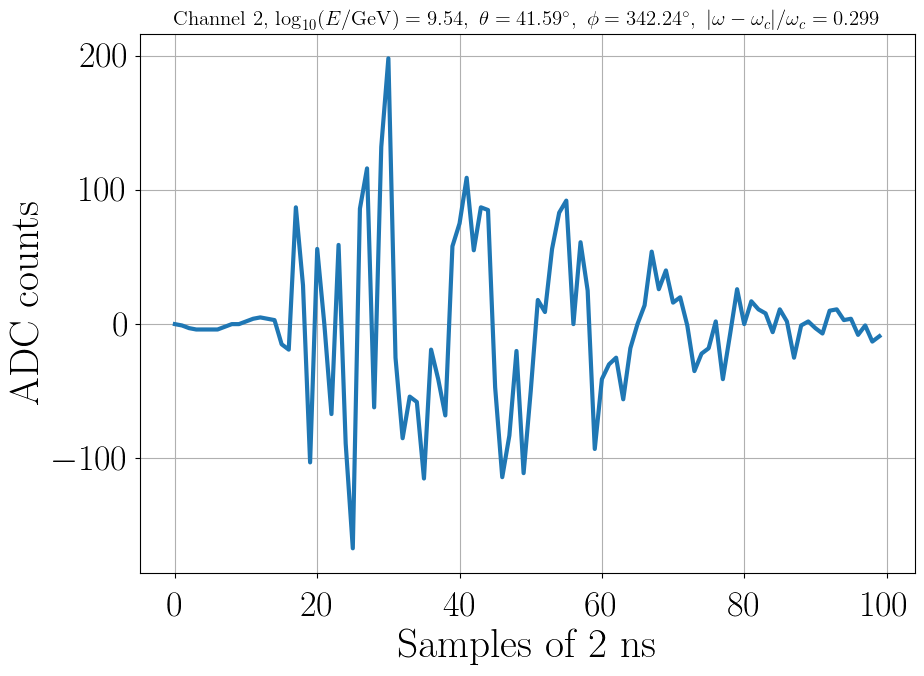

log10(E/GeV) = 9.17, theta = 39.60 deg, phi = 265.47 deg, omega = 0.687 deg, omega_c = 1.099 deg, |omega-omega_c|/omega_c = 0.375 
Vpp = [2722. 1041. 1777.] ADC counts, pulse_width = [28. 14. 60.] ADC samples, n_peaks = [10.  6. 17.], peak_ratio = [1.1265625  1.26304348 1.12052506], peak_dist = [2. 7. 5.] ADC samples


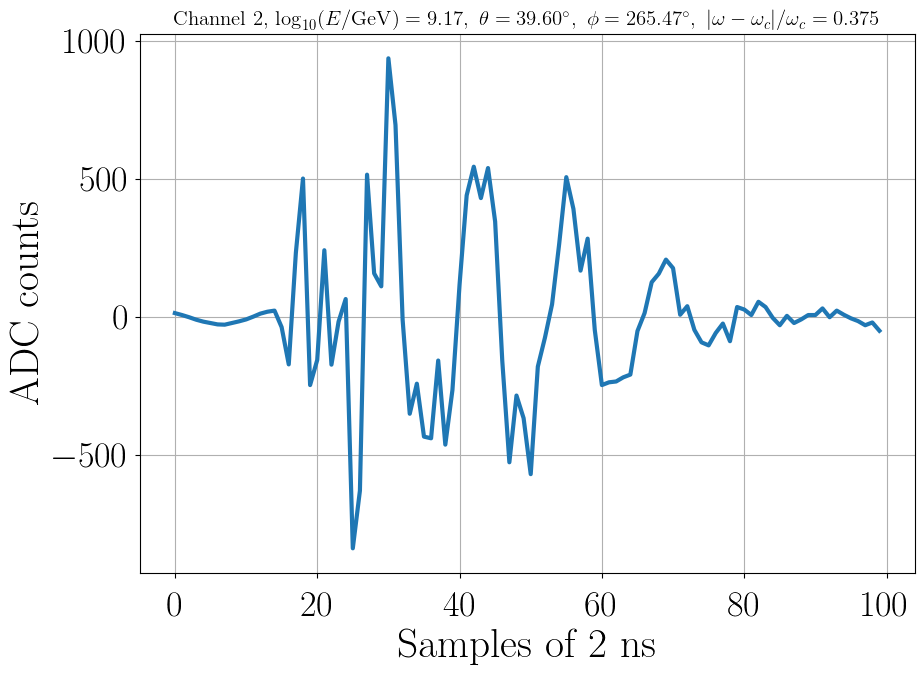

log10(E/GeV) = 9.34, theta = 32.17 deg, phi = 48.24 deg, omega = 0.596 deg, omega_c = 1.110 deg, |omega-omega_c|/omega_c = 0.463 
Vpp = [2491. 3862. 4284.] ADC counts, pulse_width = [34. 35. 81.] ADC samples, n_peaks = [12. 13. 20.], peak_ratio = [1.42787524 1.20938215 1.05270724], peak_dist = [2. 2. 2.] ADC samples


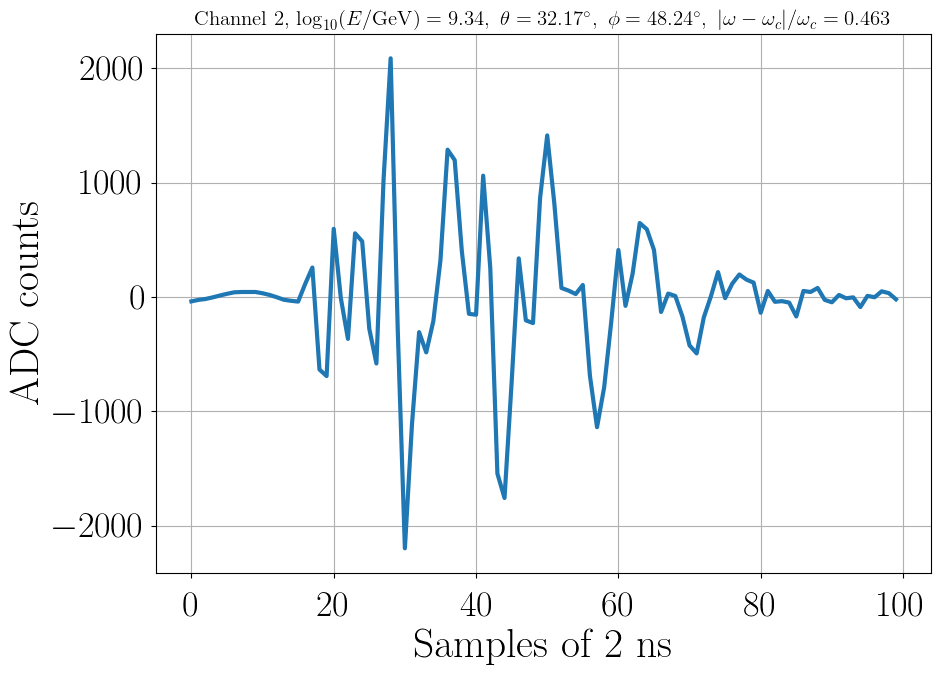

log10(E/GeV) = 9.37, theta = 39.48 deg, phi = 270.72 deg, omega = 1.700 deg, omega_c = 1.063 deg, |omega-omega_c|/omega_c = 0.600 
Vpp = [2079. 1414. 1751.] ADC counts, pulse_width = [29. 14. 59.] ADC samples, n_peaks = [11.  6. 16.], peak_ratio = [1.0625     1.02       1.08452381], peak_dist = [2. 2. 2.] ADC samples


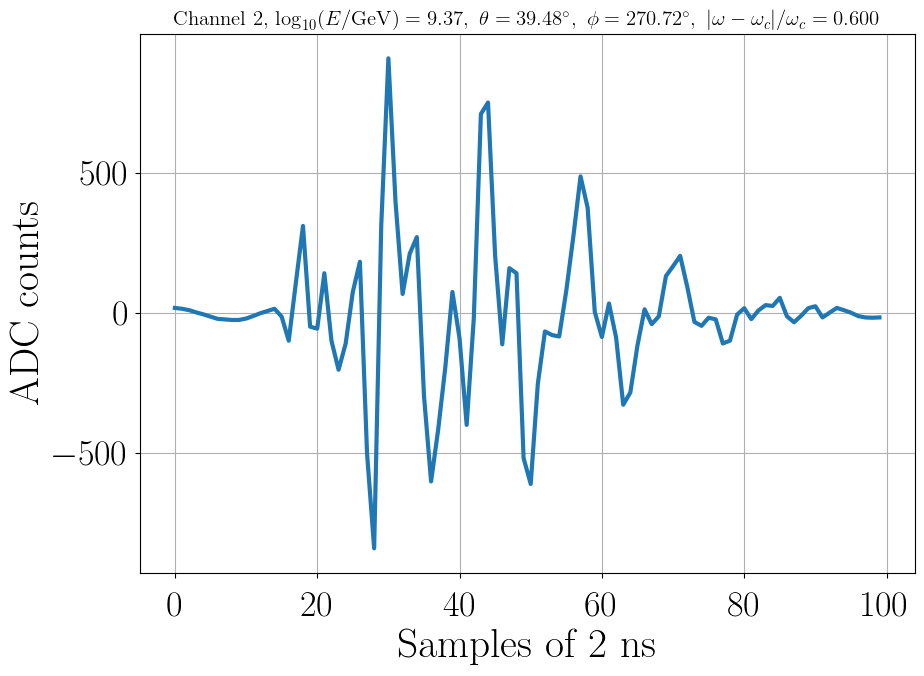

log10(E/GeV) = 9.41, theta = 41.74 deg, phi = 192.64 deg, omega = 1.898 deg, omega_c = 1.129 deg, |omega-omega_c|/omega_c = 0.680 
Vpp = [242. 296. 427.] ADC counts, pulse_width = [12. 11. 36.] ADC samples, n_peaks = [3. 3. 8.], peak_ratio = [1.10434783 1.20895522 1.00469484], peak_dist = [ 3.  2. 16.] ADC samples


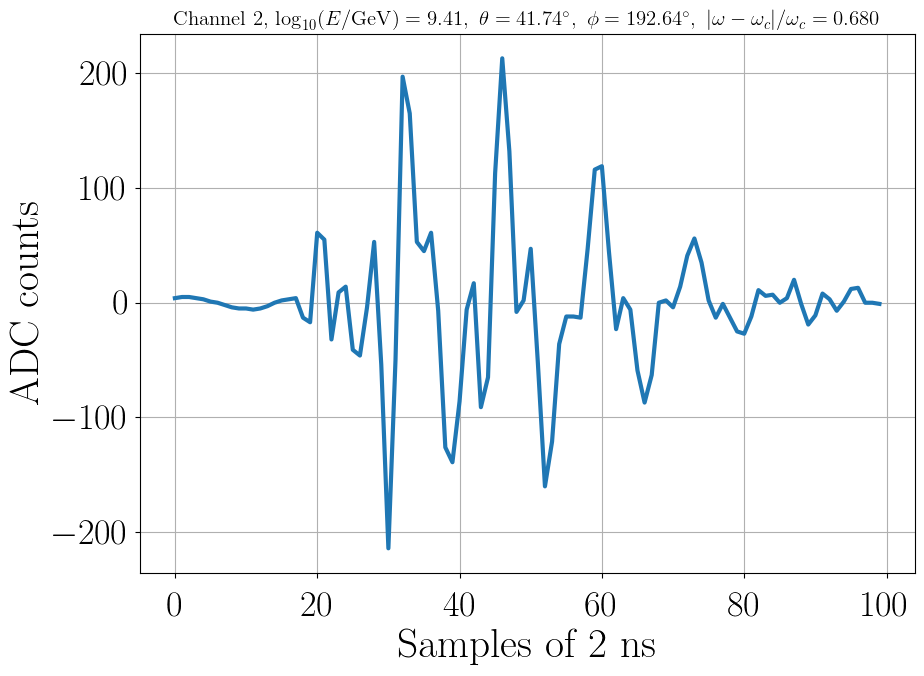

log10(E/GeV) = 9.21, theta = 35.19 deg, phi = 207.69 deg, omega = 1.914 deg, omega_c = 1.122 deg, |omega-omega_c|/omega_c = 0.705 
Vpp = [211.  67. 323.] ADC counts, pulse_width = [ 2. -1. 30.] ADC samples, n_peaks = [2. 0. 7.], peak_ratio = [ 1.11       -1.          1.19727891], peak_dist = [ 2. -1.  5.] ADC samples


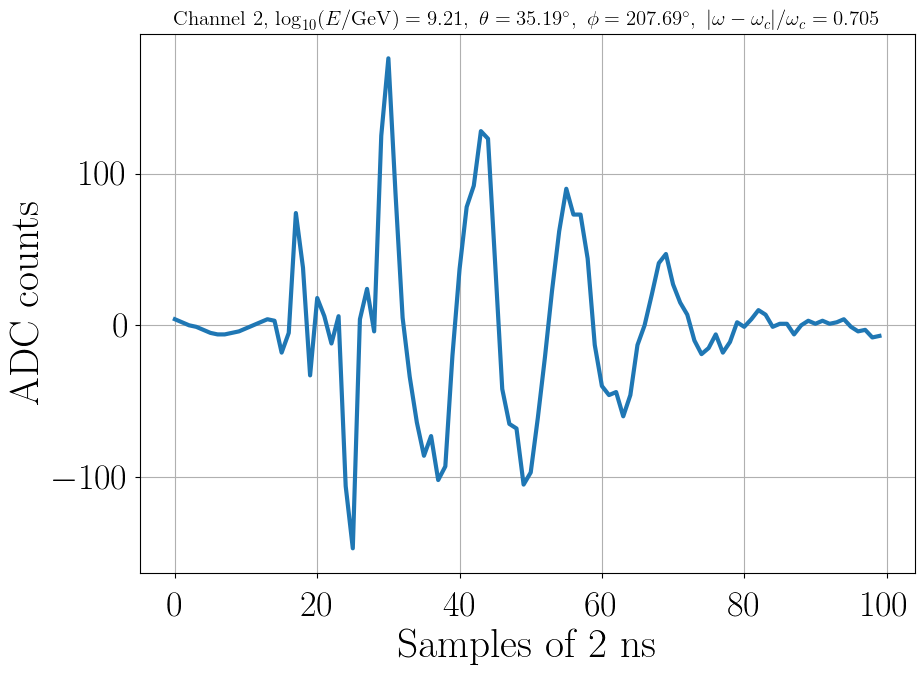

log10(E/GeV) = 9.35, theta = 41.85 deg, phi = 352.00 deg, omega = 2.048 deg, omega_c = 1.116 deg, |omega-omega_c|/omega_c = 0.835 
Vpp = [ 130. 2083.  275.] ADC counts, pulse_width = [ 0. 26. 32.] ADC samples, n_peaks = [1. 9. 6.], peak_ratio = [0.         1.05019685 1.08270677], peak_dist = [ 0.  2. 14.] ADC samples


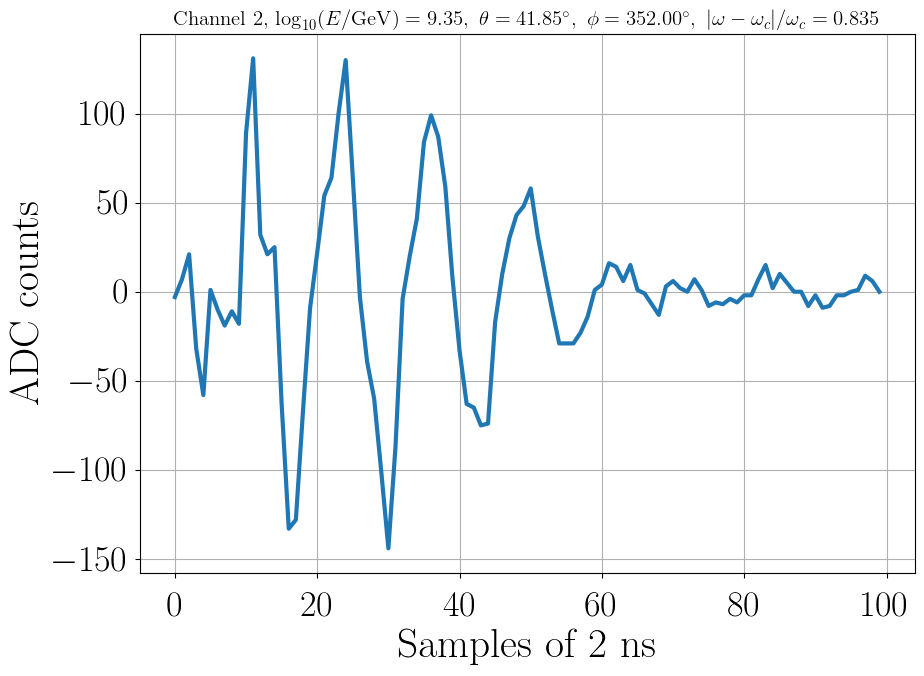

log10(E/GeV) = 9.14, theta = 38.08 deg, phi = 252.62 deg, omega = 2.294 deg, omega_c = 1.193 deg, |omega-omega_c|/omega_c = 0.923 
Vpp = [581. 295. 363.] ADC counts, pulse_width = [13. 11. 39.] ADC samples, n_peaks = [5. 4. 8.], peak_ratio = [1.08243728 1.04861111 1.02793296], peak_dist = [2. 2. 2.] ADC samples


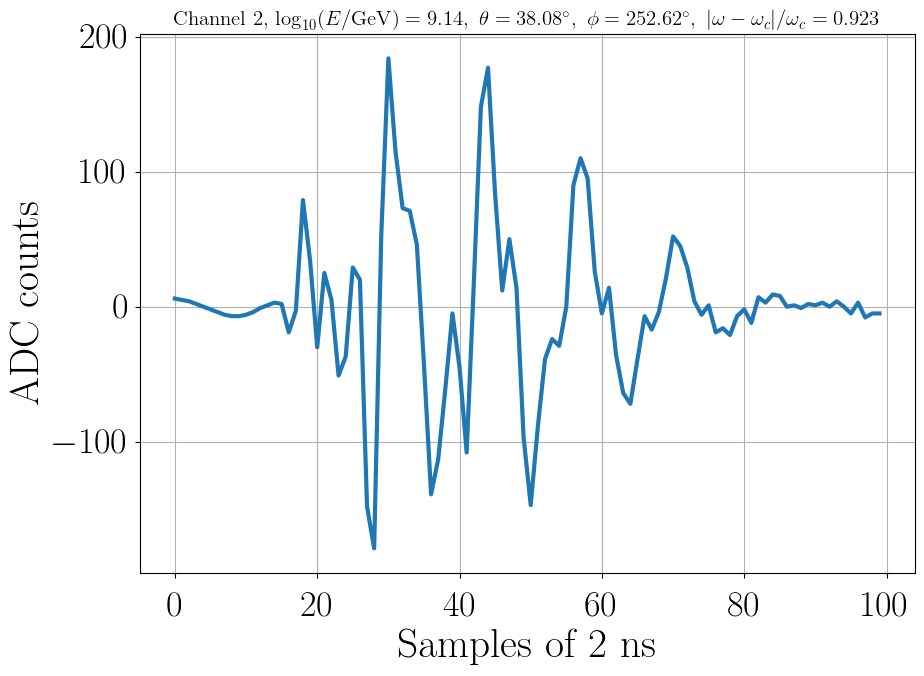

log10(E/GeV) = 9.02, theta = 39.77 deg, phi = 271.61 deg, omega = 2.148 deg, omega_c = 1.038 deg, |omega-omega_c|/omega_c = 1.071 
Vpp = [297. 158. 167.] ADC counts, pulse_width = [ 9.  0. 17.] ADC samples, n_peaks = [3. 1. 3.], peak_ratio = [1.02040816 0.         1.03658537], peak_dist = [2. 0. 5.] ADC samples


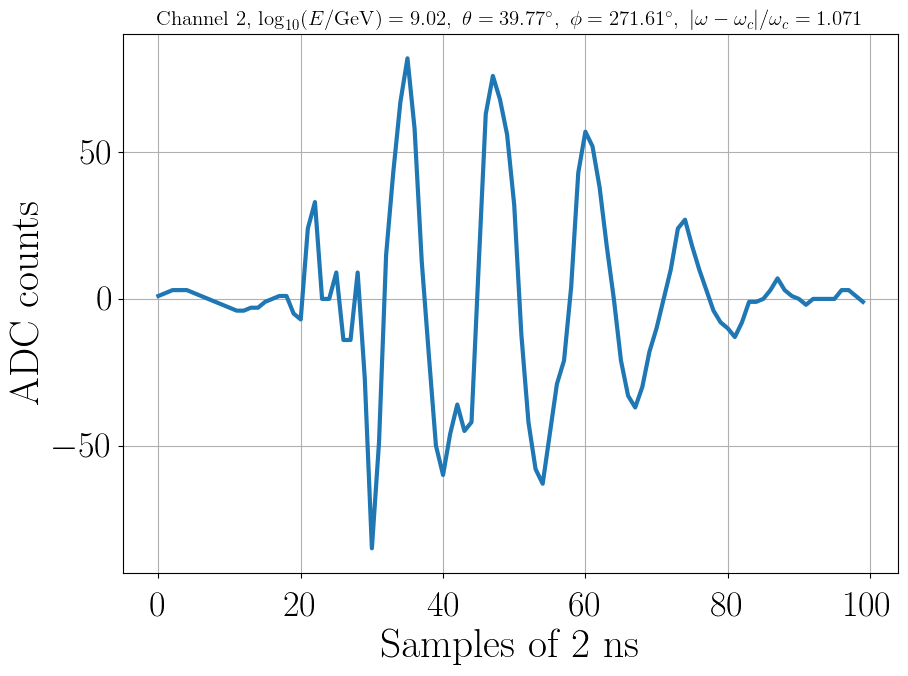

log10(E/GeV) = 9.38, theta = 36.90 deg, phi = 67.83 deg, omega = 2.318 deg, omega_c = 1.098 deg, |omega-omega_c|/omega_c = 1.112 
Vpp = [673. 651. 438.] ADC counts, pulse_width = [15. 18. 35.] ADC samples, n_peaks = [6. 6. 8.], peak_ratio = [1.02102102 1.04716981 1.02777778], peak_dist = [3. 3. 2.] ADC samples


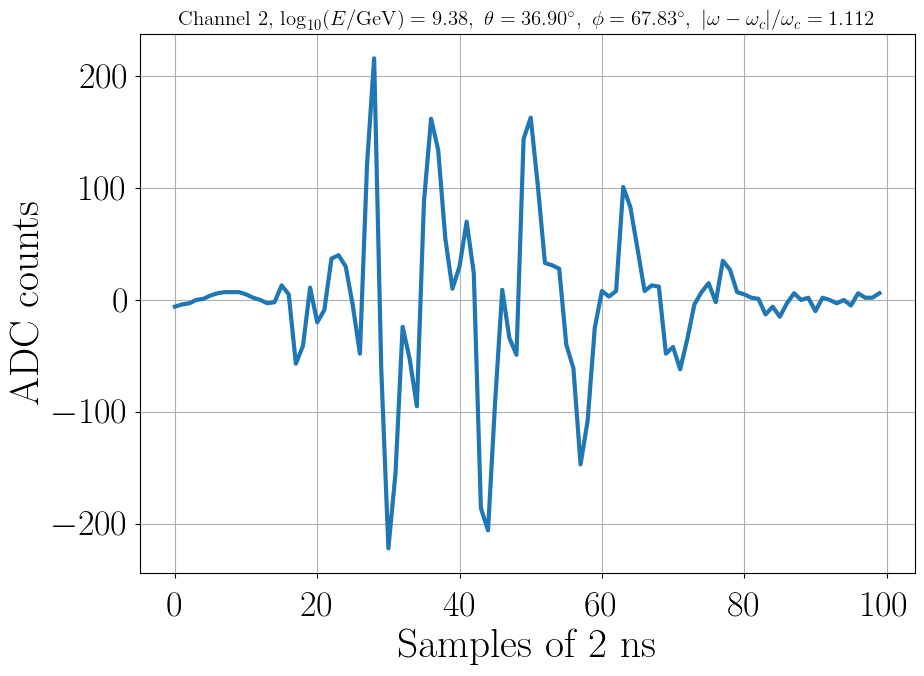

log10(E/GeV) = 9.55, theta = 33.78 deg, phi = 136.90 deg, omega = 2.455 deg, omega_c = 1.108 deg, |omega-omega_c|/omega_c = 1.216 
Vpp = [412.  63. 607.] ADC counts, pulse_width = [10. -1. 53.] ADC samples, n_peaks = [ 4.  0. 10.], peak_ratio = [ 1.19148936 -1.          1.06462585], peak_dist = [ 2. -1. 17.] ADC samples


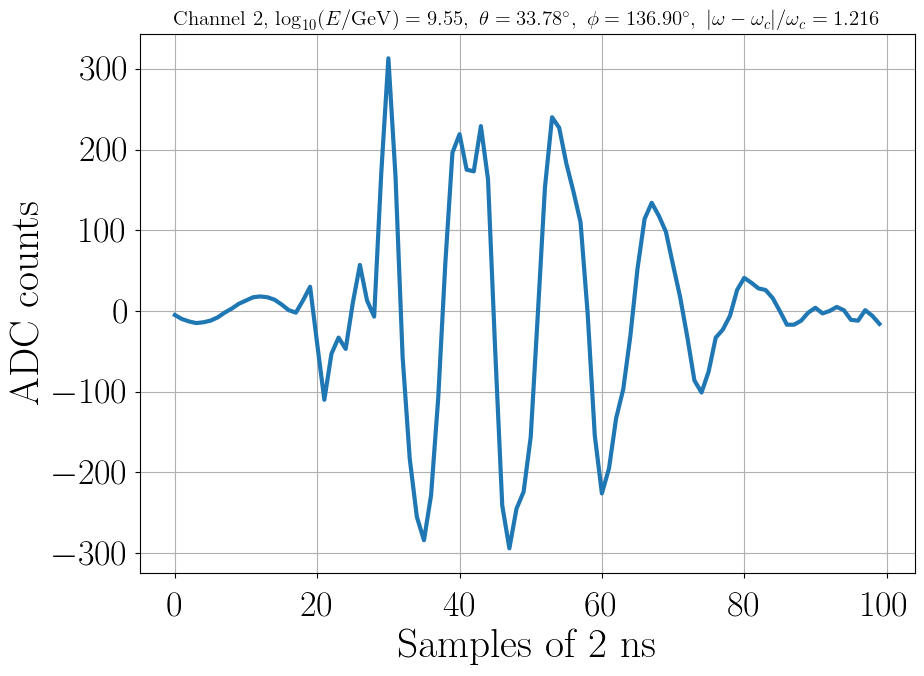

log10(E/GeV) = 9.42, theta = 34.03 deg, phi = 151.09 deg, omega = 2.657 deg, omega_c = 1.109 deg, |omega-omega_c|/omega_c = 1.396 
Vpp = [194.  53. 333.] ADC counts, pulse_width = [ 8. -1. 38.] ADC samples, n_peaks = [3. 0. 8.], peak_ratio = [ 1.30952381 -1.          1.01818182], peak_dist = [ 3. -1.  5.] ADC samples


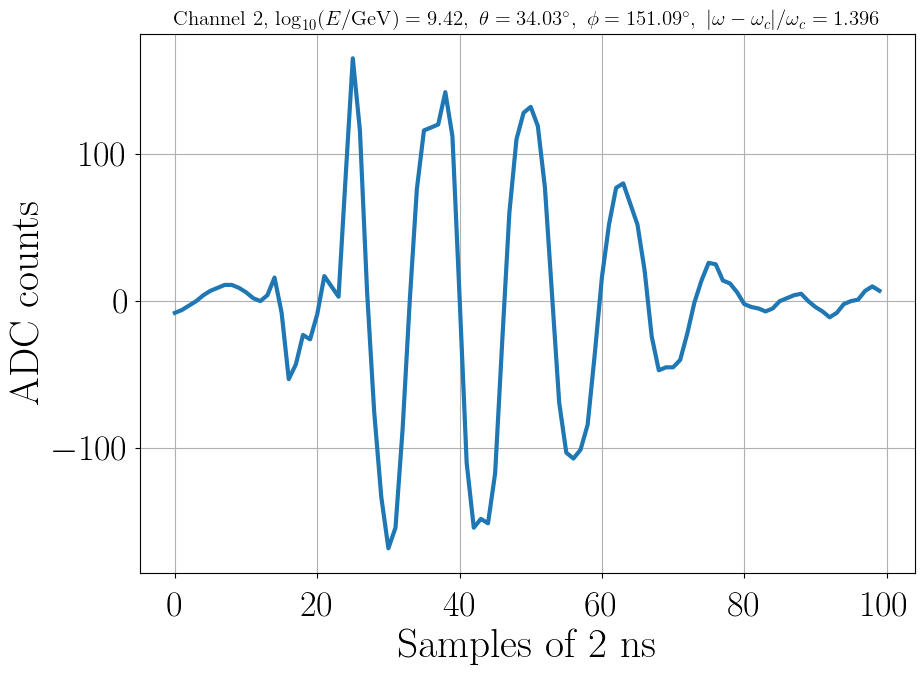

log10(E/GeV) = 9.50, theta = 37.48 deg, phi = 79.35 deg, omega = 2.789 deg, omega_c = 1.146 deg, |omega-omega_c|/omega_c = 1.435 
Vpp = [470. 282. 627.] ADC counts, pulse_width = [12. 11. 52.] ADC samples, n_peaks = [ 5.  4. 10.], peak_ratio = [1.1559633  1.01428571 1.01602564], peak_dist = [ 2.  3. 13.] ADC samples


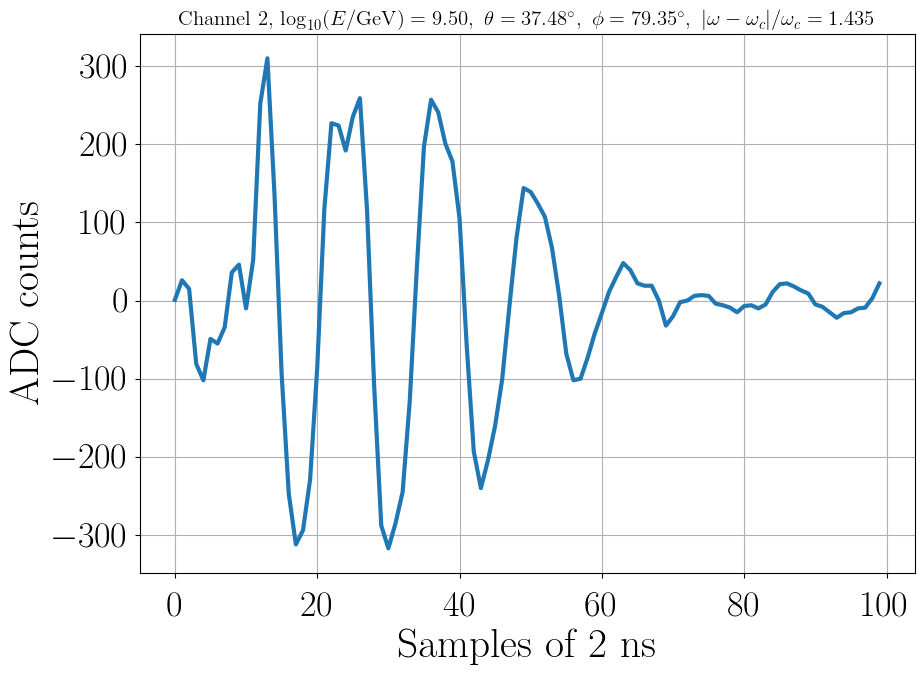

log10(E/GeV) = 9.24, theta = 38.09 deg, phi = 95.50 deg, omega = 2.711 deg, omega_c = 1.069 deg, |omega-omega_c|/omega_c = 1.535 
Vpp = [211. 110. 272.] ADC counts, pulse_width = [ 2. -1. 31.] ADC samples, n_peaks = [2. 0. 6.], peak_ratio = [ 1.2688172 -1.         1.       ], peak_dist = [ 2. -1. 13.] ADC samples


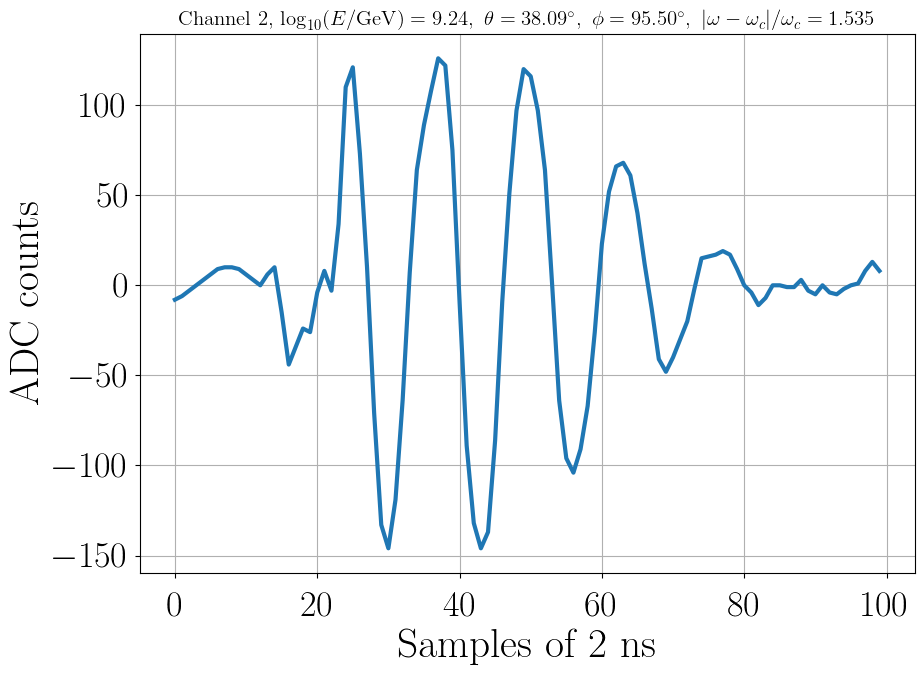

log10(E/GeV) = 9.24, theta = 38.09 deg, phi = 95.50 deg, omega = 2.790 deg, omega_c = 1.069 deg, |omega-omega_c|/omega_c = 1.609 
Vpp = [173.  75. 145.] ADC counts, pulse_width = [ 2. -1. 12.] ADC samples, n_peaks = [2. 0. 2.], peak_ratio = [ 1.21794872 -1.          1.01333333], peak_dist = [ 2. -1. 12.] ADC samples


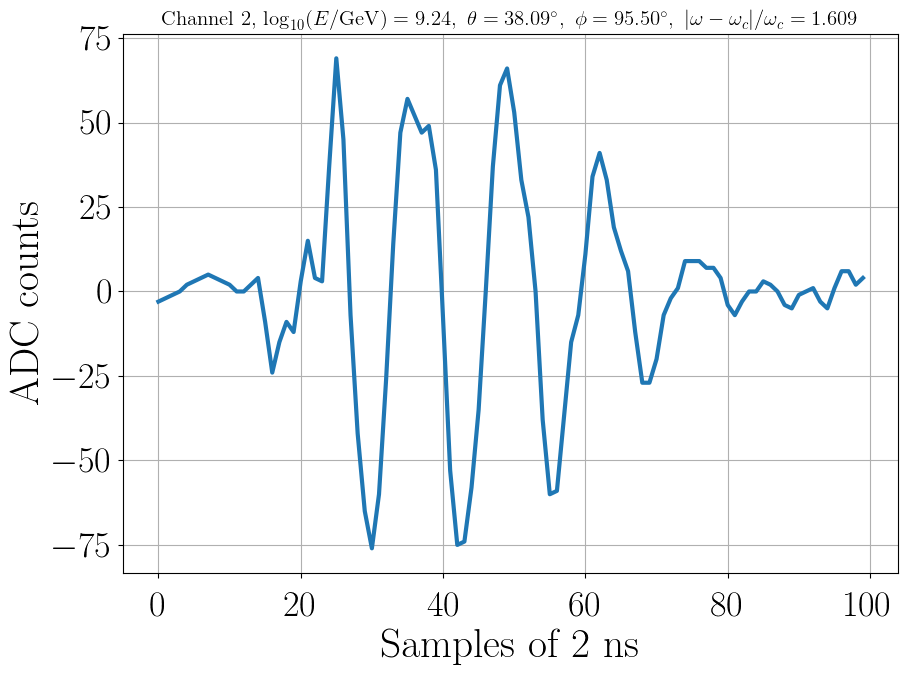

log10(E/GeV) = 9.29, theta = 33.22 deg, phi = 272.73 deg, omega = 3.011 deg, omega_c = 1.113 deg, |omega-omega_c|/omega_c = 1.704 
Vpp = [ 97. 102. 194.] ADC counts, pulse_width = [-1. -1. 24.] ADC samples, n_peaks = [0. 0. 5.], peak_ratio = [-1.         -1.          1.16483516], peak_dist = [-1. -1. 11.] ADC samples


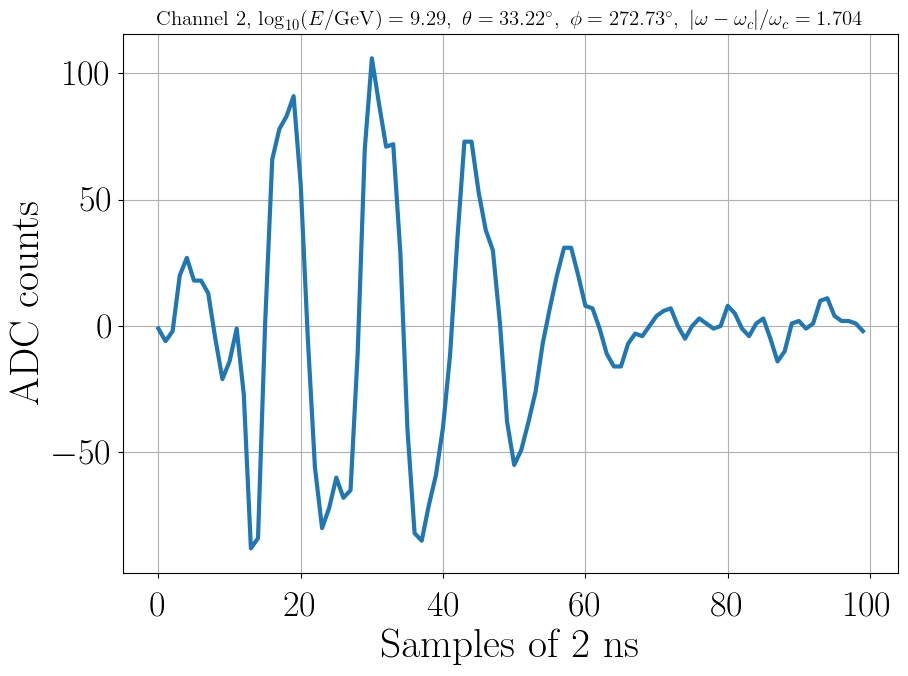

log10(E/GeV) = 9.30, theta = 37.18 deg, phi = 241.02 deg, omega = 3.299 deg, omega_c = 1.141 deg, |omega-omega_c|/omega_c = 1.891 
Vpp = [152.  51. 165.] ADC counts, pulse_width = [ 0. -1. 14.] ADC samples, n_peaks = [1. 0. 2.], peak_ratio = [ 0.         -1.          1.12195122], peak_dist = [ 0. -1. 14.] ADC samples


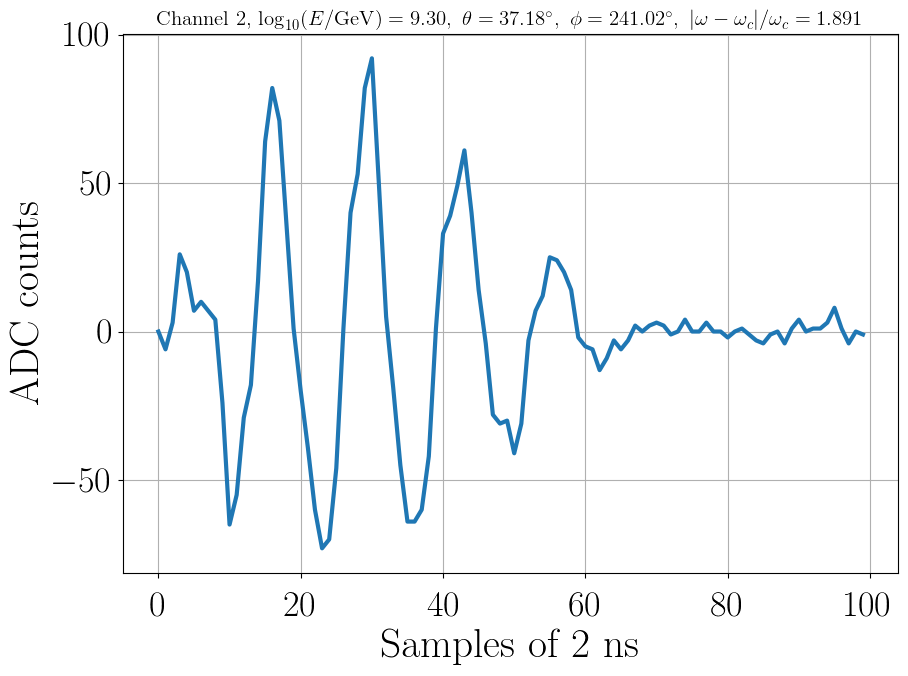

log10(E/GeV) = 9.48, theta = 41.34 deg, phi = 321.98 deg, omega = 3.191 deg, omega_c = 1.094 deg, |omega-omega_c|/omega_c = 1.916 
Vpp = [ 74. 193. 173.] ADC counts, pulse_width = [-1.  3. 20.] ADC samples, n_peaks = [0. 2. 4.], peak_ratio = [-1.          1.19318182  1.25974026], peak_dist = [-1.  3. 14.] ADC samples


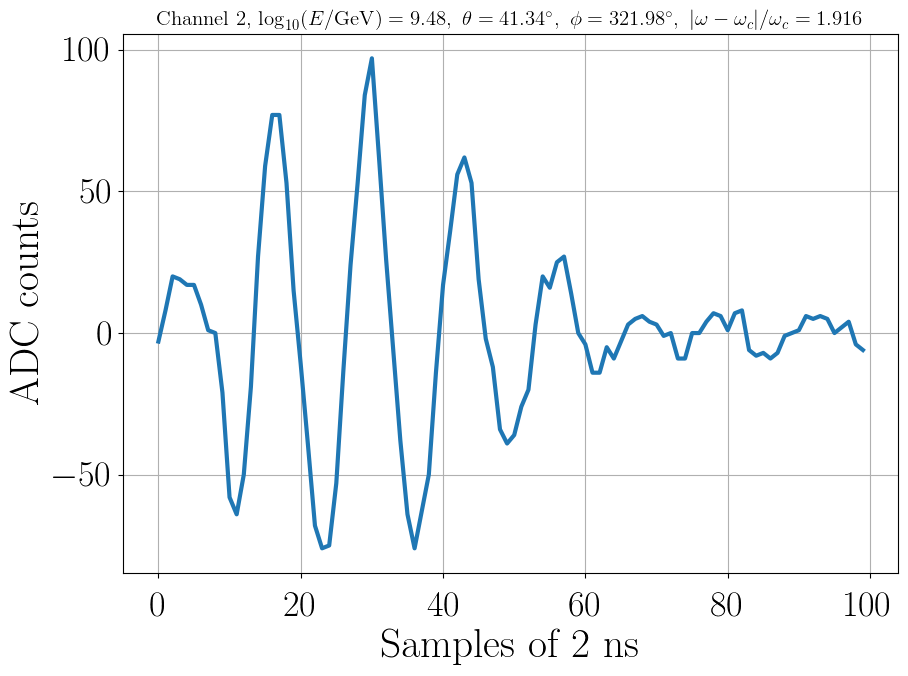

log10(E/GeV) = 9.54, theta = 43.66 deg, phi = 181.43 deg, omega = 1.156 deg, omega_c = 1.120 deg, |omega-omega_c|/omega_c = 0.032 
Vpp = [ 274. 3053.  232.] ADC counts, pulse_width = [ 2. 34. 29.] ADC samples, n_peaks = [ 2. 15.  5.], peak_ratio = [1.02962963 1.20115357 1.09009009], peak_dist = [2. 2. 2.] ADC samples


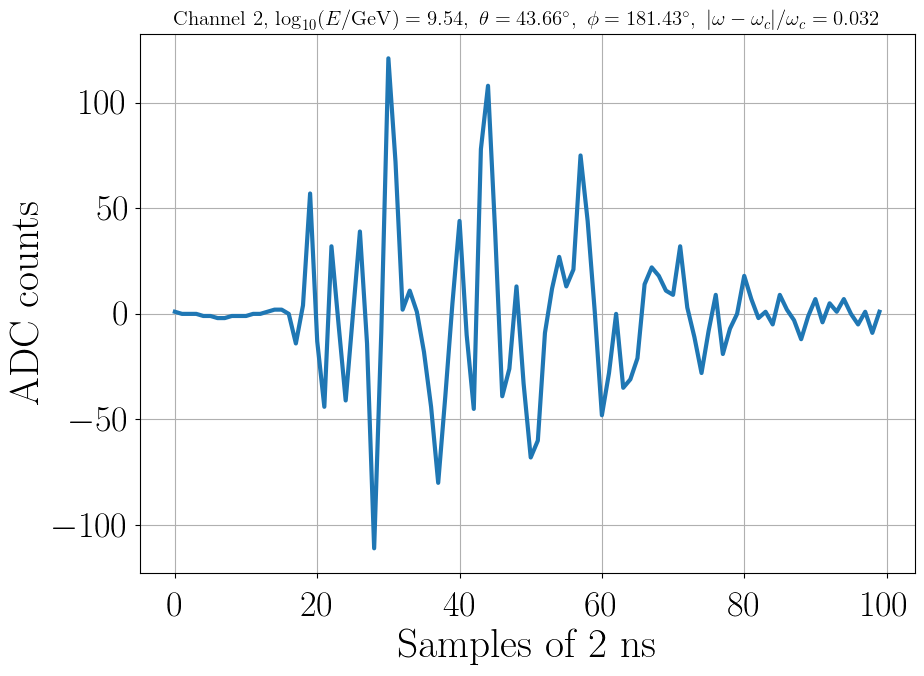

log10(E/GeV) = 9.33, theta = 44.69 deg, phi = 108.62 deg, omega = 1.135 deg, omega_c = 1.026 deg, |omega-omega_c|/omega_c = 0.105 
Vpp = [3161.  697. 1398.] ADC counts, pulse_width = [33. 14. 60.] ADC samples, n_peaks = [11.  6. 17.], peak_ratio = [1.28726483 1.05       1.28805237], peak_dist = [ 2.  2. 16.] ADC samples


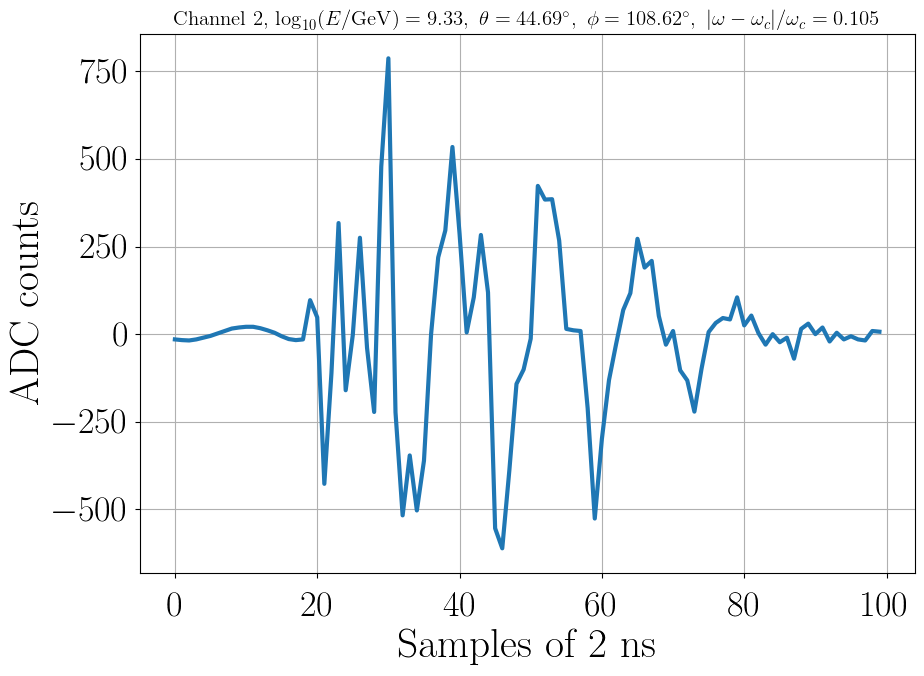

log10(E/GeV) = 9.08, theta = 50.50 deg, phi = 283.58 deg, omega = 1.315 deg, omega_c = 1.042 deg, |omega-omega_c|/omega_c = 0.262 
Vpp = [1237.  579.  866.] ADC counts, pulse_width = [15. 12. 54.] ADC samples, n_peaks = [ 7.  5. 17.], peak_ratio = [1.16637478 1.08273381 1.06682578], peak_dist = [2. 2. 5.] ADC samples


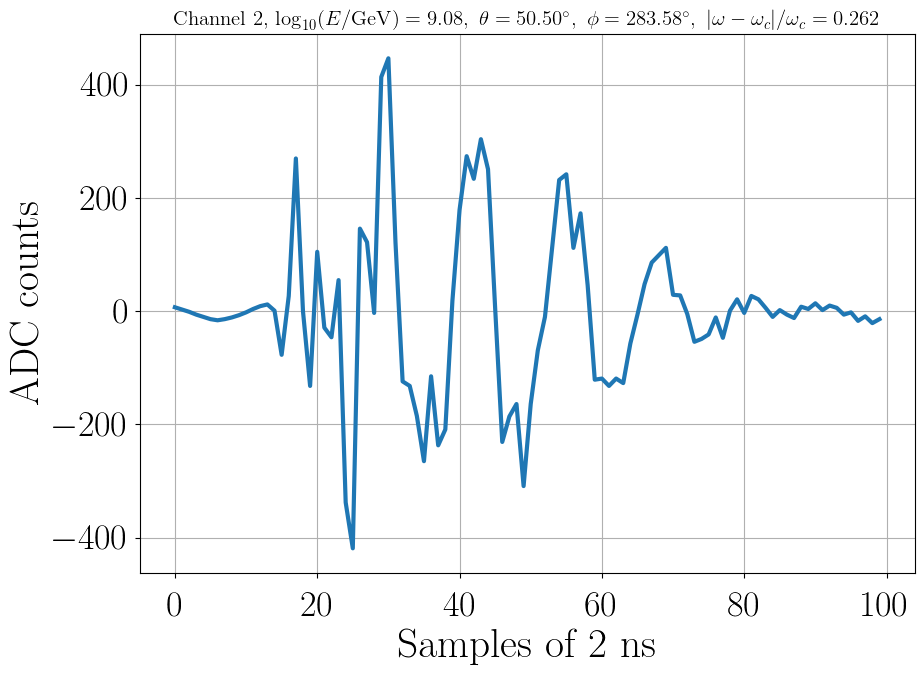

log10(E/GeV) = 9.11, theta = 47.54 deg, phi = 7.99 deg, omega = 1.457 deg, omega_c = 1.054 deg, |omega-omega_c|/omega_c = 0.383 
Vpp = [ 395. 1437.  538.] ADC counts, pulse_width = [14. 13. 51.] ADC samples, n_peaks = [ 6.  6. 13.], peak_ratio = [1.035      1.08866279 1.11811024], peak_dist = [5. 2. 4.] ADC samples


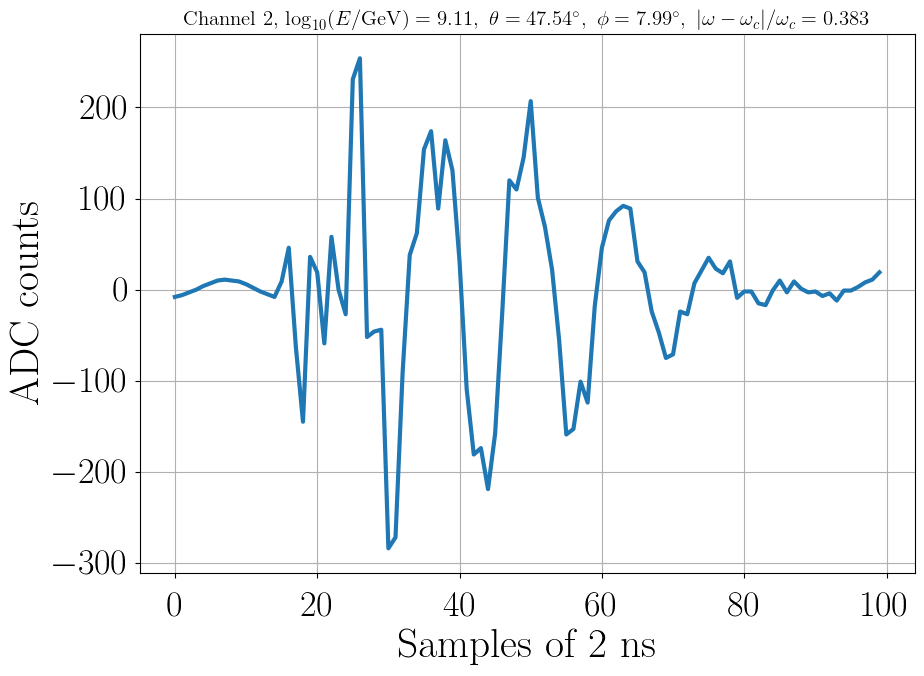

log10(E/GeV) = 9.45, theta = 51.12 deg, phi = 92.43 deg, omega = 1.439 deg, omega_c = 1.002 deg, |omega-omega_c|/omega_c = 0.436 
Vpp = [2022.  913. 1080.] ADC counts, pulse_width = [18. 14. 54.] ADC samples, n_peaks = [ 8.  6. 14.], peak_ratio = [1.12394958 1.03340757 1.03389831], peak_dist = [2. 2. 5.] ADC samples


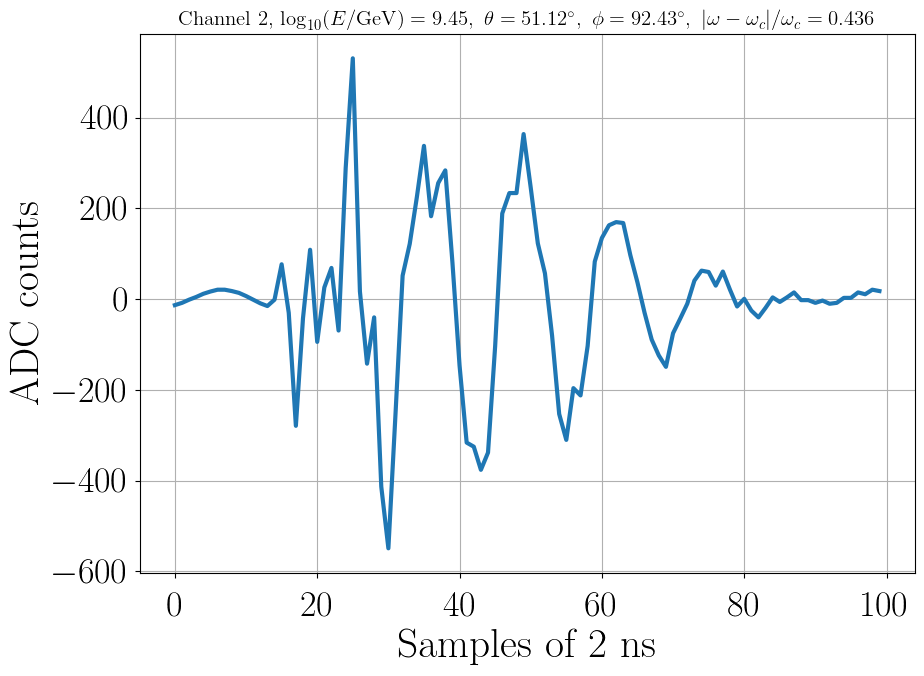

log10(E/GeV) = 9.38, theta = 46.36 deg, phi = 253.34 deg, omega = 0.422 deg, omega_c = 1.009 deg, |omega-omega_c|/omega_c = 0.582 
Vpp = [3221.  888. 1522.] ADC counts, pulse_width = [37. 15. 57.] ADC samples, n_peaks = [10.  6. 15.], peak_ratio = [1.37536873 1.21167883 1.15275813], peak_dist = [2. 7. 4.] ADC samples


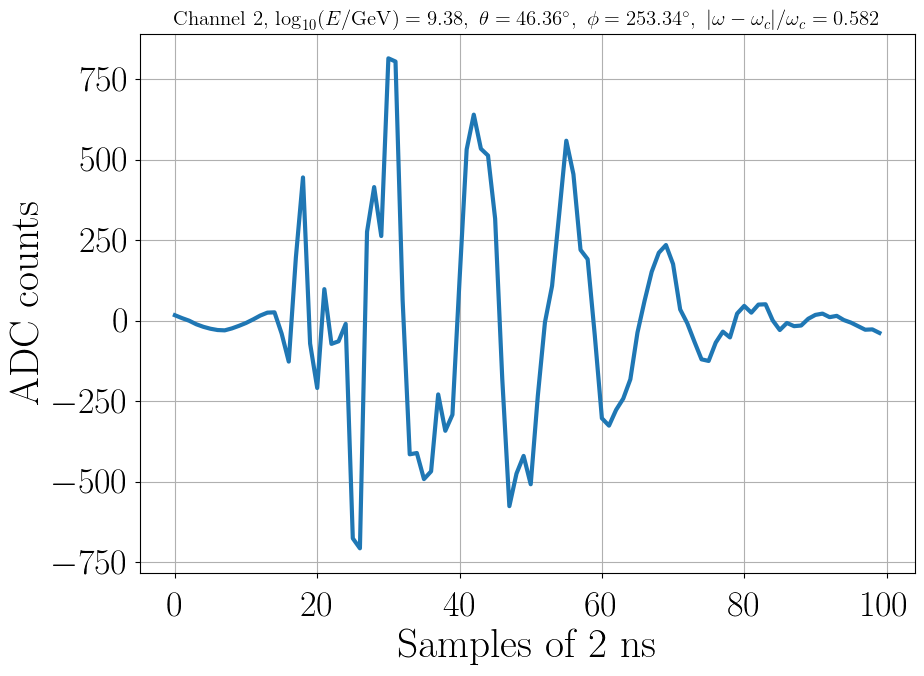

log10(E/GeV) = 9.16, theta = 43.59 deg, phi = 225.20 deg, omega = 1.746 deg, omega_c = 1.033 deg, |omega-omega_c|/omega_c = 0.690 
Vpp = [589. 275. 637.] ADC counts, pulse_width = [12.  4. 51.] ADC samples, n_peaks = [ 5.  3. 11.], peak_ratio = [1.06666667 1.4122807  1.06148867], peak_dist = [2. 2. 5.] ADC samples


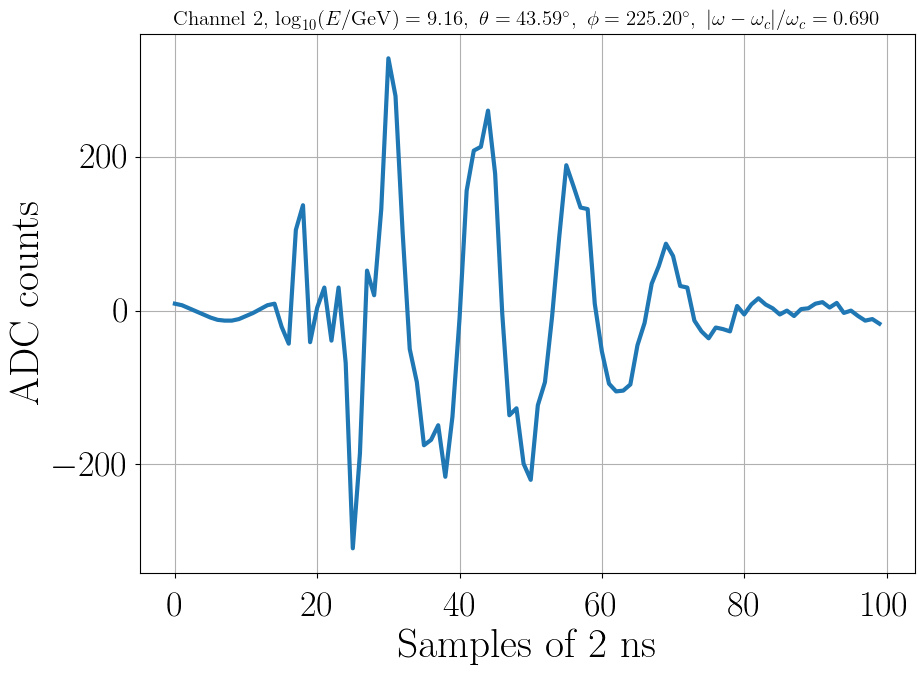

log10(E/GeV) = 9.28, theta = 46.46 deg, phi = 231.61 deg, omega = 1.953 deg, omega_c = 1.101 deg, |omega-omega_c|/omega_c = 0.773 
Vpp = [1280.  224.  695.] ADC counts, pulse_width = [14.  5. 52.] ADC samples, n_peaks = [ 7.  3. 11.], peak_ratio = [1.03821656 1.11320755 1.15838509], peak_dist = [ 2.  2. 16.] ADC samples


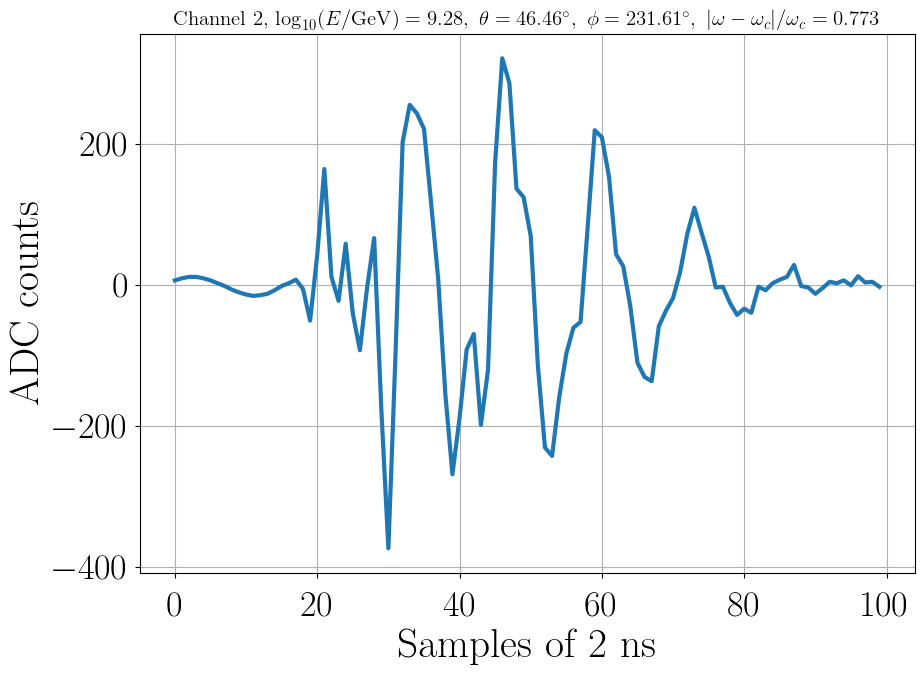

log10(E/GeV) = 9.56, theta = 46.39 deg, phi = 21.20 deg, omega = 1.940 deg, omega_c = 1.048 deg, |omega-omega_c|/omega_c = 0.850 
Vpp = [ 667. 2695.  920.] ADC counts, pulse_width = [13. 29. 52.] ADC samples, n_peaks = [ 6.  8. 12.], peak_ratio = [1.06287425 1.02631579 1.20412844], peak_dist = [ 5.  2. 13.] ADC samples


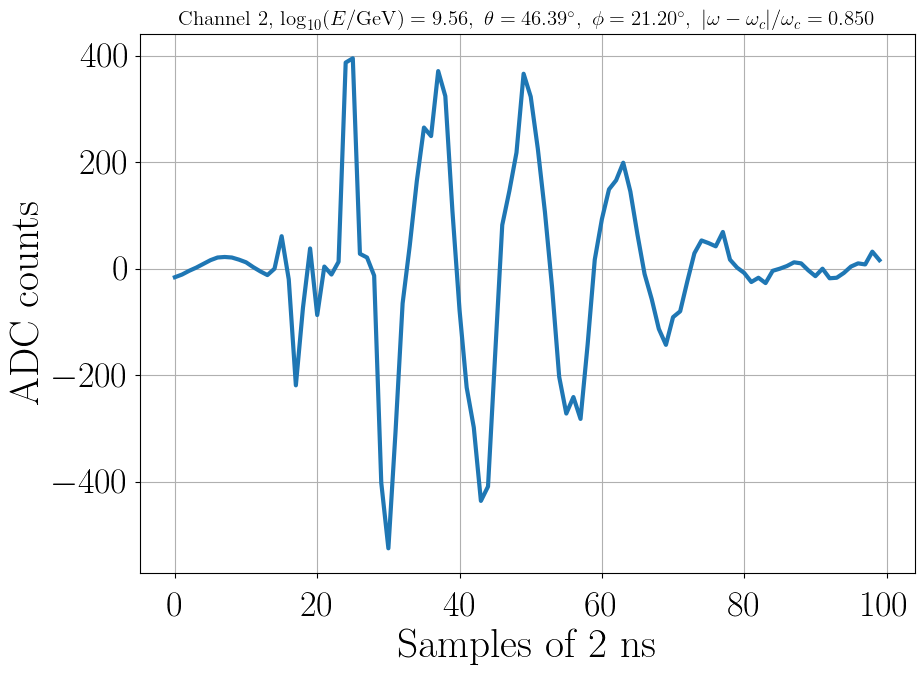

log10(E/GeV) = 9.10, theta = 42.94 deg, phi = 325.62 deg, omega = 2.102 deg, omega_c = 1.067 deg, |omega-omega_c|/omega_c = 0.970 
Vpp = [230. 414. 149.] ADC counts, pulse_width = [10. 13.  0.] ADC samples, n_peaks = [3. 5. 1.], peak_ratio = [1.12962963 1.1122449  0.        ], peak_dist = [3. 3. 0.] ADC samples


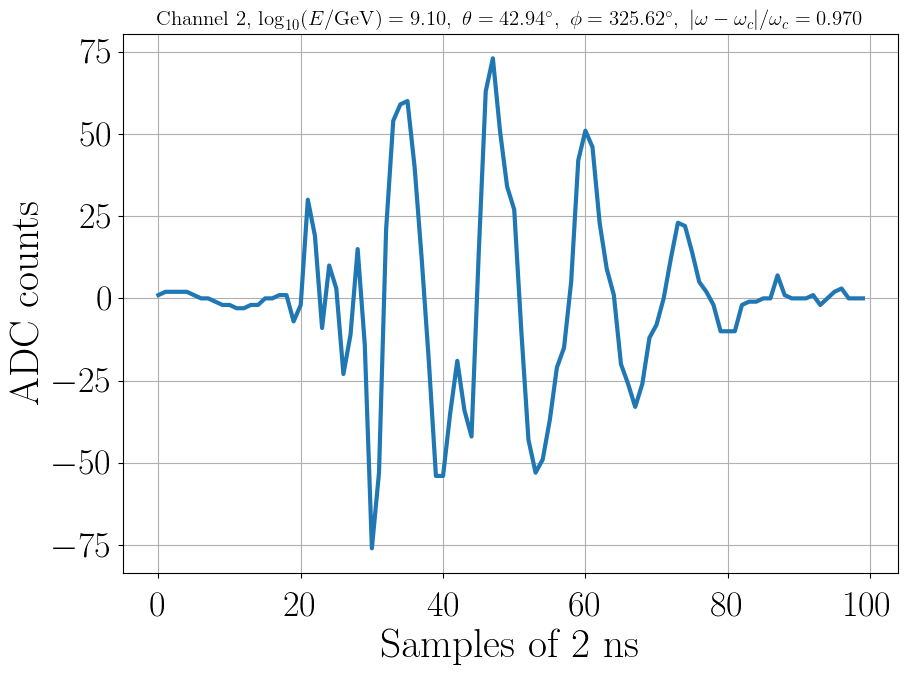

log10(E/GeV) = 9.34, theta = 51.87 deg, phi = 272.96 deg, omega = 1.953 deg, omega_c = 0.968 deg, |omega-omega_c|/omega_c = 1.018 
Vpp = [536. 211. 632.] ADC counts, pulse_width = [ 8.  5. 52.] ADC samples, n_peaks = [ 4.  3. 10.], peak_ratio = [1.13545817 1.15306122 1.        ], peak_dist = [2. 3. 7.] ADC samples


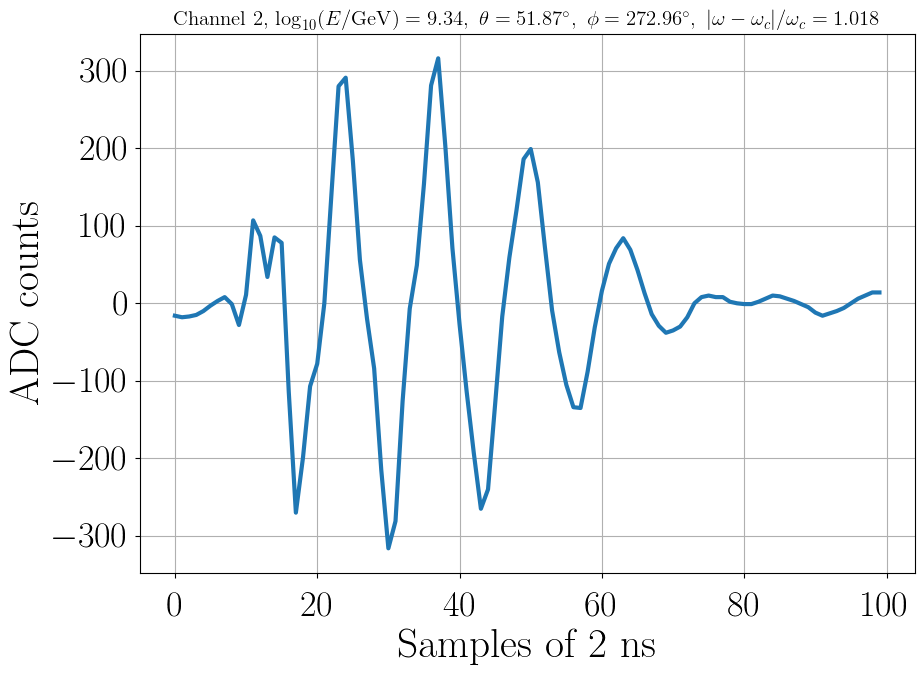

log10(E/GeV) = 9.23, theta = 45.28 deg, phi = 128.98 deg, omega = 2.283 deg, omega_c = 1.055 deg, |omega-omega_c|/omega_c = 1.164 
Vpp = [287. 123. 421.] ADC counts, pulse_width = [ 6. -1. 38.] ADC samples, n_peaks = [3. 0. 7.], peak_ratio = [ 1.27777778 -1.          1.01293103], peak_dist = [ 2. -1. 14.] ADC samples


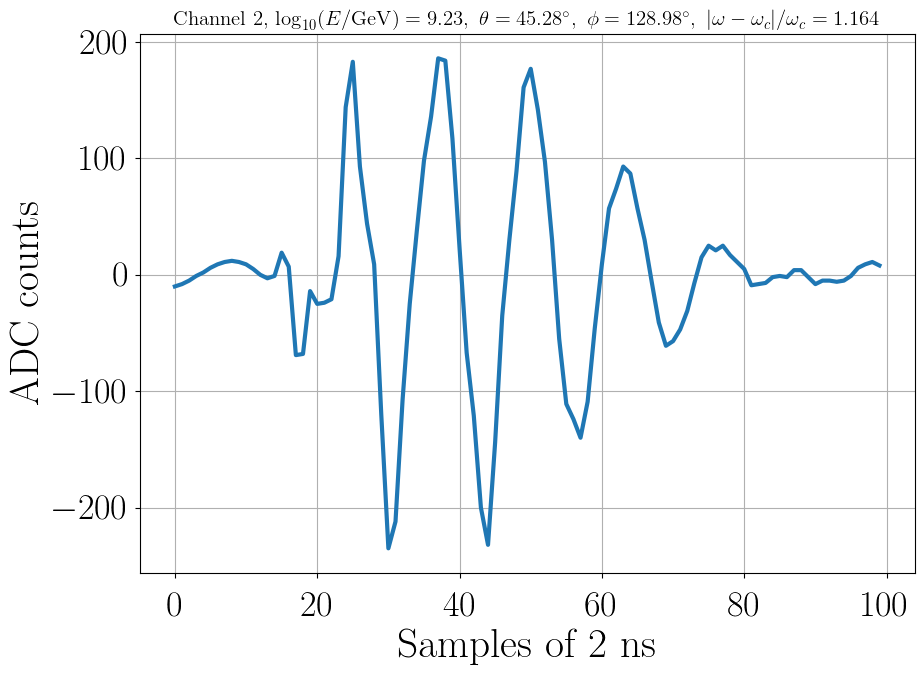

log10(E/GeV) = 9.25, theta = 45.85 deg, phi = 35.87 deg, omega = 2.359 deg, omega_c = 1.046 deg, |omega-omega_c|/omega_c = 1.255 
Vpp = [361. 566. 325.] ADC counts, pulse_width = [11. 11. 36.] ADC samples, n_peaks = [3. 5. 9.], peak_ratio = [1.0867052  1.01423488 1.00581395], peak_dist = [ 2.  2. 14.] ADC samples


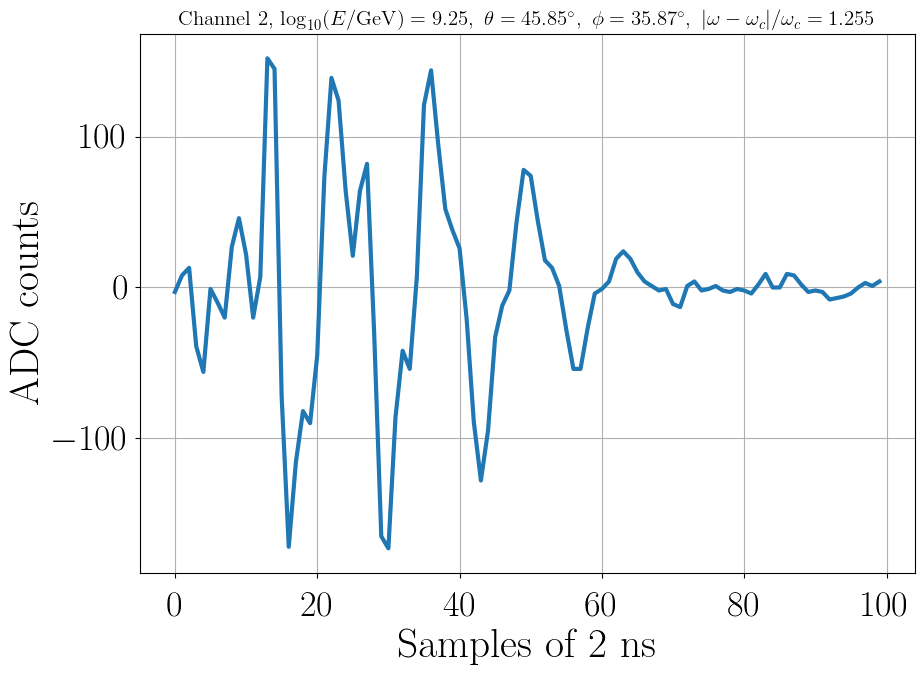

log10(E/GeV) = 9.56, theta = 44.99 deg, phi = 129.44 deg, omega = 2.387 deg, omega_c = 1.033 deg, |omega-omega_c|/omega_c = 1.312 
Vpp = [445. 133. 463.] ADC counts, pulse_width = [11. -1. 46.] ADC samples, n_peaks = [5. 0. 8.], peak_ratio = [ 1.28205128 -1.          1.041841  ], peak_dist = [ 2. -1. 13.] ADC samples


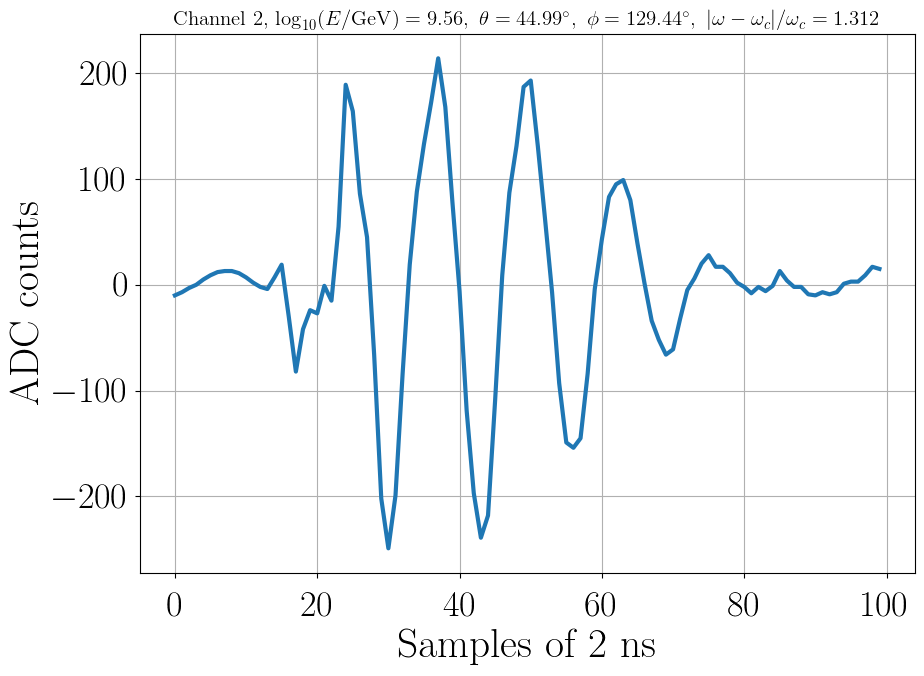

log10(E/GeV) = 9.30, theta = 51.99 deg, phi = 235.02 deg, omega = 2.344 deg, omega_c = 0.973 deg, |omega-omega_c|/omega_c = 1.410 
Vpp = [161.  38. 183.] ADC counts, pulse_width = [ 3. -1. 20.] ADC samples, n_peaks = [2. 0. 4.], peak_ratio = [ 1.11842105 -1.          1.05376344], peak_dist = [ 3. -1. 13.] ADC samples


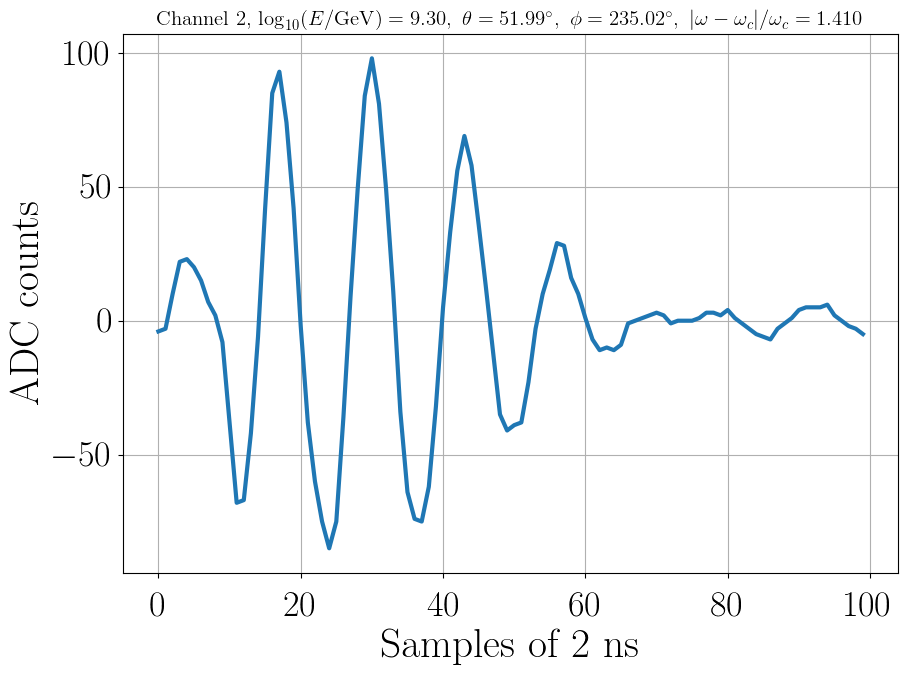

log10(E/GeV) = 9.38, theta = 45.63 deg, phi = 259.80 deg, omega = 2.583 deg, omega_c = 1.023 deg, |omega-omega_c|/omega_c = 1.525 
Vpp = [210. 101. 474.] ADC counts, pulse_width = [ 2. -1. 38.] ADC samples, n_peaks = [2. 0. 7.], peak_ratio = [ 1.1        -1.          1.01209677], peak_dist = [ 2. -1. 14.] ADC samples


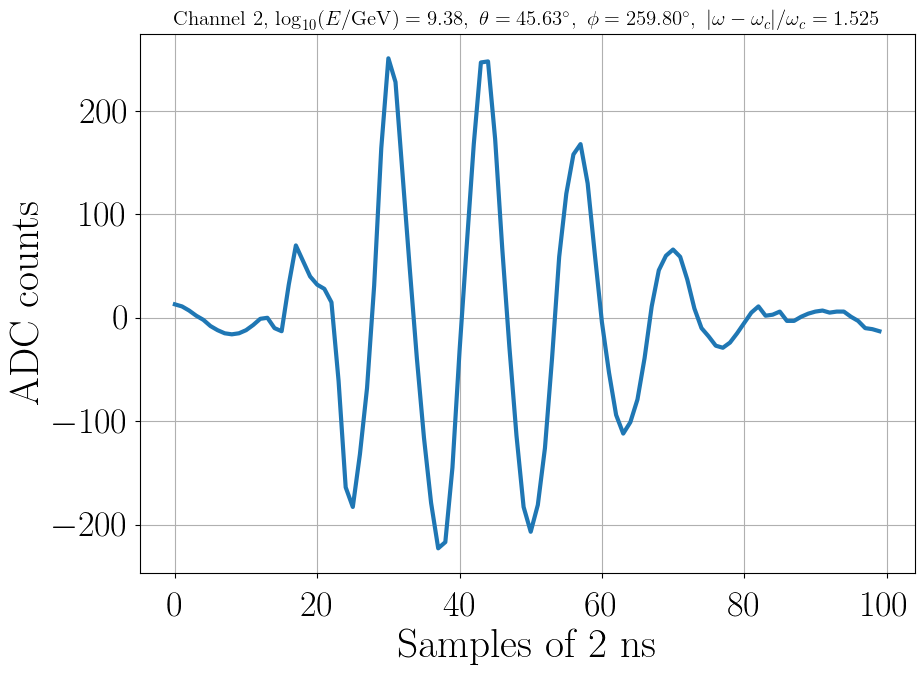

log10(E/GeV) = 9.28, theta = 48.07 deg, phi = 320.50 deg, omega = 2.663 deg, omega_c = 0.993 deg, |omega-omega_c|/omega_c = 1.680 
Vpp = [ 51. 101. 168.] ADC counts, pulse_width = [-1. -1. 14.] ADC samples, n_peaks = [0. 0. 3.], peak_ratio = [-1.     -1.      1.1125], peak_dist = [-1. -1. 14.] ADC samples


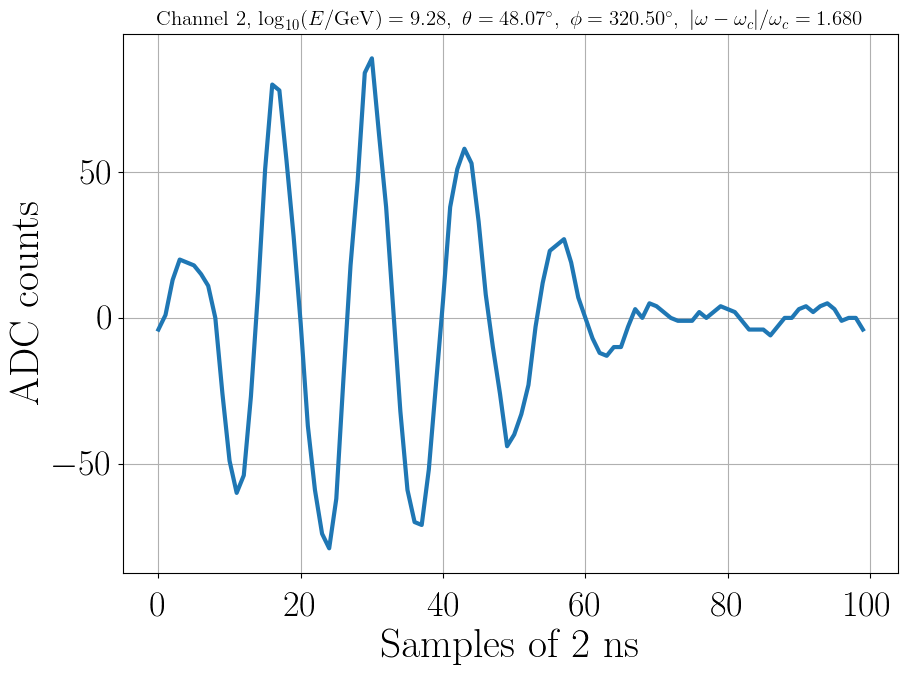

log10(E/GeV) = 9.20, theta = 49.34 deg, phi = 284.71 deg, omega = 2.993 deg, omega_c = 1.102 deg, |omega-omega_c|/omega_c = 1.715 
Vpp = [ 93.  72. 182.] ADC counts, pulse_width = [-1. -1. 19.] ADC samples, n_peaks = [0. 0. 4.], peak_ratio = [-1.         -1.          1.04347826], peak_dist = [-1. -1. 13.] ADC samples


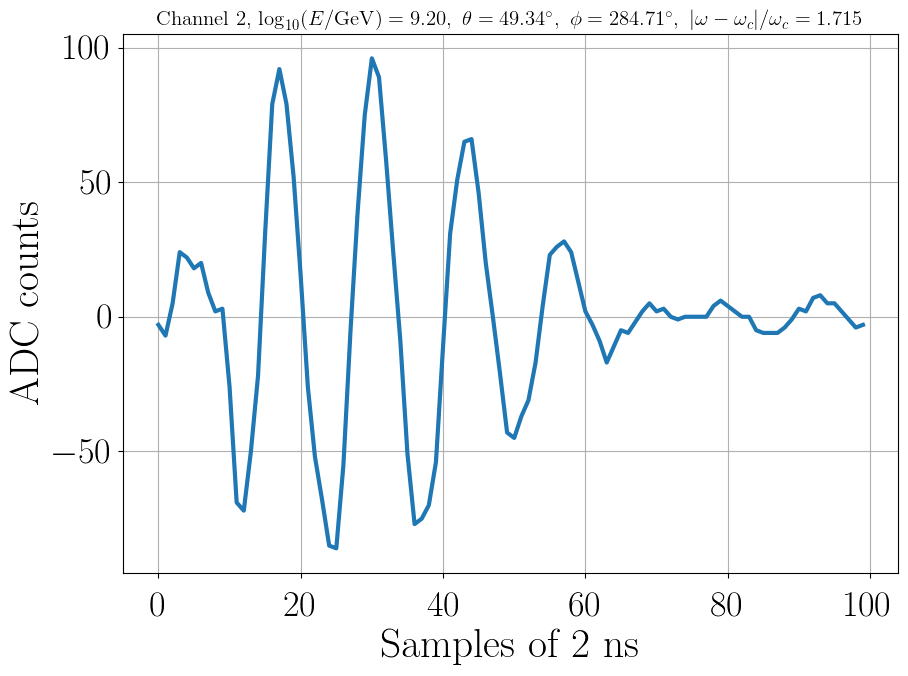

log10(E/GeV) = 9.17, theta = 51.25 deg, phi = 327.70 deg, omega = 2.872 deg, omega_c = 0.997 deg, |omega-omega_c|/omega_c = 1.882 
Vpp = [ 62. 202. 290.] ADC counts, pulse_width = [-1.  3. 36.] ADC samples, n_peaks = [0. 2. 8.], peak_ratio = [-1.          1.12631579  1.13235294], peak_dist = [-1.  3. 16.] ADC samples


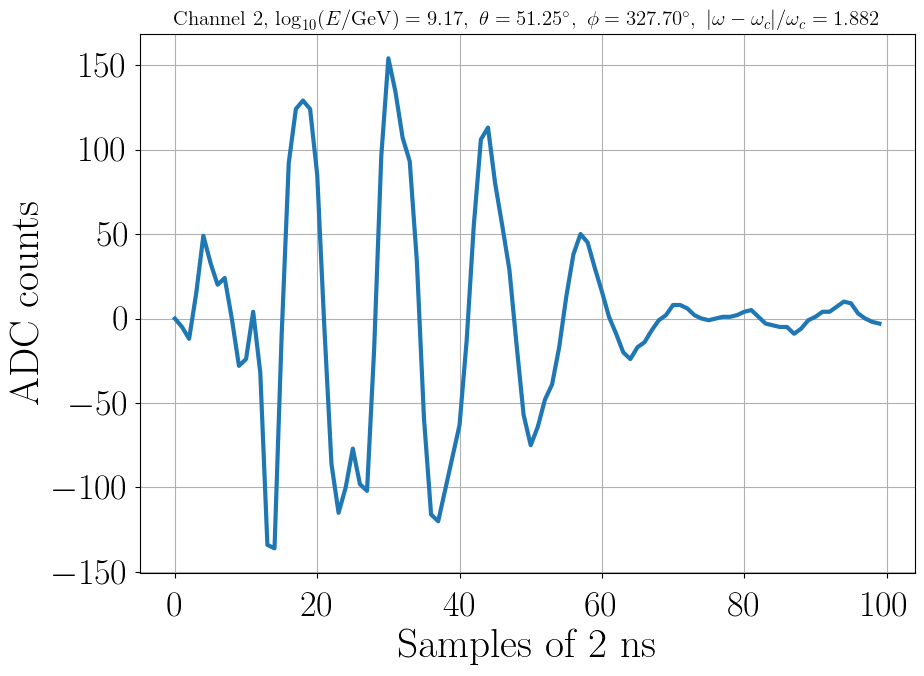

log10(E/GeV) = 9.33, theta = 44.69 deg, phi = 108.62 deg, omega = 3.042 deg, omega_c = 1.026 deg, |omega-omega_c|/omega_c = 1.964 
Vpp = [ 57.  19. 164.] ADC counts, pulse_width = [-1. -1. 13.] ADC samples, n_peaks = [0. 0. 3.], peak_ratio = [-1.         -1.          1.07407407], peak_dist = [-1. -1. 13.] ADC samples


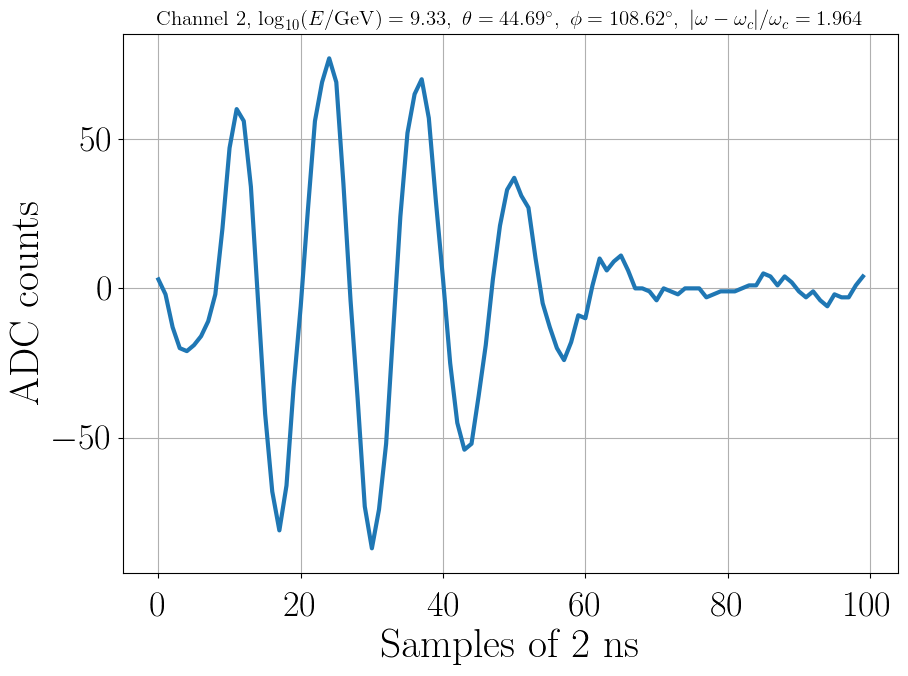

log10(E/GeV) = 9.06, theta = 62.18 deg, phi = 157.17 deg, omega = 0.841 deg, omega_c = 0.876 deg, |omega-omega_c|/omega_c = 0.041 
Vpp = [253. 818. 502.] ADC counts, pulse_width = [ 4.  5. 37.] ADC samples, n_peaks = [ 3.  3. 11.], peak_ratio = [1.10833333 1.21680217 1.39047619], peak_dist = [ 2.  5. 20.] ADC samples


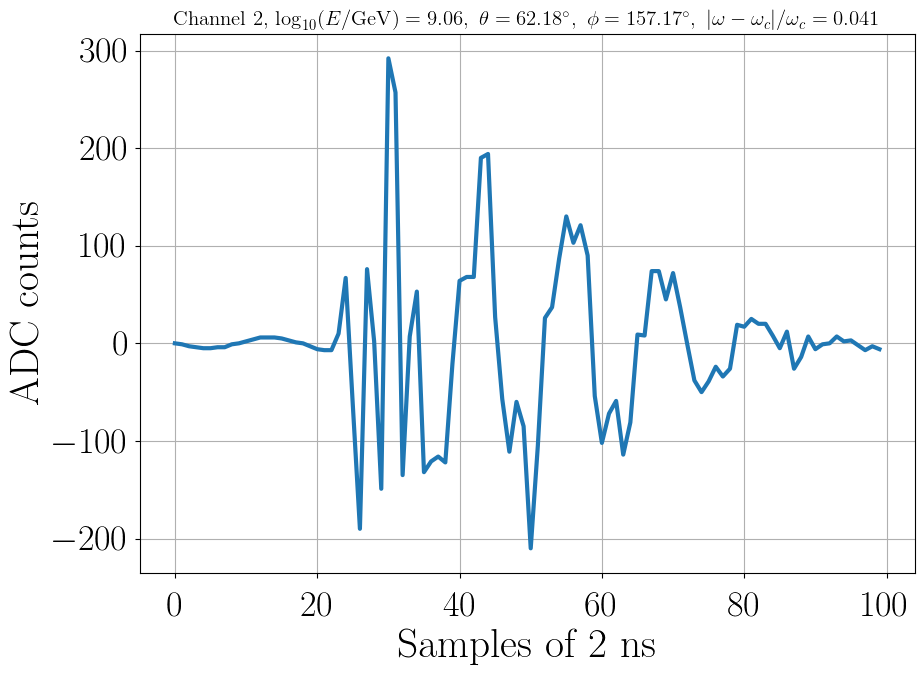

log10(E/GeV) = 9.12, theta = 54.61 deg, phi = 238.29 deg, omega = 1.077 deg, omega_c = 0.902 deg, |omega-omega_c|/omega_c = 0.193 
Vpp = [412. 314. 480.] ADC counts, pulse_width = [ 2.  7. 43.] ADC samples, n_peaks = [2. 4. 9.], peak_ratio = [1.09137056 1.1958042  1.07792208], peak_dist = [ 2.  2. 20.] ADC samples


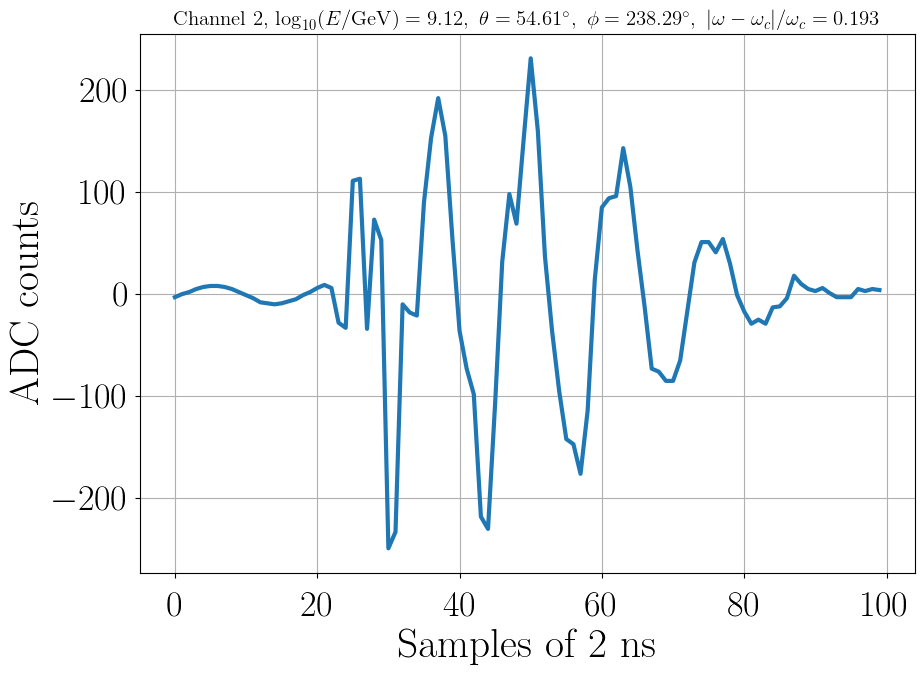

log10(E/GeV) = 9.59, theta = 55.69 deg, phi = 34.40 deg, omega = 0.692 deg, omega_c = 0.943 deg, |omega-omega_c|/omega_c = 0.267 
Vpp = [2290. 5372. 1535.] ADC counts, pulse_width = [32. 35. 55.] ADC samples, n_peaks = [ 9. 15. 19.], peak_ratio = [1.34151329 1.56732304 1.16986301], peak_dist = [ 6.  2. 13.] ADC samples


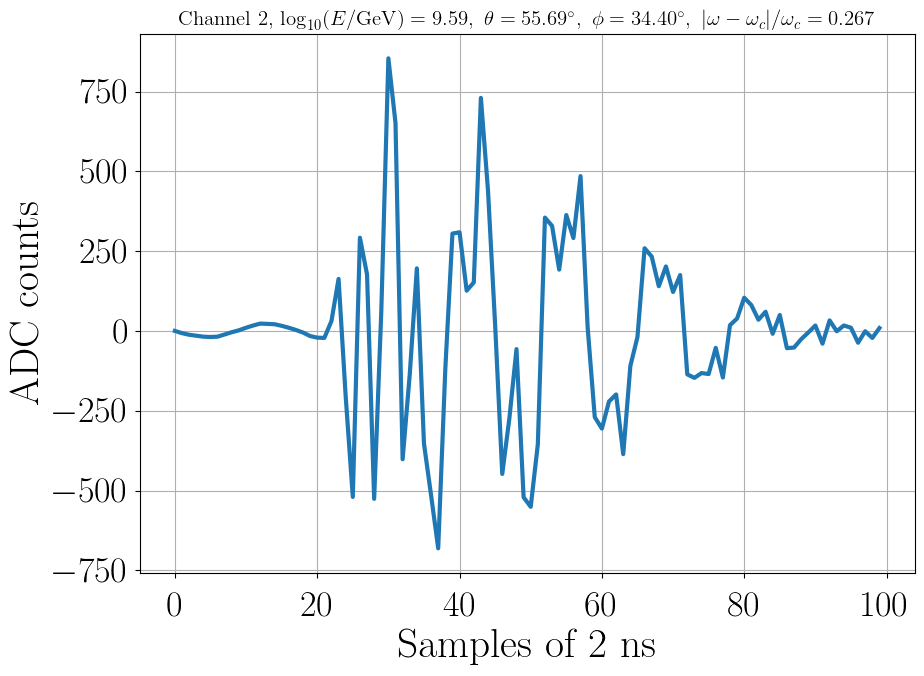

log10(E/GeV) = 9.35, theta = 53.91 deg, phi = 123.91 deg, omega = 1.310 deg, omega_c = 0.957 deg, |omega-omega_c|/omega_c = 0.369 
Vpp = [1333.  486. 1016.] ADC counts, pulse_width = [13. 13. 50.] ADC samples, n_peaks = [ 6.  5. 13.], peak_ratio = [1.17455139 1.12227074 1.27802691], peak_dist = [2. 4. 6.] ADC samples


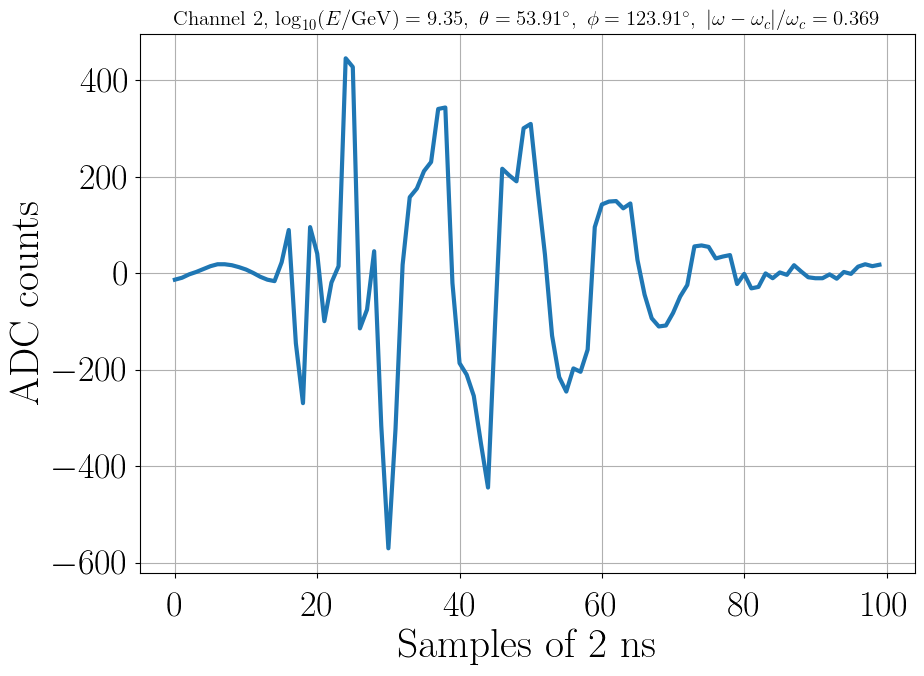

log10(E/GeV) = 9.22, theta = 54.88 deg, phi = 145.49 deg, omega = 1.439 deg, omega_c = 1.006 deg, |omega-omega_c|/omega_c = 0.431 
Vpp = [589. 441. 363.] ADC counts, pulse_width = [ 6.  6. 37.] ADC samples, n_peaks = [4. 3. 7.], peak_ratio = [1.05226481 1.2160804  1.01621622], peak_dist = [ 2.  2. 14.] ADC samples


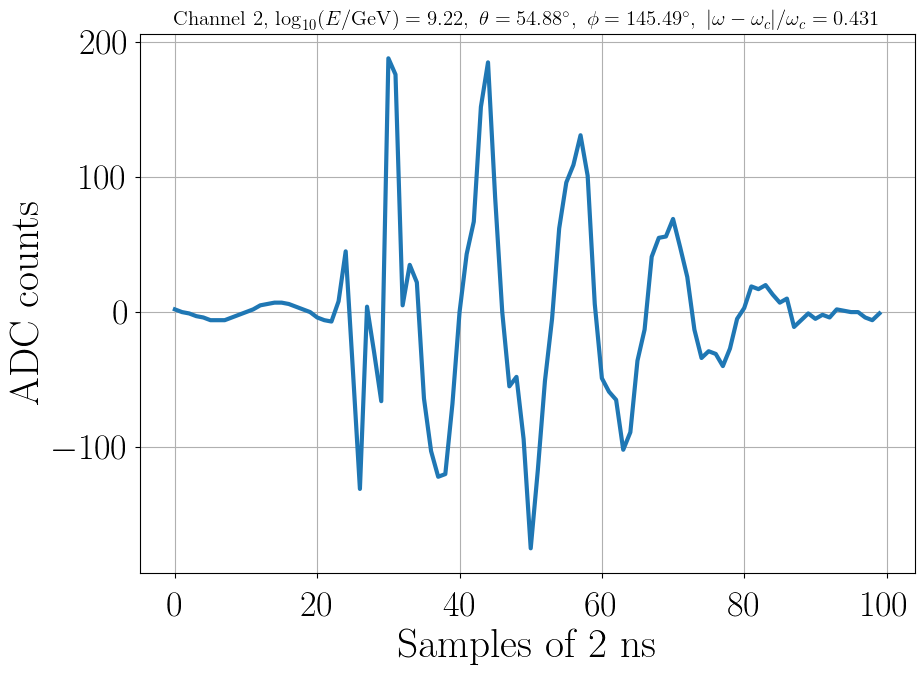

log10(E/GeV) = 9.12, theta = 63.79 deg, phi = 127.48 deg, omega = 1.255 deg, omega_c = 0.823 deg, |omega-omega_c|/omega_c = 0.525 
Vpp = [592. 320. 380.] ADC counts, pulse_width = [13.  8. 38.] ADC samples, n_peaks = [ 5.  4. 10.], peak_ratio = [1.24242424 1.22222222 1.30285714], peak_dist = [ 3.  2. 13.] ADC samples


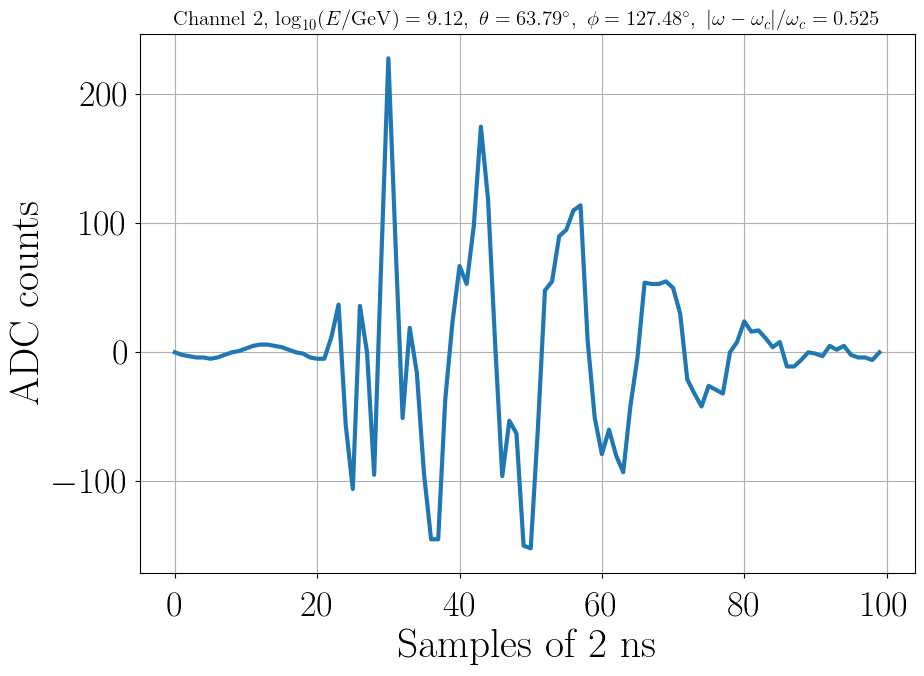

log10(E/GeV) = 9.43, theta = 62.18 deg, phi = 202.03 deg, omega = 1.402 deg, omega_c = 0.846 deg, |omega-omega_c|/omega_c = 0.658 
Vpp = [549. 944. 460.] ADC counts, pulse_width = [ 7. 13. 45.] ADC samples, n_peaks = [4. 6. 8.], peak_ratio = [1.11969112 1.07929515 1.0041841 ], peak_dist = [ 2.  2. 14.] ADC samples


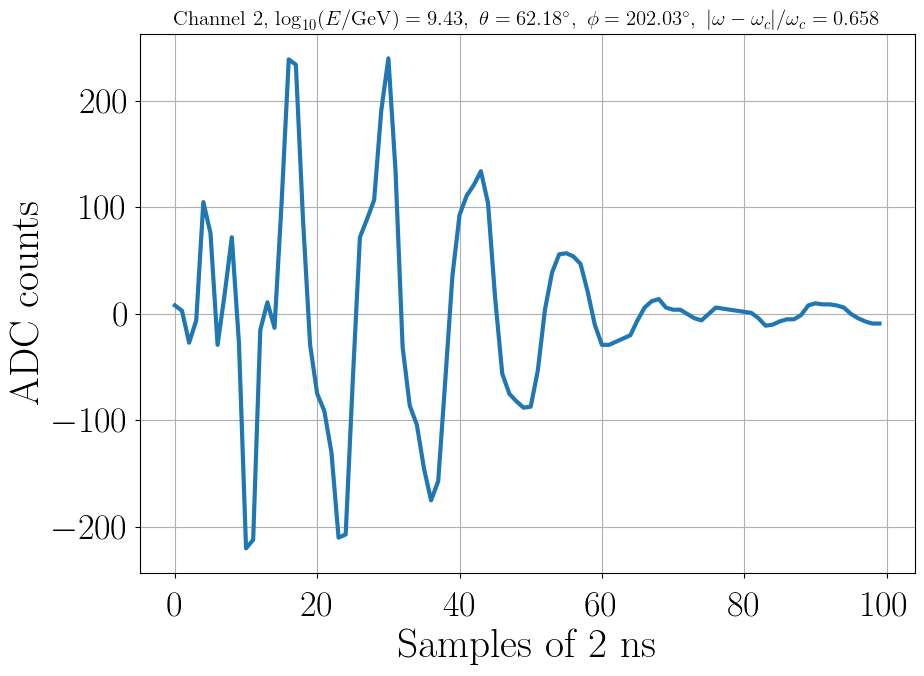

log10(E/GeV) = 9.39, theta = 61.19 deg, phi = 115.55 deg, omega = 1.469 deg, omega_c = 0.844 deg, |omega-omega_c|/omega_c = 0.740 
Vpp = [528. 216. 586.] ADC counts, pulse_width = [ 7.  2. 45.] ADC samples, n_peaks = [3. 2. 9.], peak_ratio = [1.0952381  1.20408163 1.02068966], peak_dist = [2. 2. 7.] ADC samples


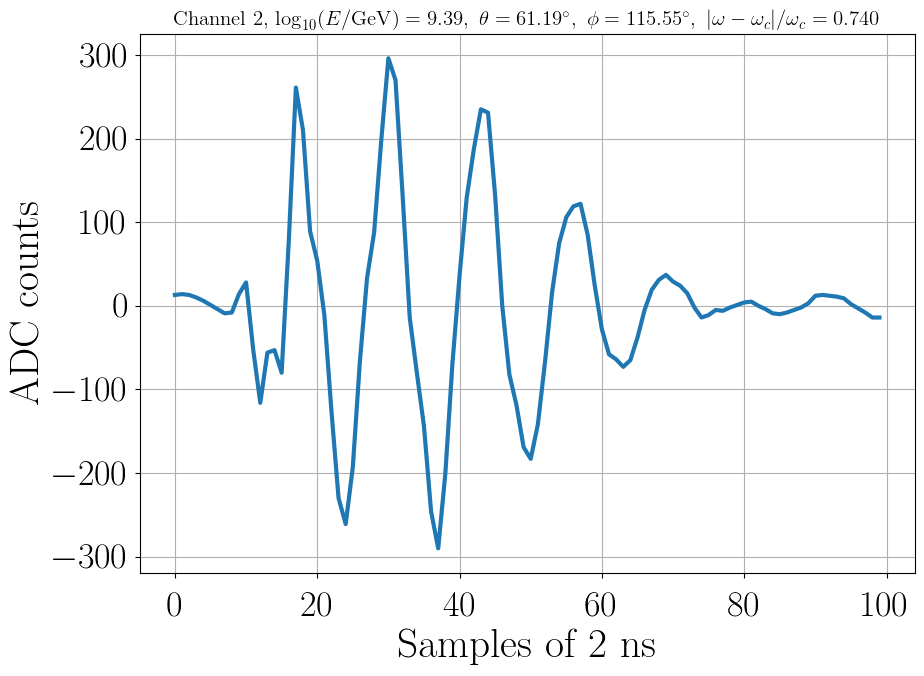

log10(E/GeV) = 9.56, theta = 61.71 deg, phi = 157.71 deg, omega = 1.632 deg, omega_c = 0.900 deg, |omega-omega_c|/omega_c = 0.813 
Vpp = [108. 323. 409.] ADC counts, pulse_width = [-1.  7. 45.] ADC samples, n_peaks = [0. 4. 8.], peak_ratio = [-1.          1.18243243  1.0974359 ], peak_dist = [-1.  4.  7.] ADC samples


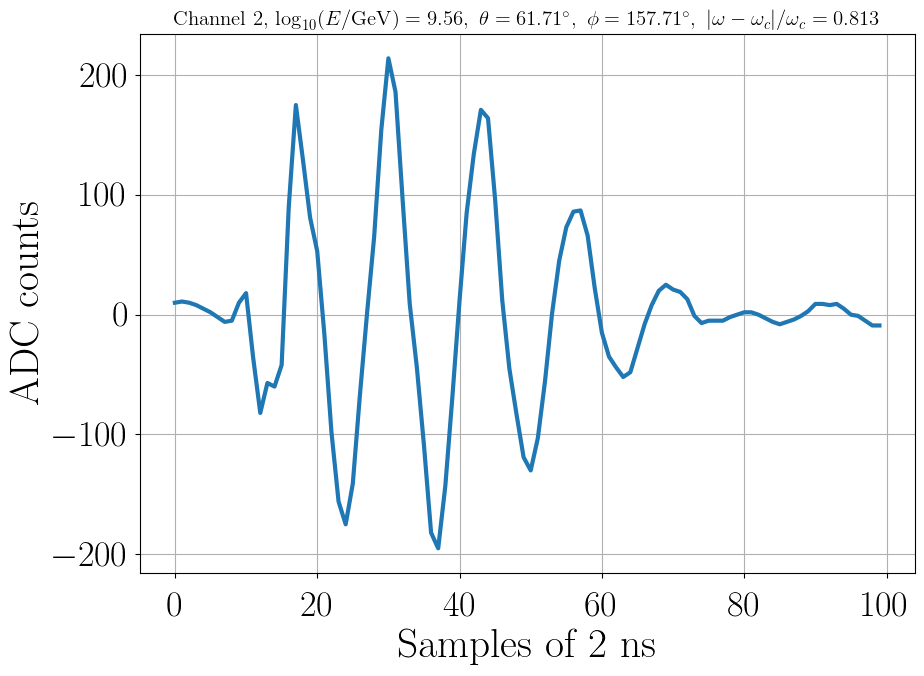

log10(E/GeV) = 9.12, theta = 63.79 deg, phi = 127.48 deg, omega = 1.586 deg, omega_c = 0.823 deg, |omega-omega_c|/omega_c = 0.928 
Vpp = [154.  99. 221.] ADC counts, pulse_width = [ 0. -1. 26.] ADC samples, n_peaks = [1. 0. 5.], peak_ratio = [ 0.         -1.          1.02752294], peak_dist = [ 0. -1.  7.] ADC samples


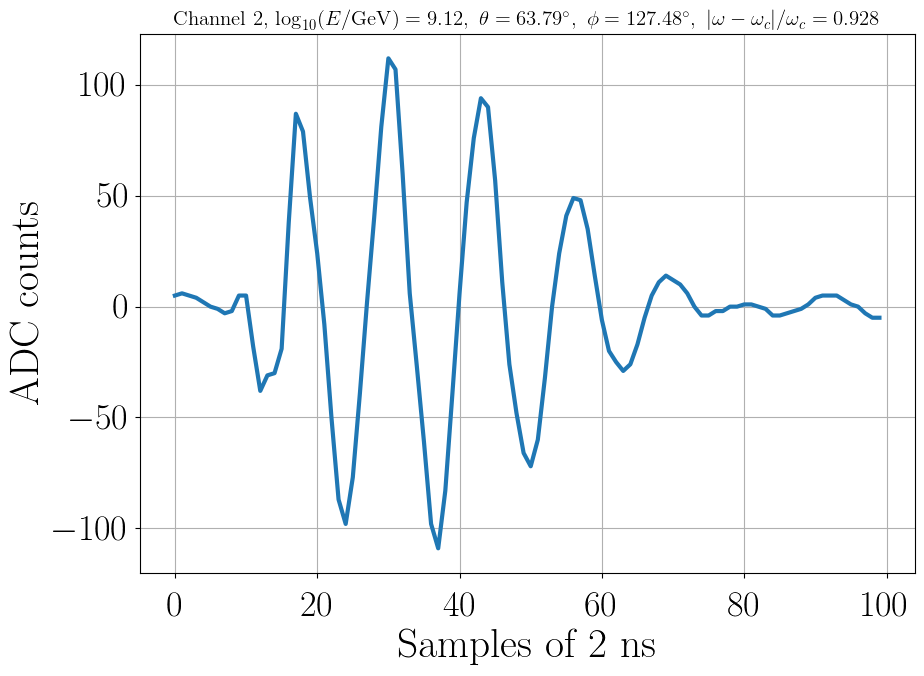

log10(E/GeV) = 9.13, theta = 60.47 deg, phi = 234.70 deg, omega = 1.773 deg, omega_c = 0.865 deg, |omega-omega_c|/omega_c = 1.050 
Vpp = [ 40.  34. 152.] ADC counts, pulse_width = [-1. -1.  7.] ADC samples, n_peaks = [0. 0. 2.], peak_ratio = [-1.         -1.          1.02666667], peak_dist = [-1. -1.  7.] ADC samples


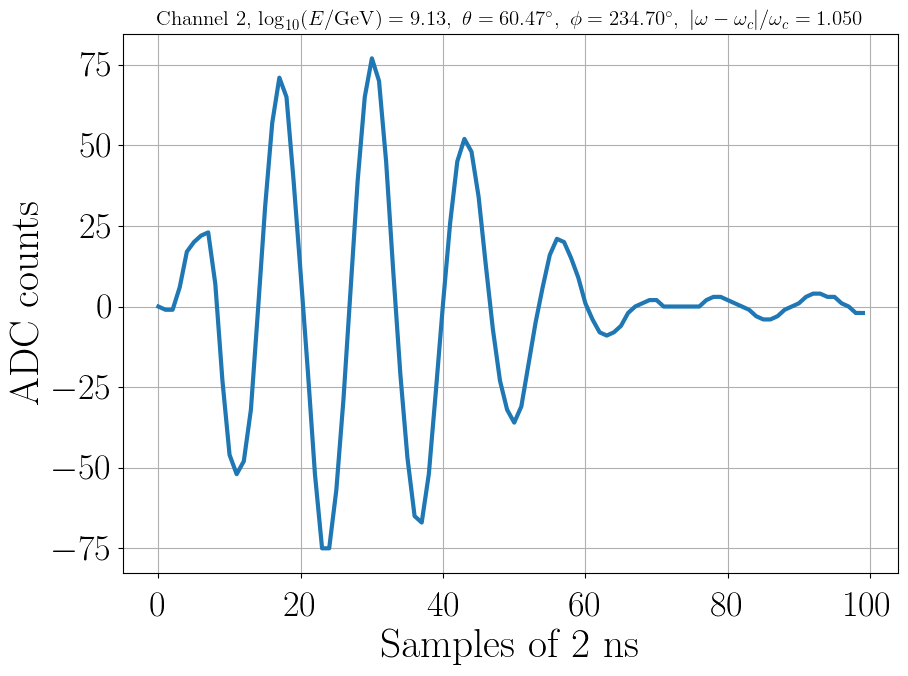

log10(E/GeV) = 9.39, theta = 61.19 deg, phi = 115.55 deg, omega = 1.813 deg, omega_c = 0.844 deg, |omega-omega_c|/omega_c = 1.147 
Vpp = [146.  73. 300.] ADC counts, pulse_width = [ 0. -1. 32.] ADC samples, n_peaks = [1. 0. 6.], peak_ratio = [ 0.         -1.          1.05479452], peak_dist = [ 0. -1.  7.] ADC samples


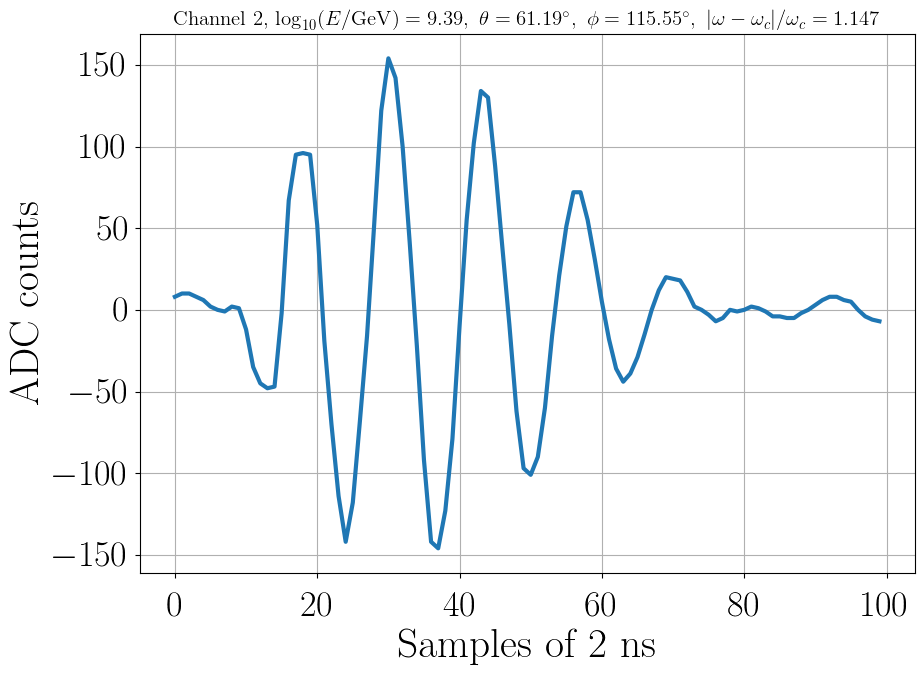

log10(E/GeV) = 9.58, theta = 63.33 deg, phi = 24.69 deg, omega = 1.885 deg, omega_c = 0.832 deg, |omega-omega_c|/omega_c = 1.266 
Vpp = [ 92. 163. 186.] ADC counts, pulse_width = [-1.  0. 20.] ADC samples, n_peaks = [0. 1. 4.], peak_ratio = [-1.          0.          1.02173913], peak_dist = [-1.  0.  7.] ADC samples


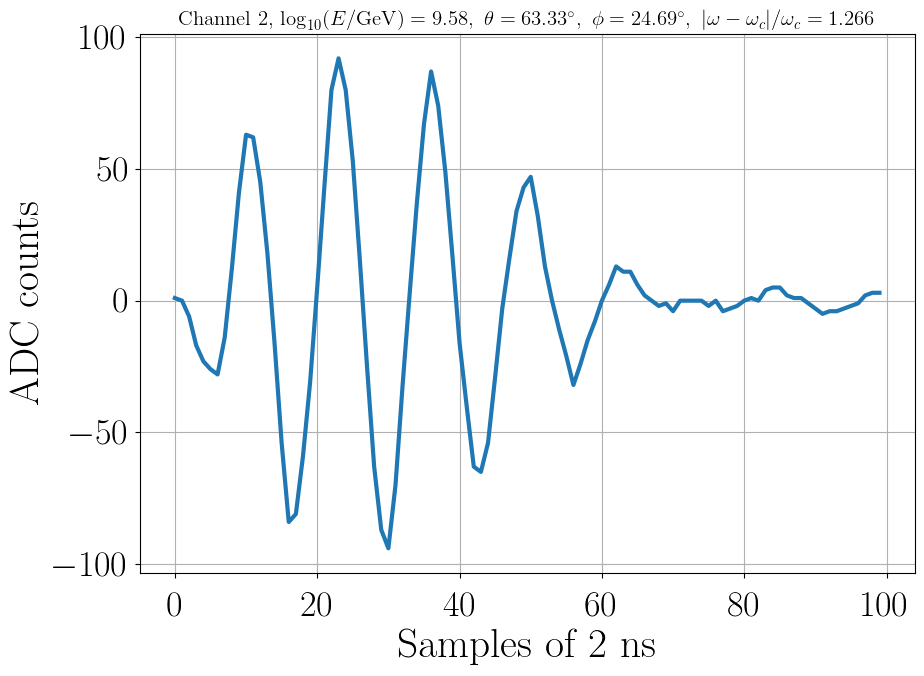

log10(E/GeV) = 9.45, theta = 53.99 deg, phi = 343.62 deg, omega = 2.195 deg, omega_c = 0.954 deg, |omega-omega_c|/omega_c = 1.301 
Vpp = [ 45. 156. 243.] ADC counts, pulse_width = [-1.  4. 32.] ADC samples, n_peaks = [0. 2. 6.], peak_ratio = [-1.          1.02597403  1.06666667], peak_dist = [-1.  4. 13.] ADC samples


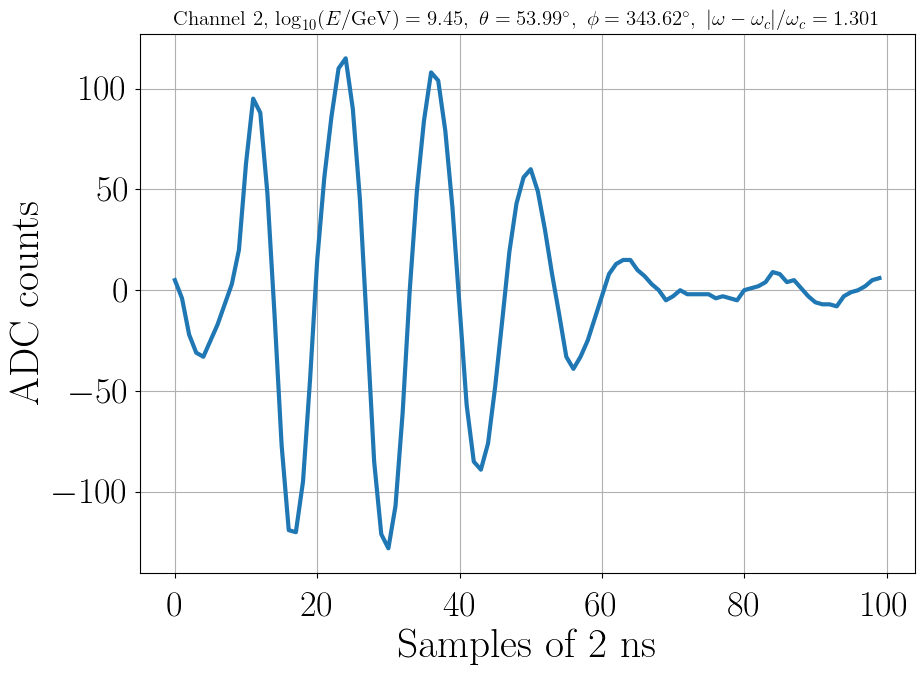

log10(E/GeV) = 9.13, theta = 55.62 deg, phi = 105.57 deg, omega = 2.268 deg, omega_c = 0.933 deg, |omega-omega_c|/omega_c = 1.431 
Vpp = [101.  31. 202.] ADC counts, pulse_width = [-1. -1. 19.] ADC samples, n_peaks = [0. 0. 4.], peak_ratio = [-1. -1.  1.], peak_dist = [-1. -1.  7.] ADC samples


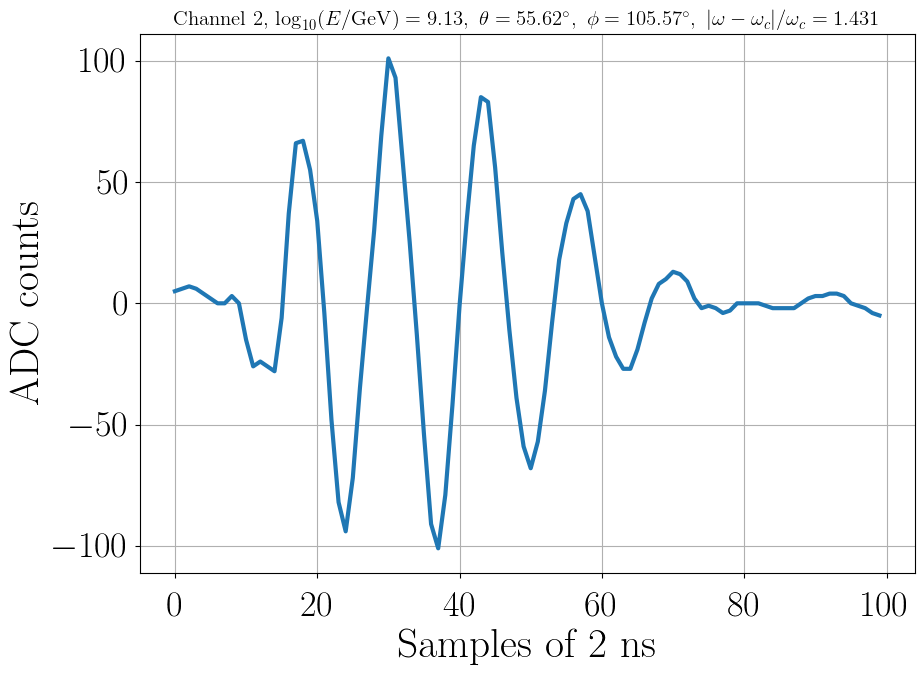

log10(E/GeV) = 9.22, theta = 60.43 deg, phi = 93.52 deg, omega = 2.509 deg, omega_c = 0.975 deg, |omega-omega_c|/omega_c = 1.574 
Vpp = [167.  43. 188.] ADC counts, pulse_width = [ 3. -1. 20.] ADC samples, n_peaks = [2. 0. 4.], peak_ratio = [ 1.03658537 -1.          1.06593407], peak_dist = [ 3. -1.  7.] ADC samples


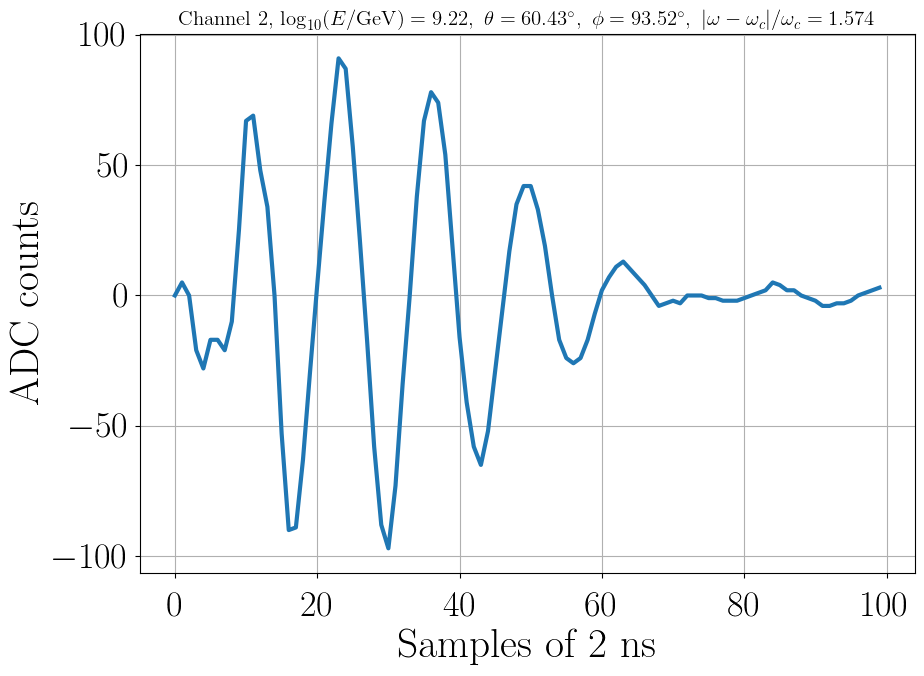

log10(E/GeV) = 9.55, theta = 60.71 deg, phi = 300.27 deg, omega = 2.346 deg, omega_c = 0.876 deg, |omega-omega_c|/omega_c = 1.678 
Vpp = [ 78.  75. 265.] ADC counts, pulse_width = [-1. -1. 32.] ADC samples, n_peaks = [0. 0. 6.], peak_ratio = [-1.         -1.          1.00757576], peak_dist = [-1. -1.  6.] ADC samples


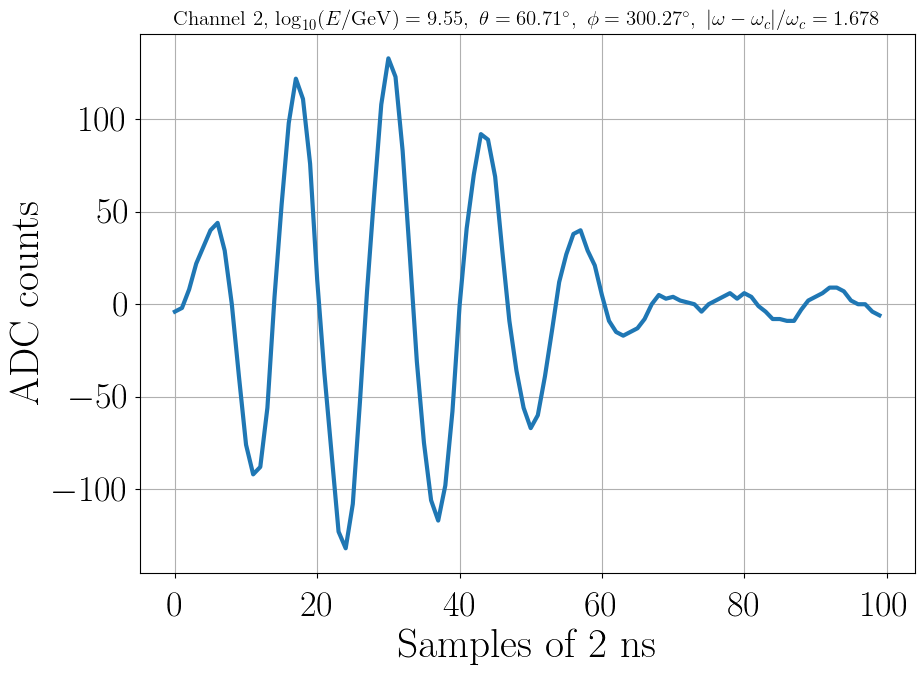

log10(E/GeV) = 9.47, theta = 53.50 deg, phi = 73.61 deg, omega = 2.676 deg, omega_c = 0.982 deg, |omega-omega_c|/omega_c = 1.725 
Vpp = [106. 185. 235.] ADC counts, pulse_width = [-1.  3. 33.] ADC samples, n_peaks = [0. 2. 6.], peak_ratio = [-1.          1.10227273  1.02586207], peak_dist = [-1.  3.  7.] ADC samples


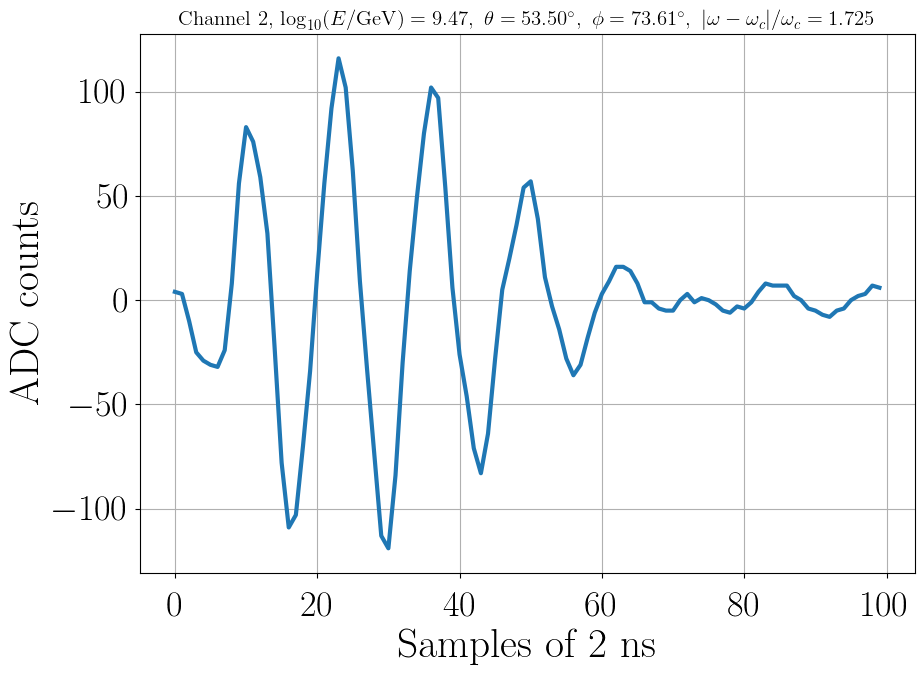

log10(E/GeV) = 9.58, theta = 63.65 deg, phi = 85.78 deg, omega = 2.415 deg, omega_c = 0.845 deg, |omega-omega_c|/omega_c = 1.858 
Vpp = [ 71.  14. 186.] ADC counts, pulse_width = [-1. -1. 20.] ADC samples, n_peaks = [0. 0. 4.], peak_ratio = [-1.         -1.          1.02173913], peak_dist = [-1. -1.  6.] ADC samples


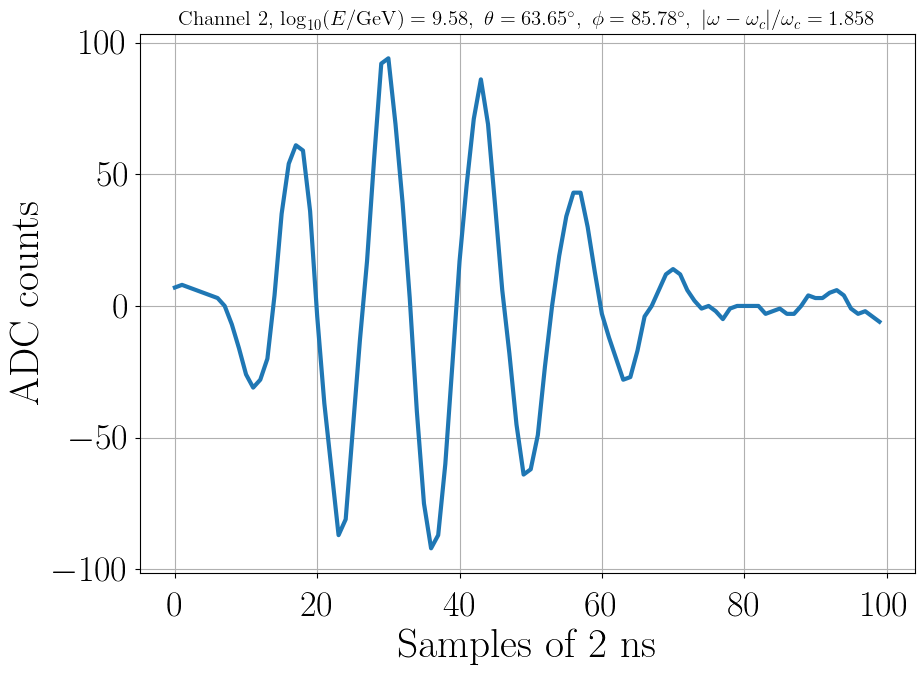

log10(E/GeV) = 9.53, theta = 56.18 deg, phi = 236.77 deg, omega = 2.890 deg, omega_c = 0.992 deg, |omega-omega_c|/omega_c = 1.912 
Vpp = [ 88.  38. 171.] ADC counts, pulse_width = [-1. -1. 20.] ADC samples, n_peaks = [0. 0. 4.], peak_ratio = [-1.         -1.          1.06024096], peak_dist = [-1. -1.  6.] ADC samples


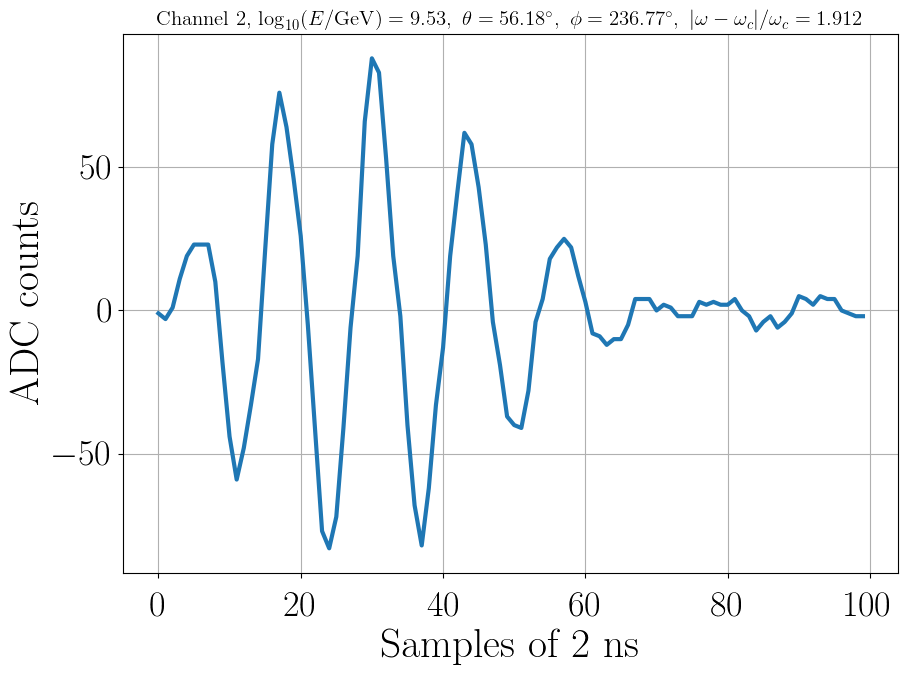

log10(E/GeV) = 9.49, theta = 71.69 deg, phi = 268.88 deg, omega = 0.812 deg, omega_c = 0.798 deg, |omega-omega_c|/omega_c = 0.018 
Vpp = [2551.  579. 1142.] ADC counts, pulse_width = [31.  7. 52.] ADC samples, n_peaks = [ 7.  4. 16.], peak_ratio = [1.35767098 1.06049822 1.33537832], peak_dist = [4. 2. 4.] ADC samples


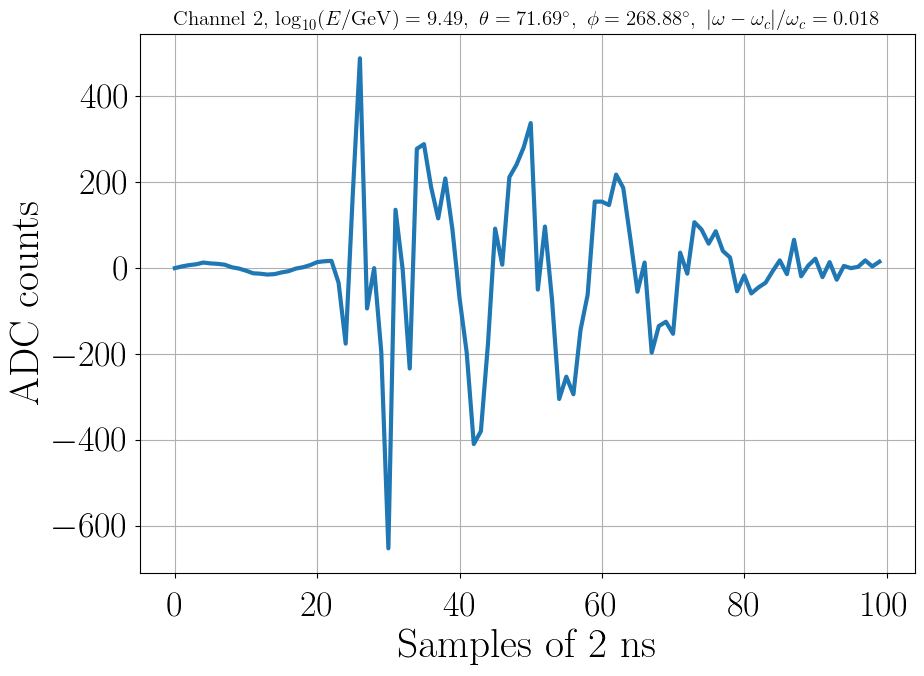

log10(E/GeV) = 9.08, theta = 72.70 deg, phi = 93.93 deg, omega = 0.567 deg, omega_c = 0.704 deg, |omega-omega_c|/omega_c = 0.194 
Vpp = [854. 247. 384.] ADC counts, pulse_width = [ 6.  2. 36.] ADC samples, n_peaks = [3. 2. 9.], peak_ratio = [1.20103093 1.18584071 1.38509317], peak_dist = [4. 2. 4.] ADC samples


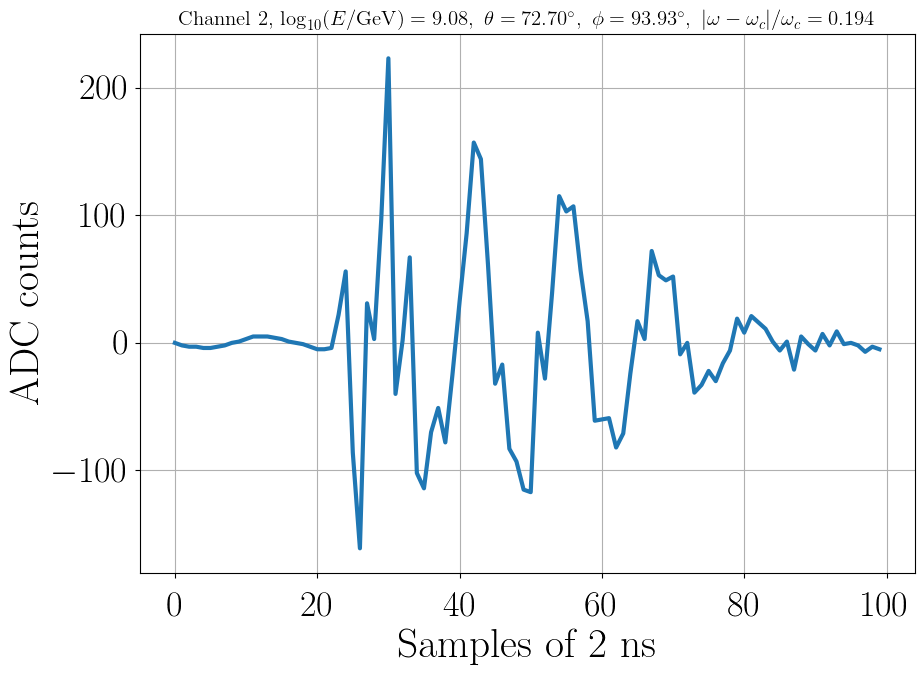

log10(E/GeV) = 9.34, theta = 73.74 deg, phi = 120.66 deg, omega = 0.533 deg, omega_c = 0.690 deg, |omega-omega_c|/omega_c = 0.228 
Vpp = [1403.  771.  464.] ADC counts, pulse_width = [ 7.  8. 44.] ADC samples, n_peaks = [ 4.  4. 11.], peak_ratio = [1.16178737 1.10655738 1.13824885], peak_dist = [ 3.  2. 16.] ADC samples


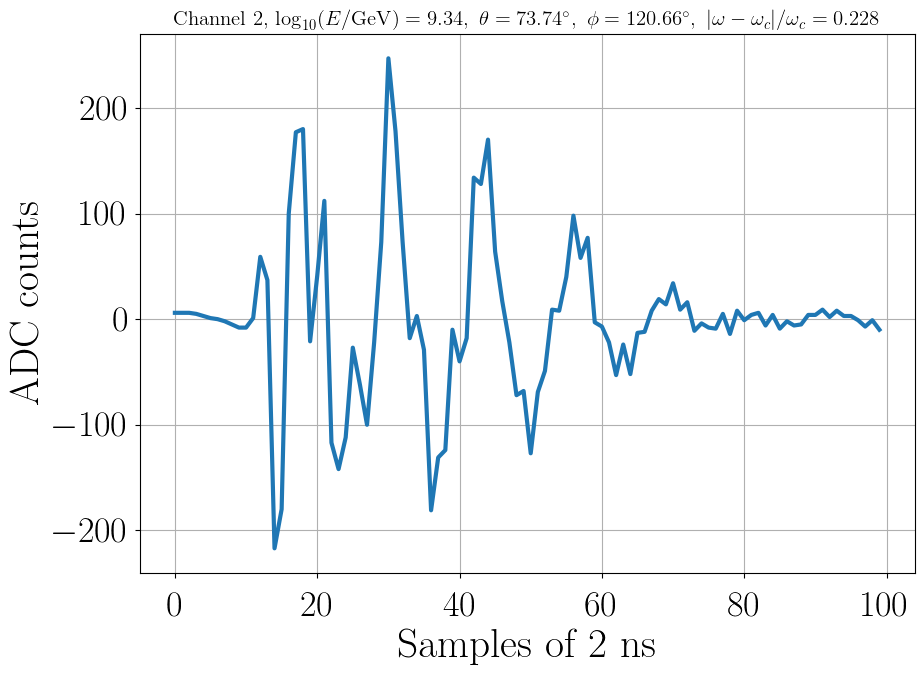

log10(E/GeV) = 9.50, theta = 74.76 deg, phi = 18.88 deg, omega = 0.929 deg, omega_c = 0.700 deg, |omega-omega_c|/omega_c = 0.326 
Vpp = [ 705. 2022.  174.] ADC counts, pulse_width = [ 6. 32. 16.] ADC samples, n_peaks = [3. 8. 3.], peak_ratio = [1.07352941 1.3161512  1.04494382], peak_dist = [ 3.  3. 13.] ADC samples


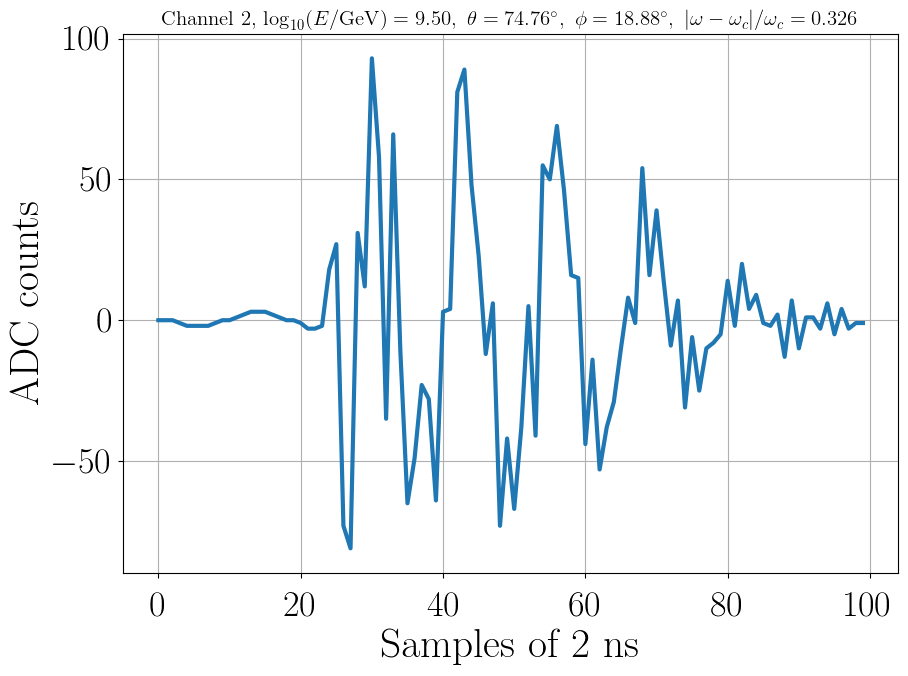

log10(E/GeV) = 9.34, theta = 73.74 deg, phi = 120.66 deg, omega = 0.350 deg, omega_c = 0.690 deg, |omega-omega_c|/omega_c = 0.494 
Vpp = [1205.  613.  416.] ADC counts, pulse_width = [ 5.  8. 42.] ADC samples, n_peaks = [3. 4. 9.], peak_ratio = [1.16726619 1.20503597 1.1010101 ], peak_dist = [ 3.  3. 16.] ADC samples


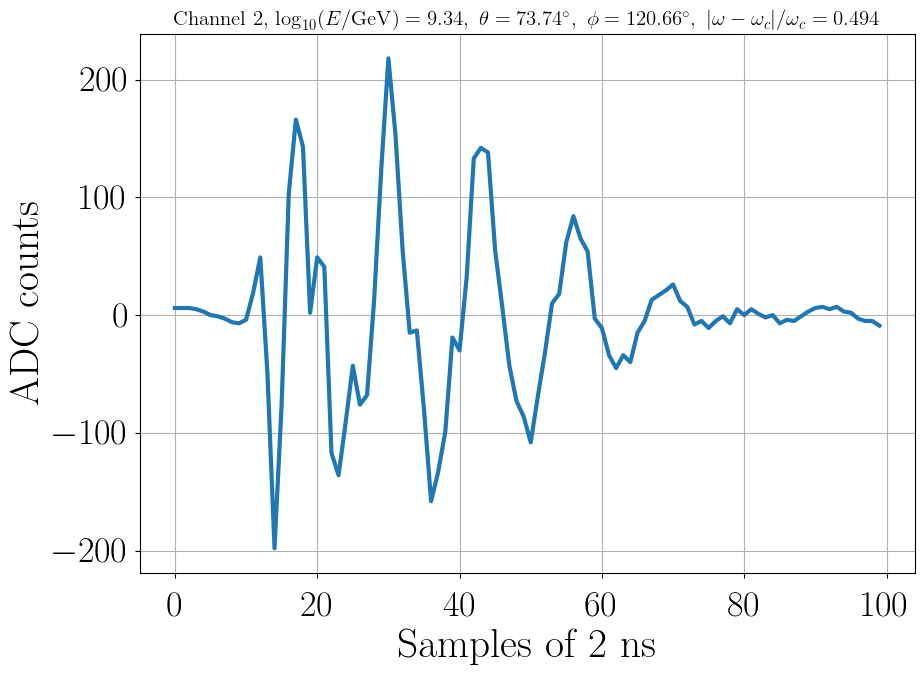

log10(E/GeV) = 9.43, theta = 74.67 deg, phi = 80.11 deg, omega = 0.355 deg, omega_c = 0.715 deg, |omega-omega_c|/omega_c = 0.504 
Vpp = [1875.  317.  537.] ADC counts, pulse_width = [ 8.  6. 42.] ADC samples, n_peaks = [4. 3. 9.], peak_ratio = [1.01829925 1.536      1.07335907], peak_dist = [ 3.  3. 16.] ADC samples


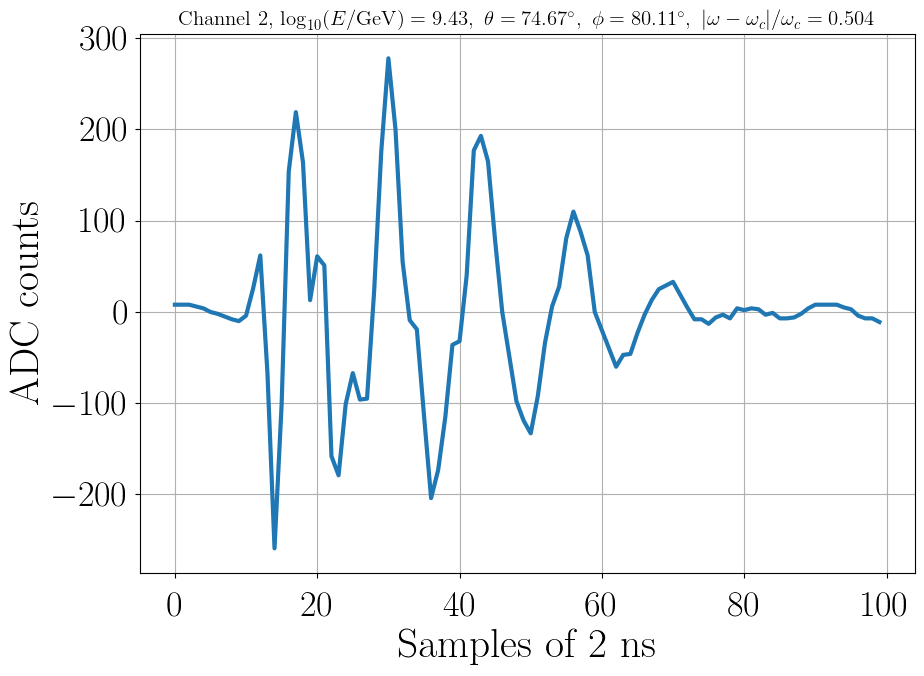

log10(E/GeV) = 9.34, theta = 75.70 deg, phi = 101.36 deg, omega = 1.141 deg, omega_c = 0.687 deg, |omega-omega_c|/omega_c = 0.661 
Vpp = [304.  73. 166.] ADC counts, pulse_width = [ 6. -1. 13.] ADC samples, n_peaks = [3. 0. 3.], peak_ratio = [ 1.432      -1.          1.12658228], peak_dist = [ 4. -1. 13.] ADC samples


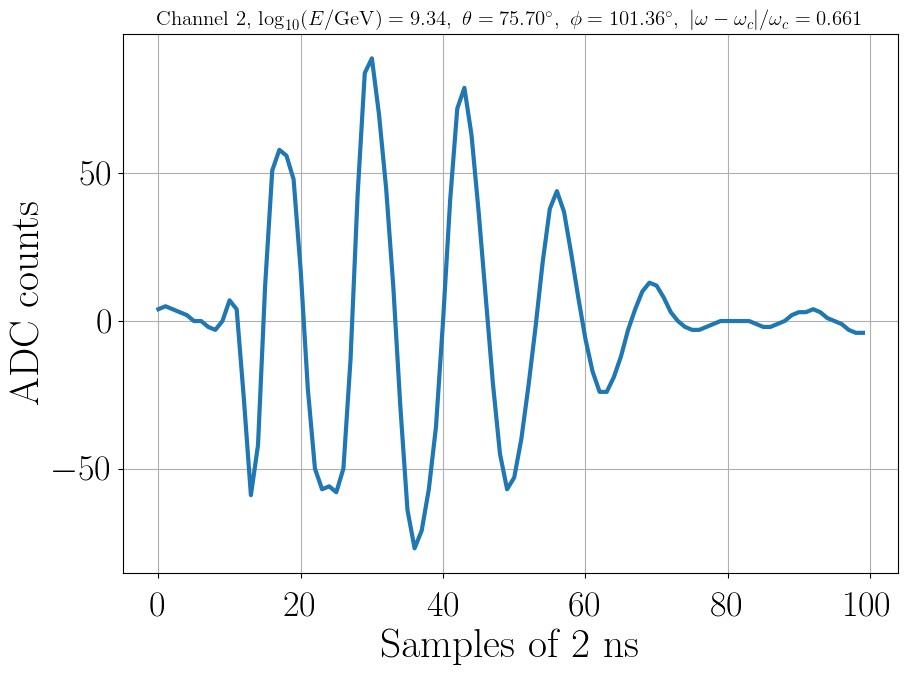

log10(E/GeV) = 9.37, theta = 74.42 deg, phi = 57.04 deg, omega = 1.208 deg, omega_c = 0.709 deg, |omega-omega_c|/omega_c = 0.705 
Vpp = [341. 180. 169.] ADC counts, pulse_width = [ 6.  0. 13.] ADC samples, n_peaks = [3. 1. 3.], peak_ratio = [1.43571429 0.         1.11111111], peak_dist = [ 3.  0. 13.] ADC samples


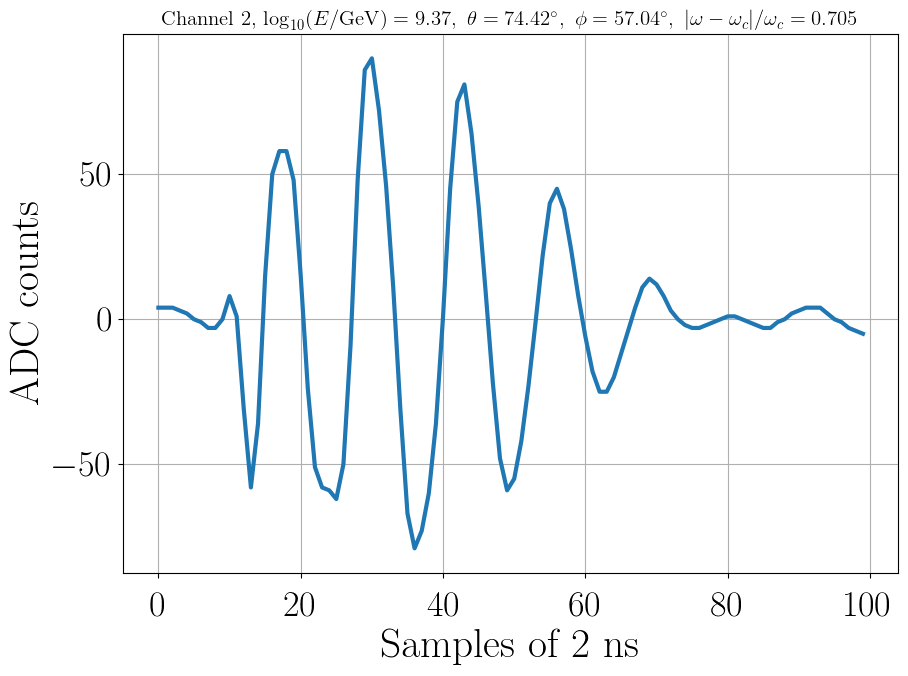

log10(E/GeV) = 9.45, theta = 68.82 deg, phi = 147.66 deg, omega = 1.515 deg, omega_c = 0.799 deg, |omega-omega_c|/omega_c = 0.897 
Vpp = [144. 242. 190.] ADC counts, pulse_width = [ 0.  7. 19.] ADC samples, n_peaks = [1. 3. 4.], peak_ratio = [0.         1.3047619  1.11111111], peak_dist = [0. 4. 7.] ADC samples


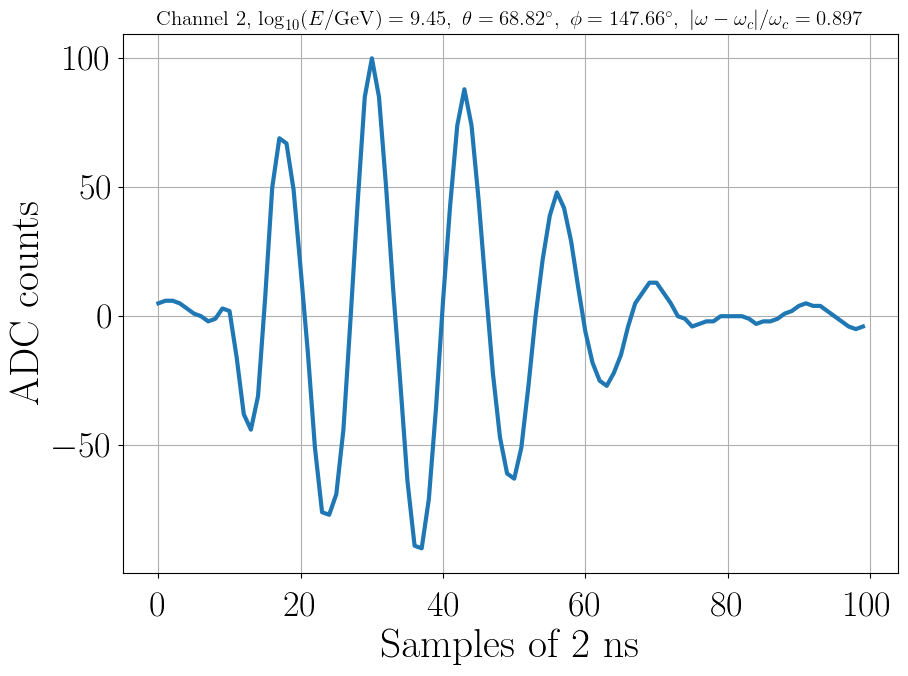

log10(E/GeV) = 9.42, theta = 70.33 deg, phi = 124.48 deg, omega = 1.649 deg, omega_c = 0.834 deg, |omega-omega_c|/omega_c = 0.977 
Vpp = [414. 143. 249.] ADC counts, pulse_width = [ 6.  0. 32.] ADC samples, n_peaks = [3. 1. 6.], peak_ratio = [1.4939759  0.         1.09243697], peak_dist = [3. 0. 6.] ADC samples


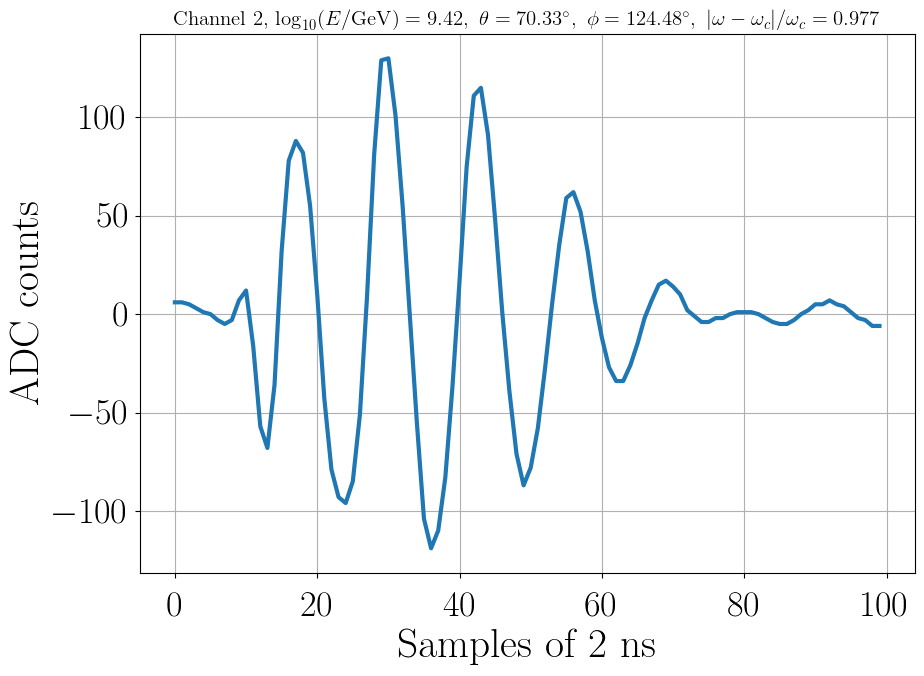

log10(E/GeV) = 9.52, theta = 64.62 deg, phi = 158.36 deg, omega = 1.732 deg, omega_c = 0.832 deg, |omega-omega_c|/omega_c = 1.081 
Vpp = [ 46. 158. 202.] ADC counts, pulse_width = [-1.  0. 19.] ADC samples, n_peaks = [0. 1. 4.], peak_ratio = [-1.          0.          1.08247423], peak_dist = [-1.  0.  7.] ADC samples


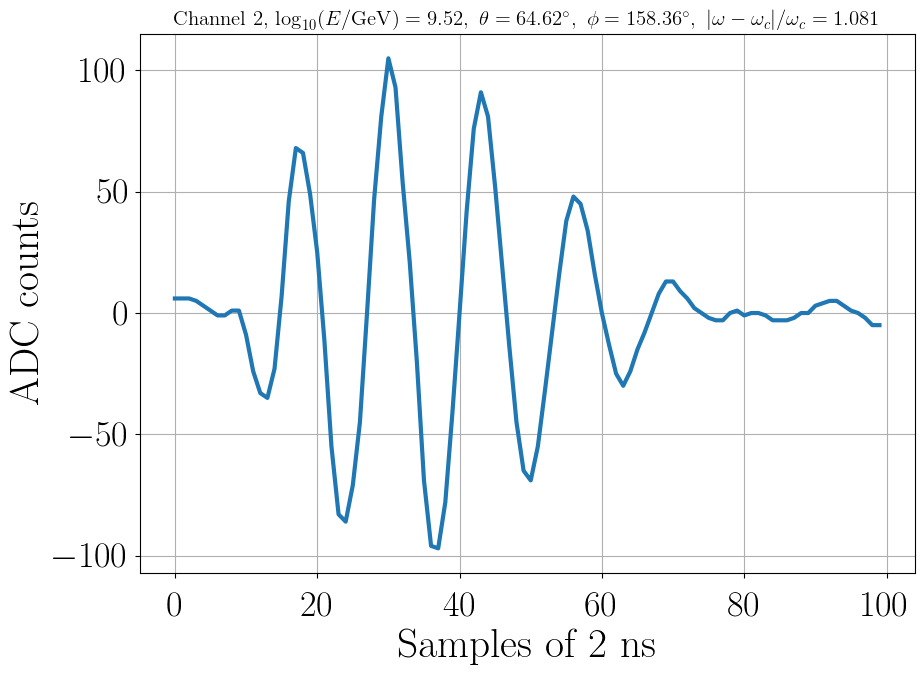

log10(E/GeV) = 9.32, theta = 75.03 deg, phi = 297.80 deg, omega = 1.562 deg, omega_c = 0.711 deg, |omega-omega_c|/omega_c = 1.196 
Vpp = [185.  79. 169.] ADC counts, pulse_width = [ 0. -1. 13.] ADC samples, n_peaks = [1. 0. 3.], peak_ratio = [ 0.         -1.          1.08641975], peak_dist = [ 0. -1.  7.] ADC samples


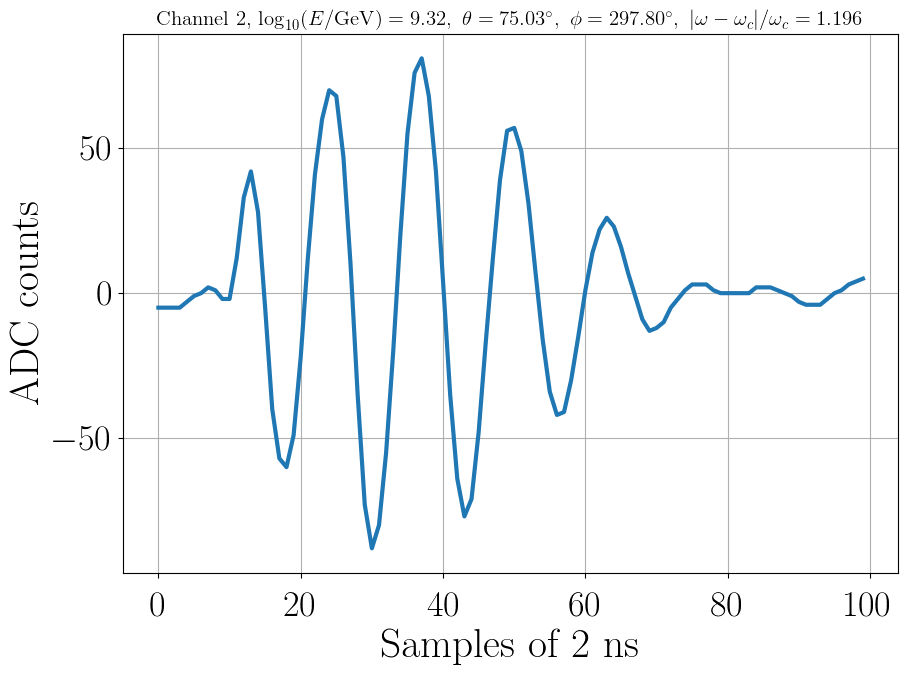

log10(E/GeV) = 9.45, theta = 68.82 deg, phi = 147.66 deg, omega = 1.813 deg, omega_c = 0.799 deg, |omega-omega_c|/omega_c = 1.270 
Vpp = [ 84. 140. 157.] ADC counts, pulse_width = [-1.  0.  7.] ADC samples, n_peaks = [0. 1. 2.], peak_ratio = [-1.          0.          1.01282051], peak_dist = [-1.  0.  7.] ADC samples


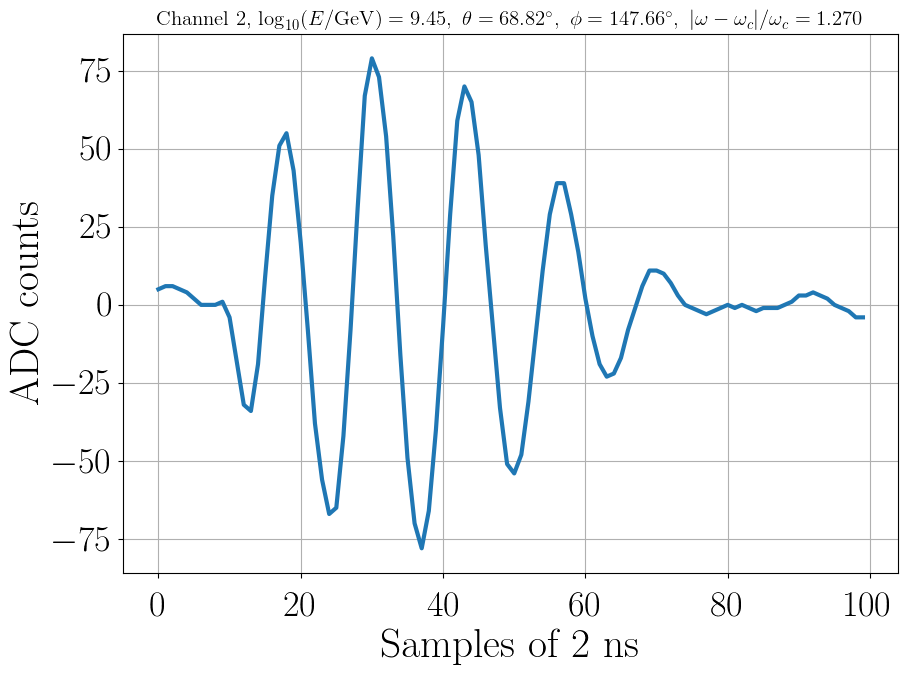

log10(E/GeV) = 9.38, theta = 65.02 deg, phi = 291.82 deg, omega = 2.020 deg, omega_c = 0.842 deg, |omega-omega_c|/omega_c = 1.398 
Vpp = [118.  70. 277.] ADC counts, pulse_width = [-1. -1. 32.] ADC samples, n_peaks = [0. 0. 6.], peak_ratio = [-1.         -1.          1.03676471], peak_dist = [-1. -1.  7.] ADC samples


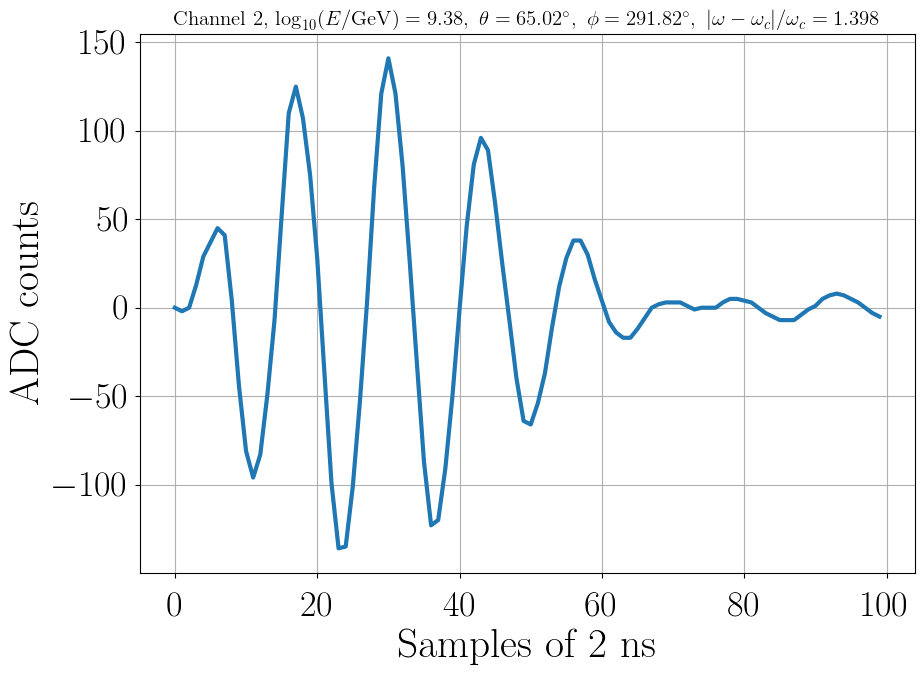

log10(E/GeV) = 9.54, theta = 72.01 deg, phi = 71.99 deg, omega = 1.826 deg, omega_c = 0.747 deg, |omega-omega_c|/omega_c = 1.445 
Vpp = [ 80.  33. 156.] ADC counts, pulse_width = [-1. -1.  6.] ADC samples, n_peaks = [0. 0. 2.], peak_ratio = [-1.         -1.          1.05263158], peak_dist = [-1. -1.  6.] ADC samples


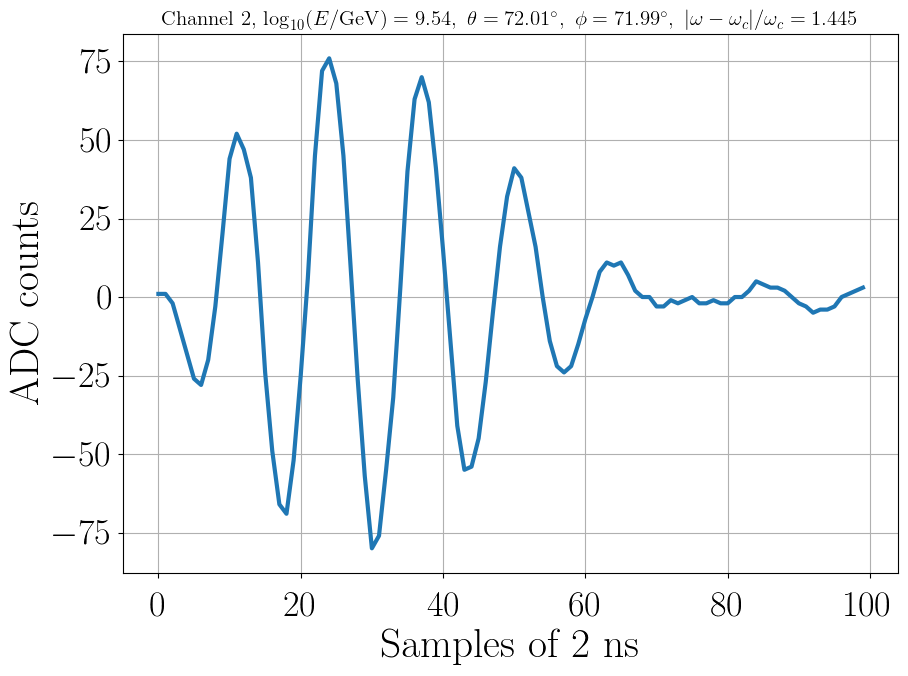

log10(E/GeV) = 9.45, theta = 66.74 deg, phi = 136.50 deg, omega = 2.095 deg, omega_c = 0.812 deg, |omega-omega_c|/omega_c = 1.579 
Vpp = [ 77. 107. 160.] ADC counts, pulse_width = [-1. -1.  6.] ADC samples, n_peaks = [0. 0. 2.], peak_ratio = [-1.         -1.          1.07792208], peak_dist = [-1. -1.  6.] ADC samples


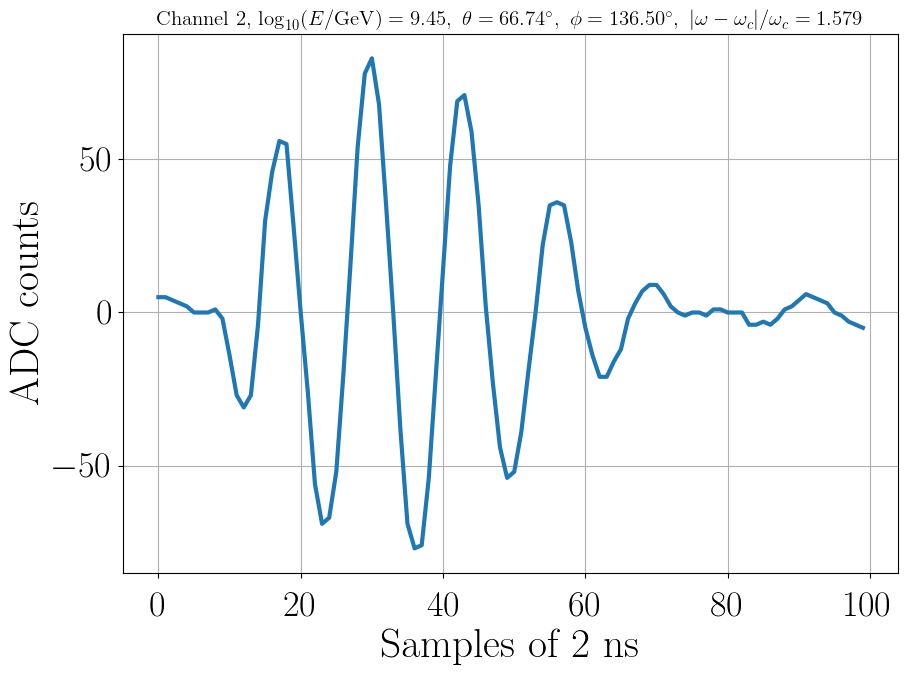

log10(E/GeV) = 9.24, theta = 66.26 deg, phi = 261.44 deg, omega = 2.175 deg, omega_c = 0.834 deg, |omega-omega_c|/omega_c = 1.608 
Vpp = [ 99.  32. 158.] ADC counts, pulse_width = [-1. -1. 13.] ADC samples, n_peaks = [0. 0. 3.], peak_ratio = [-1.     -1.      1.0375], peak_dist = [-1. -1. 13.] ADC samples


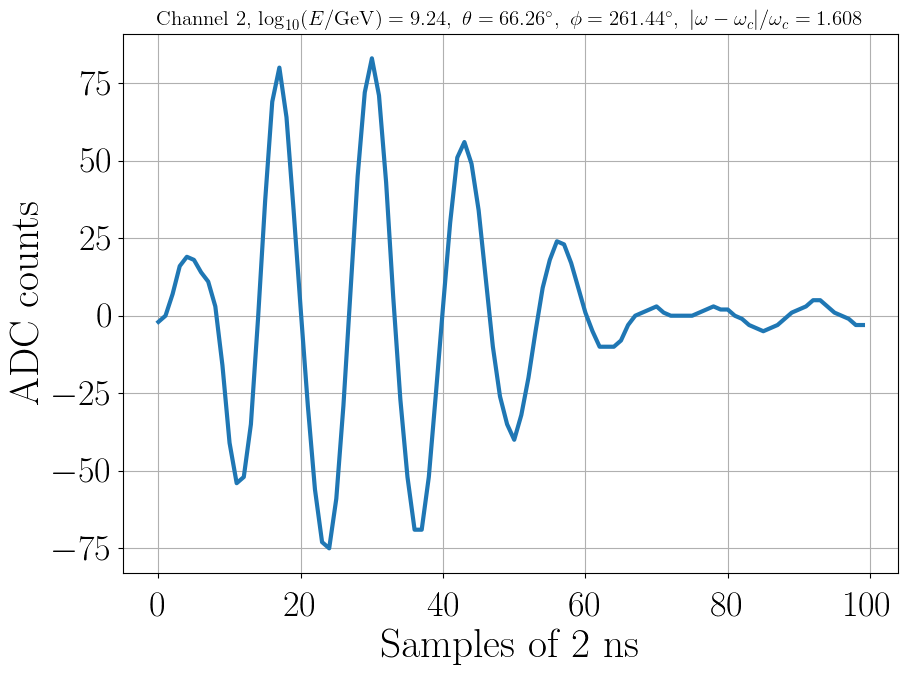

log10(E/GeV) = 9.59, theta = 71.04 deg, phi = 258.27 deg, omega = 2.016 deg, omega_c = 0.734 deg, |omega-omega_c|/omega_c = 1.747 
Vpp = [ 78.  24. 178.] ADC counts, pulse_width = [-1. -1. 20.] ADC samples, n_peaks = [0. 0. 4.], peak_ratio = [-1.         -1.          1.04597701], peak_dist = [-1. -1.  6.] ADC samples


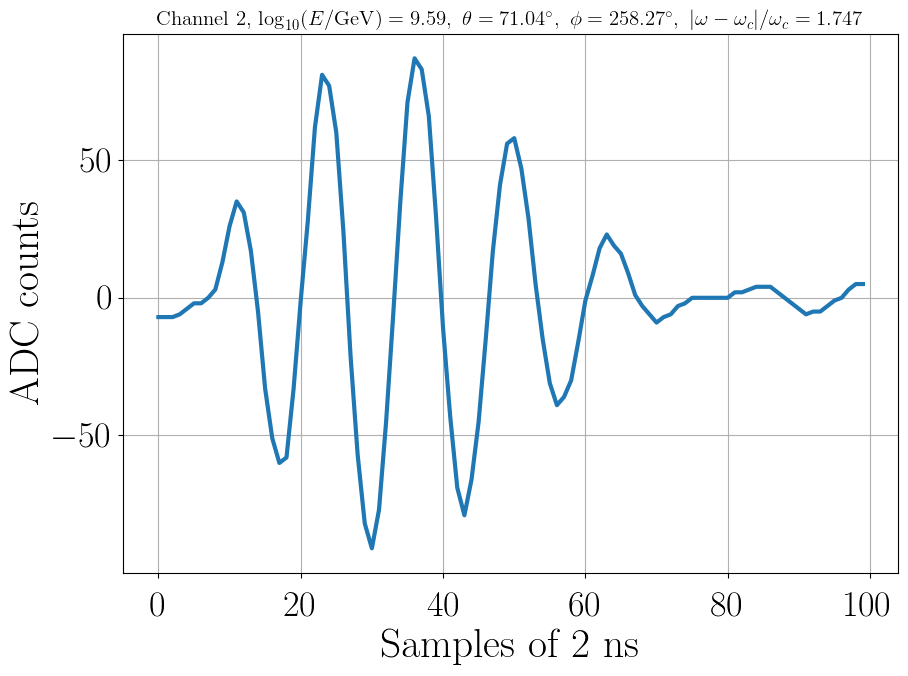

log10(E/GeV) = 9.56, theta = 67.16 deg, phi = 241.04 deg, omega = 2.447 deg, omega_c = 0.822 deg, |omega-omega_c|/omega_c = 1.977 
Vpp = [ 54.  44. 183.] ADC counts, pulse_width = [-1. -1. 20.] ADC samples, n_peaks = [0. 0. 4.], peak_ratio = [-1.         -1.          1.03333333], peak_dist = [-1. -1.  7.] ADC samples


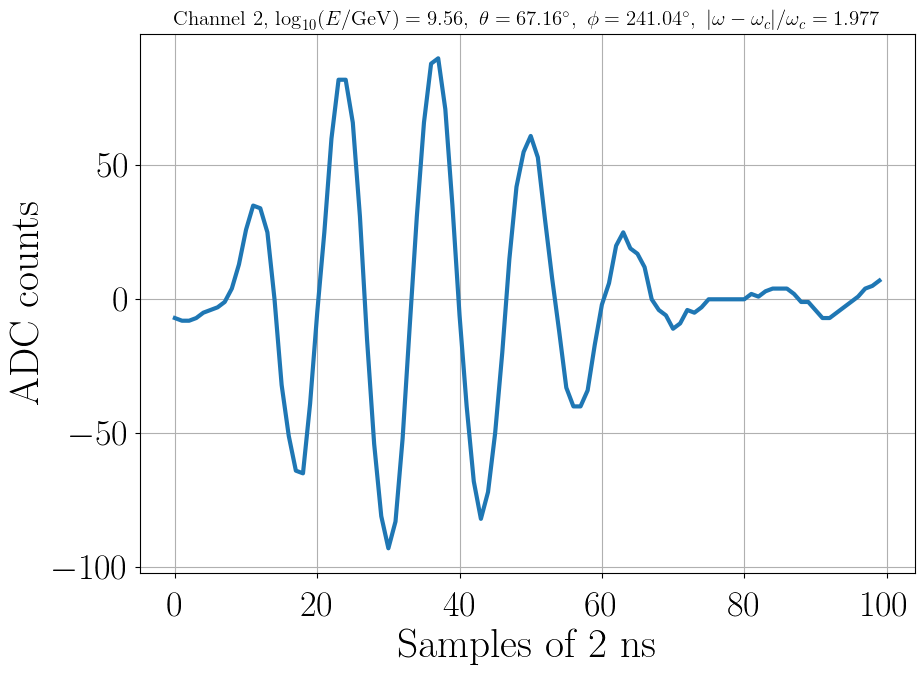

log10(E/GeV) = 9.39, theta = 85.61 deg, phi = 103.54 deg, omega = 0.449 deg, omega_c = 0.489 deg, |omega-omega_c|/omega_c = 0.081 
Vpp = [528.  70. 187.] ADC counts, pulse_width = [ 4. -1.  0.] ADC samples, n_peaks = [3. 0. 1.], peak_ratio = [ 1.66666667 -1.          0.        ], peak_dist = [ 2. -1.  0.] ADC samples


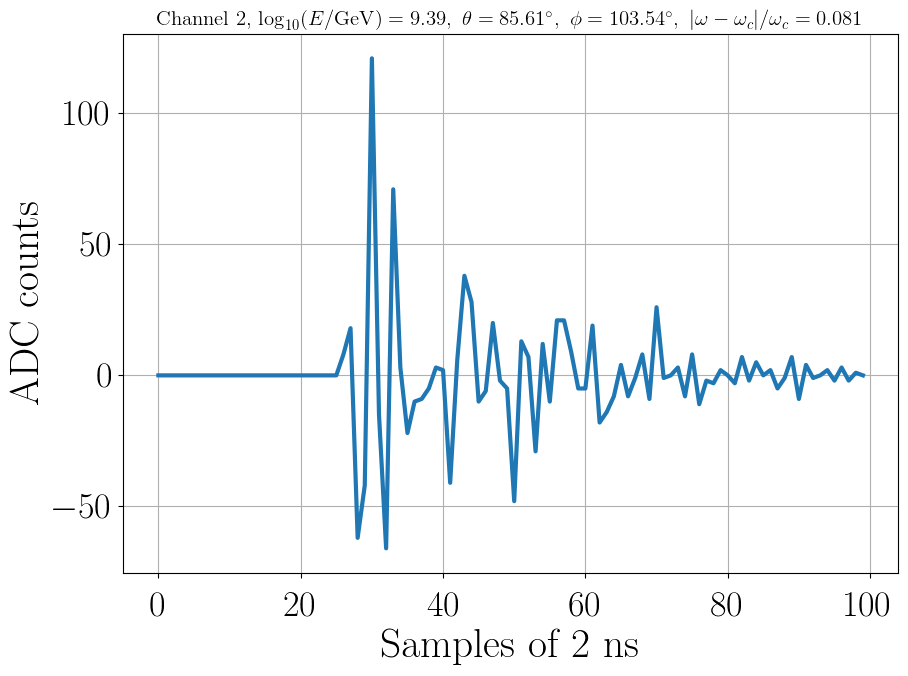

log10(E/GeV) = 9.04, theta = 79.10 deg, phi = 131.70 deg, omega = 0.719 deg, omega_c = 0.648 deg, |omega-omega_c|/omega_c = 0.110 
Vpp = [535. 542. 201.] ADC counts, pulse_width = [ 4.  4. 14.] ADC samples, n_peaks = [3. 3. 2.], peak_ratio = [1.5        1.52093023 1.54666667], peak_dist = [ 2.  2. 14.] ADC samples


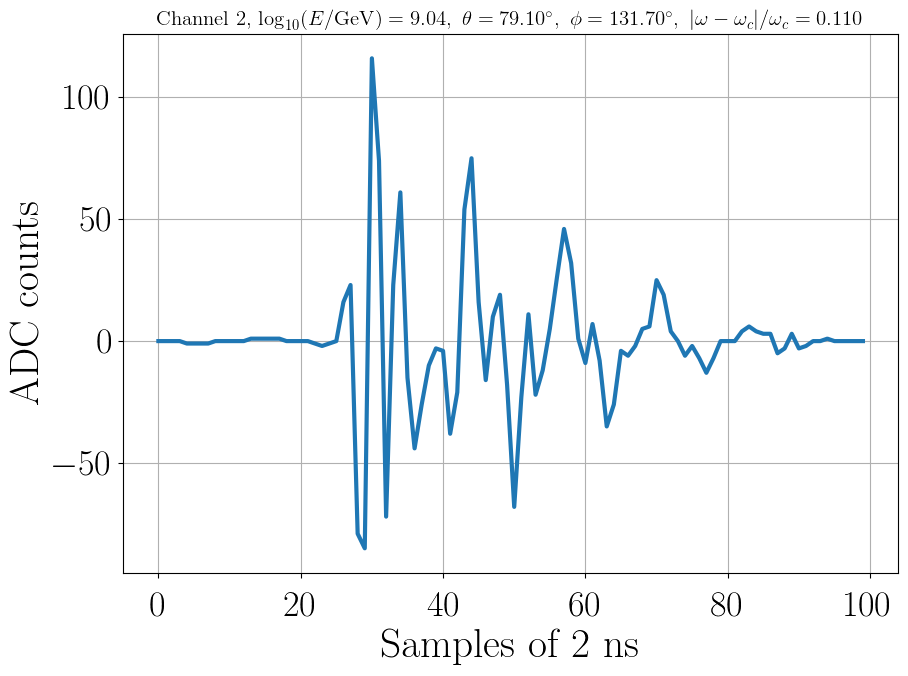

log10(E/GeV) = 9.56, theta = 81.47 deg, phi = 25.62 deg, omega = 0.734 deg, omega_c = 0.566 deg, |omega-omega_c|/omega_c = 0.296 
Vpp = [405. 998. 145.] ADC counts, pulse_width = [5. 8. 0.] ADC samples, n_peaks = [3. 4. 1.], peak_ratio = [1.25       1.70460705 0.        ], peak_dist = [3. 2. 0.] ADC samples


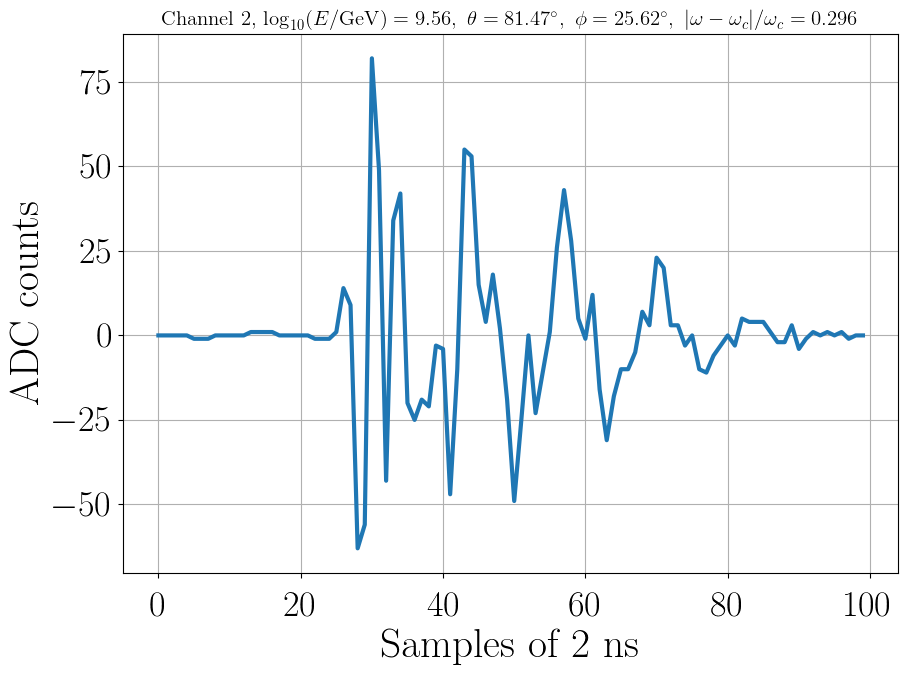

log10(E/GeV) = 9.15, theta = 78.26 deg, phi = 43.43 deg, omega = 0.429 deg, omega_c = 0.628 deg, |omega-omega_c|/omega_c = 0.318 
Vpp = [629. 722. 211.] ADC counts, pulse_width = [ 7.  7. 15.] ADC samples, n_peaks = [4. 4. 3.], peak_ratio = [1.3040293  1.46416382 1.11      ], peak_dist = [2. 2. 2.] ADC samples


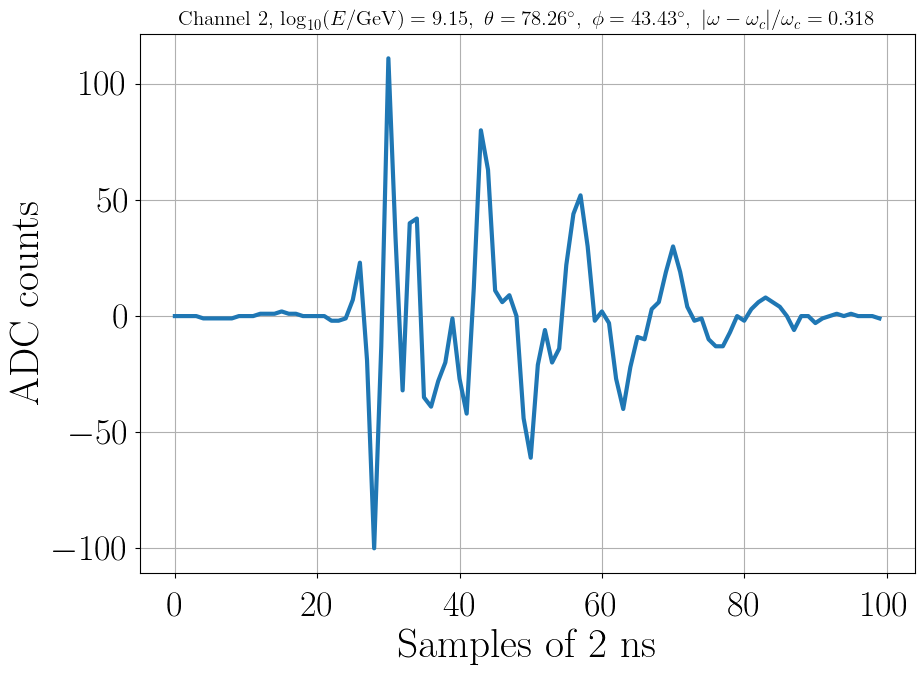

log10(E/GeV) = 9.47, theta = 80.14 deg, phi = 215.06 deg, omega = 0.330 deg, omega_c = 0.588 deg, |omega-omega_c|/omega_c = 0.439 
Vpp = [ 728. 1130.  322.] ADC counts, pulse_width = [ 8.  8. 29.] ADC samples, n_peaks = [4. 4. 6.], peak_ratio = [1.17313433 1.08872458 1.23611111], peak_dist = [2. 2. 2.] ADC samples


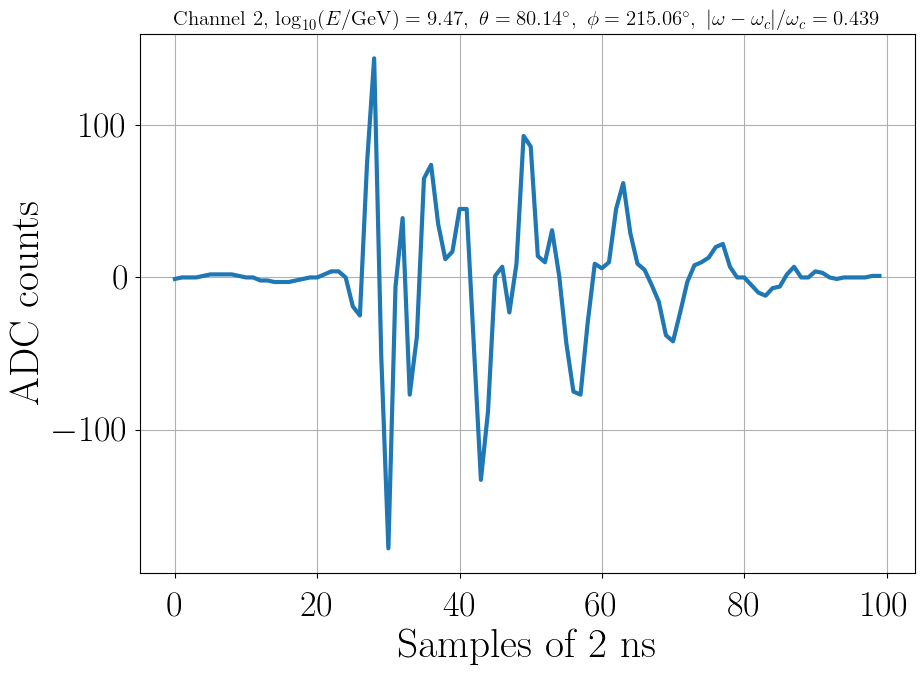

log10(E/GeV) = 9.60, theta = 80.41 deg, phi = 105.83 deg, omega = 0.974 deg, omega_c = 0.622 deg, |omega-omega_c|/omega_c = 0.567 
Vpp = [423. 129. 169.] ADC counts, pulse_width = [ 5. -1. 13.] ADC samples, n_peaks = [3. 0. 3.], peak_ratio = [ 1.31147541 -1.          1.18987342], peak_dist = [ 3. -1. 13.] ADC samples


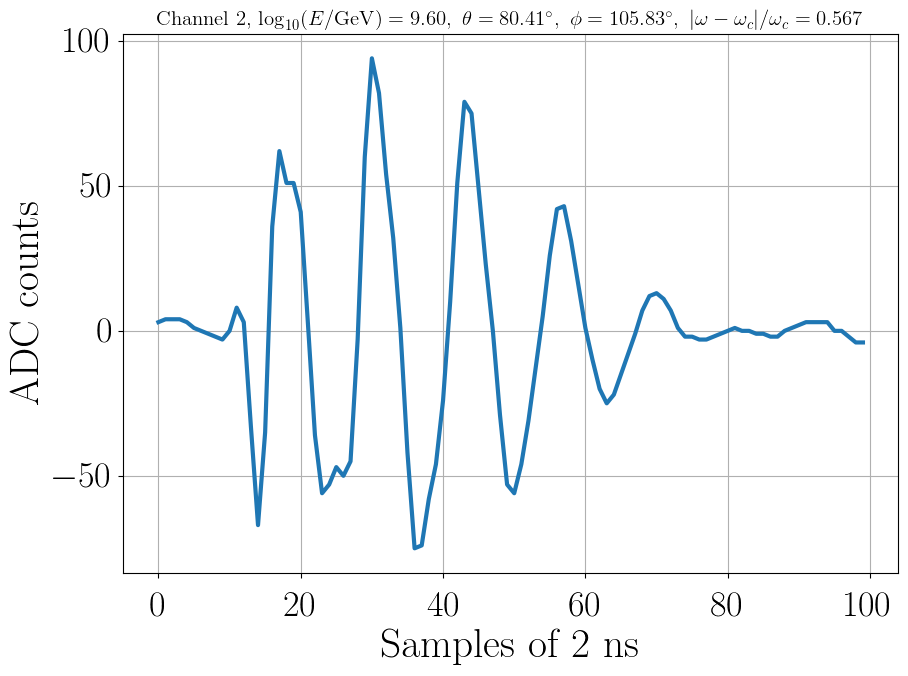

log10(E/GeV) = 9.47, theta = 77.68 deg, phi = 53.93 deg, omega = 0.227 deg, omega_c = 0.621 deg, |omega-omega_c|/omega_c = 0.634 
Vpp = [1135.  864.  335.] ADC counts, pulse_width = [ 8.  8. 34.] ADC samples, n_peaks = [4. 4. 8.], peak_ratio = [1.01241135 1.16       1.11695906], peak_dist = [ 3.  3. 13.] ADC samples


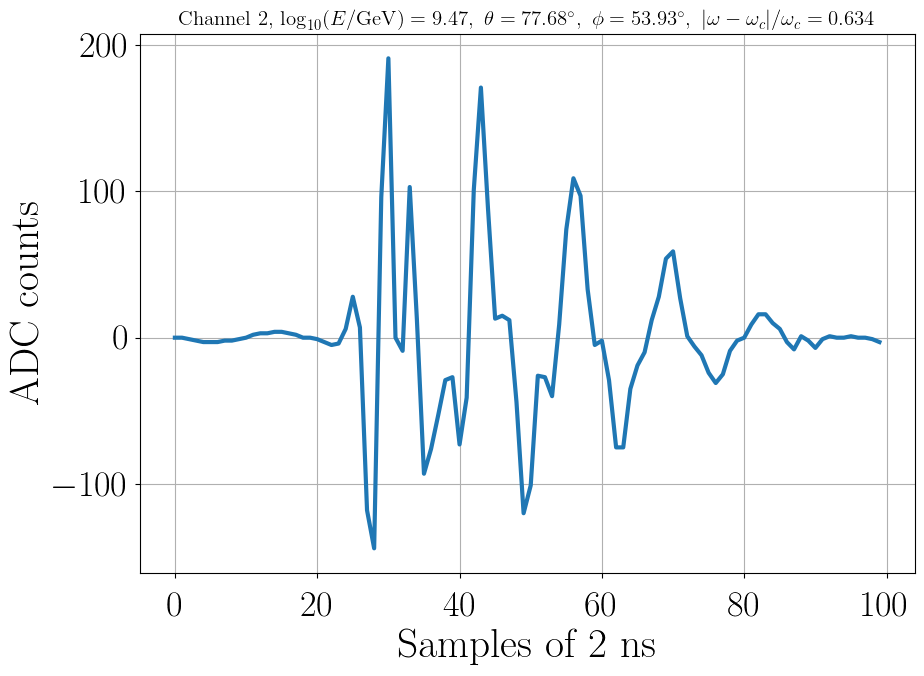

log10(E/GeV) = 9.59, theta = 79.16 deg, phi = 91.05 deg, omega = 1.058 deg, omega_c = 0.610 deg, |omega-omega_c|/omega_c = 0.734 
Vpp = [281.  23. 157.] ADC counts, pulse_width = [ 6. -1. 13.] ADC samples, n_peaks = [3. 0. 2.], peak_ratio = [ 1.28455285 -1.          1.13333333], peak_dist = [ 3. -1. 13.] ADC samples


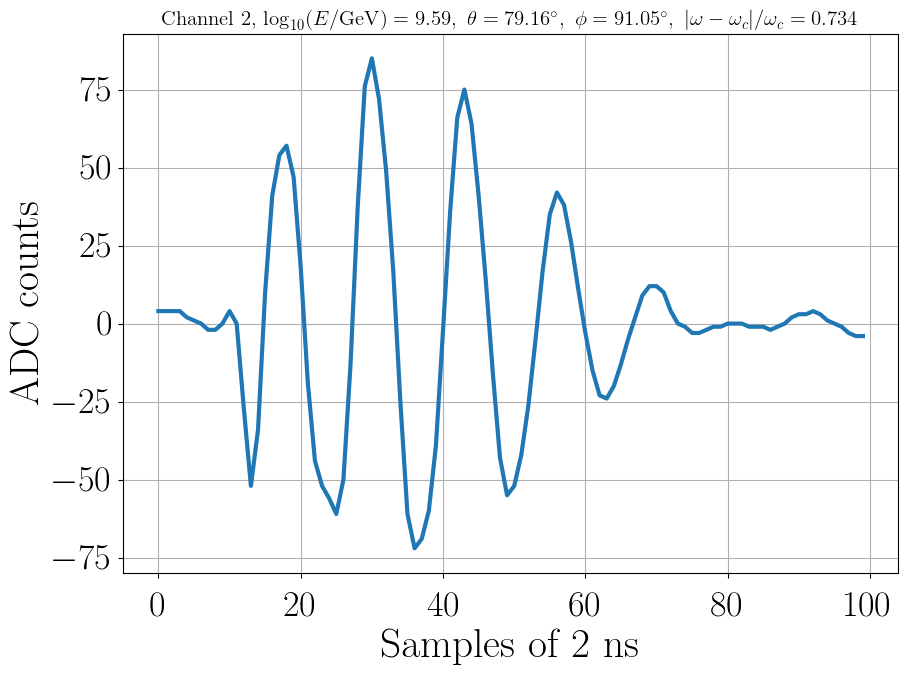

log10(E/GeV) = 9.44, theta = 77.66 deg, phi = 264.45 deg, omega = 1.194 deg, omega_c = 0.631 deg, |omega-omega_c|/omega_c = 0.891 
Vpp = [185.  25. 146.] ADC counts, pulse_width = [ 0. -1.  0.] ADC samples, n_peaks = [1. 0. 1.], peak_ratio = [ 0. -1.  0.], peak_dist = [ 0. -1.  0.] ADC samples


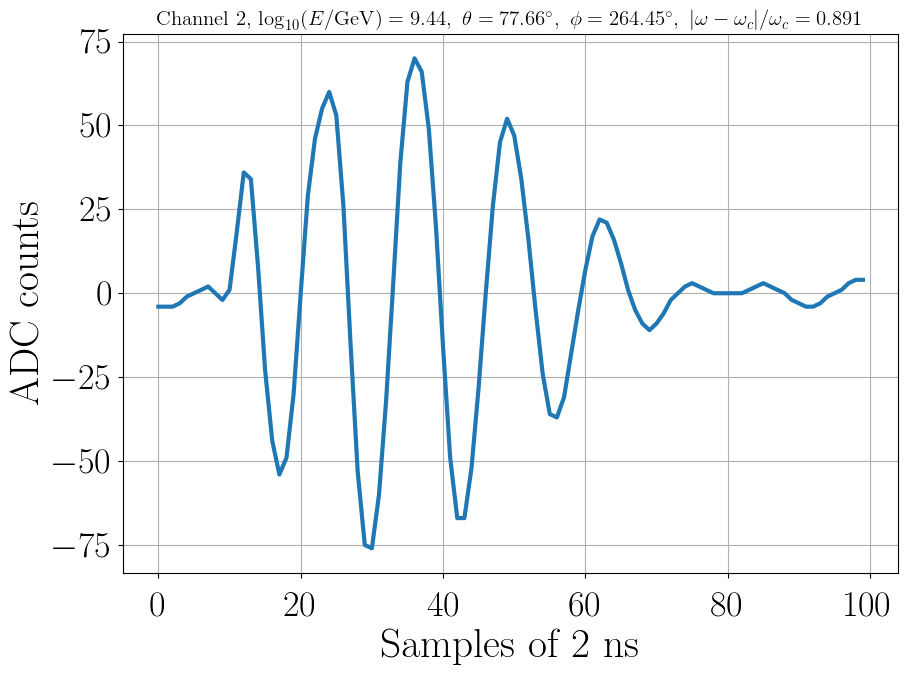

log10(E/GeV) = 9.53, theta = 83.59 deg, phi = 118.93 deg, omega = 0.041 deg, omega_c = 0.513 deg, |omega-omega_c|/omega_c = 0.920 
Vpp = [539. 242. 183.] ADC counts, pulse_width = [ 5.  3. 15.] ADC samples, n_peaks = [3. 2. 3.], peak_ratio = [1.11372549 1.06837607 1.34615385], peak_dist = [2. 3. 2.] ADC samples


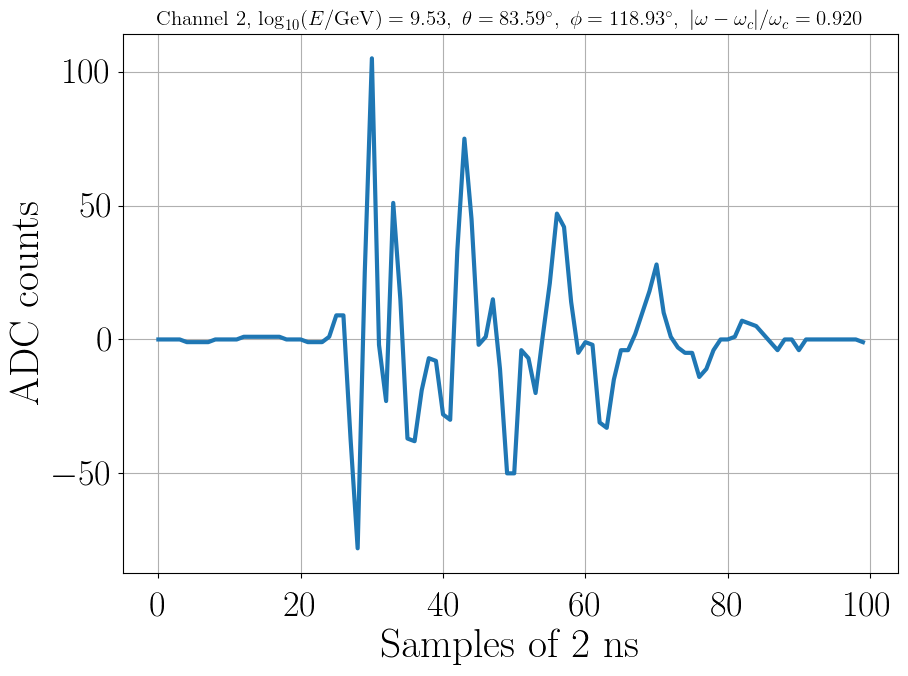

log10(E/GeV) = 9.45, theta = 77.57 deg, phi = 268.48 deg, omega = 1.270 deg, omega_c = 0.629 deg, |omega-omega_c|/omega_c = 1.019 
Vpp = [275.  22. 201.] ADC counts, pulse_width = [ 6. -1. 19.] ADC samples, n_peaks = [3. 0. 4.], peak_ratio = [ 1.39130435 -1.          1.11578947], peak_dist = [ 3. -1.  7.] ADC samples


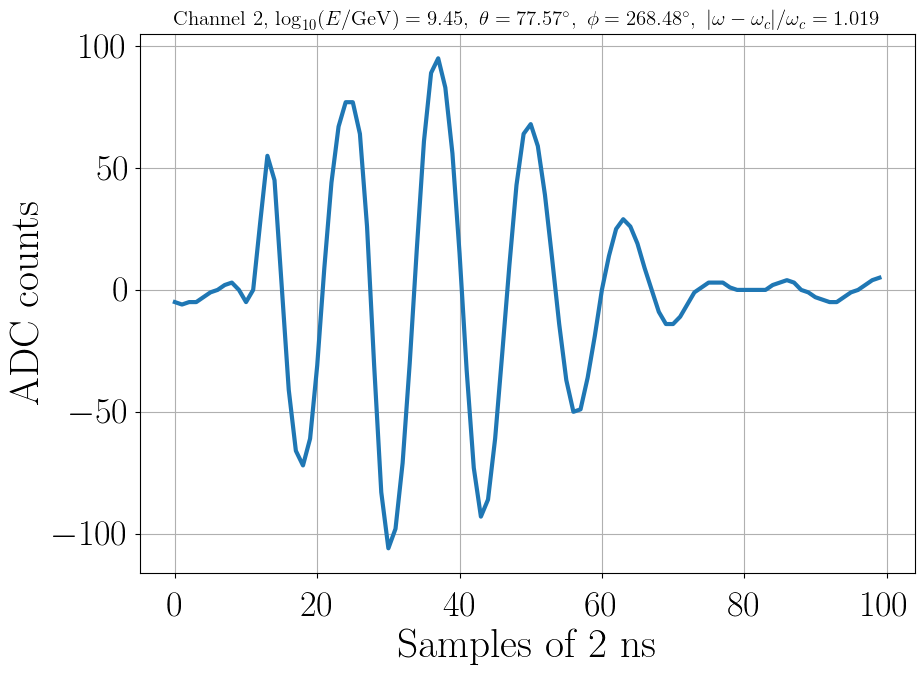

log10(E/GeV) = 9.55, theta = 77.61 deg, phi = 237.87 deg, omega = 1.400 deg, omega_c = 0.657 deg, |omega-omega_c|/omega_c = 1.130 
Vpp = [167. 113. 190.] ADC counts, pulse_width = [ 0. -1. 19.] ADC samples, n_peaks = [1. 0. 4.], peak_ratio = [ 0.         -1.          1.06521739], peak_dist = [ 0. -1.  7.] ADC samples


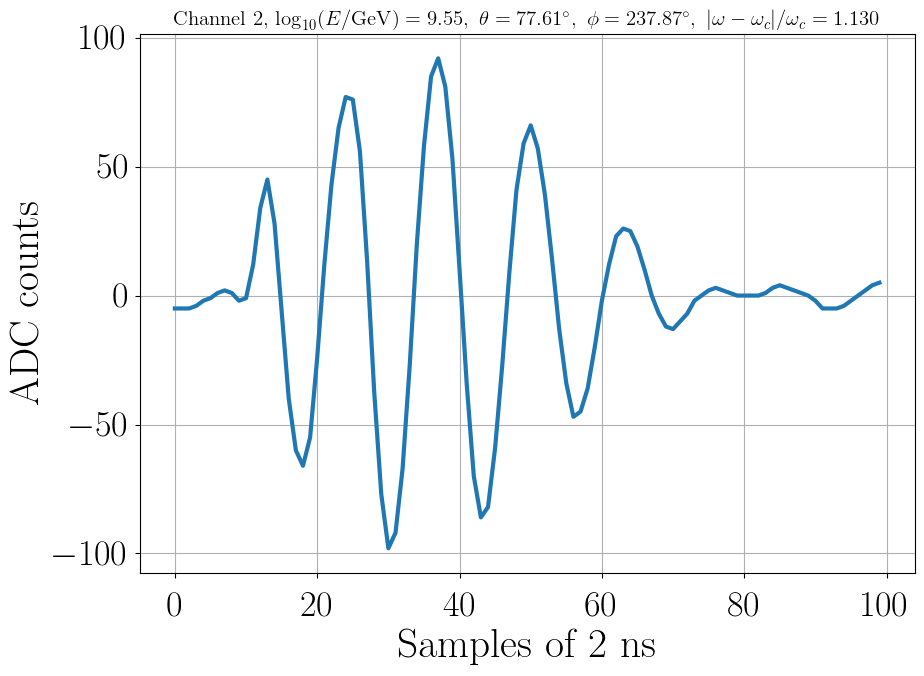

log10(E/GeV) = 9.54, theta = 77.01 deg, phi = 242.93 deg, omega = 1.430 deg, omega_c = 0.648 deg, |omega-omega_c|/omega_c = 1.209 
Vpp = [112.  55. 164.] ADC counts, pulse_width = [-1. -1.  6.] ADC samples, n_peaks = [0. 0. 2.], peak_ratio = [-1. -1.  1.], peak_dist = [-1. -1.  6.] ADC samples


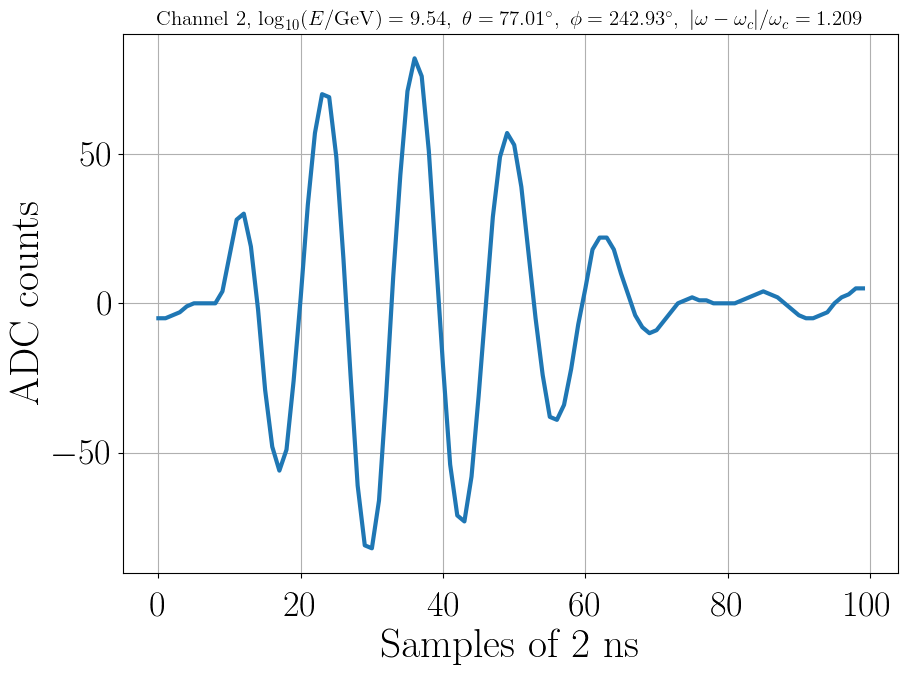

In [77]:
for k,idx in enumerate(mask_sel[:]):
    tvoltage = rt.TVoltage(vf_dir+vfile[idx])
    tvoltage.get_entry(0)

    trace = digitize( np.array(tvoltage.trace[int(du_idx[idx])]) )

    if pol == 'XY':
        max_x = np.max( np.abs(trace[0,:]) )
        max_y = np.max( np.abs(trace[1,:]) )
        pol_idx = np.argmax( [max_x,max_y] )
    if pol == 'Z':
        pol_idx = 2

    trace   = trace[pol_idx,:]
    max_pos = np.argmax(np.abs(trace))
    trace   = trace[max_pos-t_minus_peak:max_pos+t_plus_peak]

    msg  = 'log10(E/GeV) = {:.2f}, '.format(np.log10(energy[idx]))
    msg += 'theta = {:.2f} deg, '.format(zenith[idx])
    msg += 'phi = {:.2f} deg, '.format(azimuth[idx])
    msg += 'omega = {:.3f} deg, '.format(omega[idx])
    msg += 'omega_c = {:.3f} deg, '.format(omega_c[idx])
    msg += '|omega-omega_c|/omega_c = {:.3f} \n'.format(omega_diff[idx])
    msg += 'Vpp = {} ADC counts, '.format(peak_to_peak[idx])
    msg += 'pulse_width = {} ADC samples, '.format(pulse_width[idx])
    msg += 'n_peaks = {}, '.format(n_peaks[idx])
    msg += 'peak_ratio = {}, '.format(peak_ratio[idx])
    msg += 'peak_dist = {} ADC samples'.format(peak_dist[idx])

    print(msg)


    fig, ax = plt.subplots()

    ax.plot(trace)
    
    ax.set_xlabel('Samples of 2 ns')
    ax.set_ylabel('ADC counts')

    title  = f'Channel {pol_idx}, ' + r'$\log_{10}(E/\mathrm{GeV}) = ' + '{:.2f}'.format(np.log10(energy[idx]))
    title += r',~ \theta =' + '{:.2f}'.format(zenith[idx]) + r'^\circ,~ \phi = ' + '{:.2f}'.format(azimuth[idx])
    title += r'^\circ,~ |\omega-\omega_c|/\omega_c = ' + '{:.3f}'.format(omega_diff[idx]) + '$'

    ax.set_title(title,fontsize=15)

    plt.show()


    trace /= rms(trace)
    templates[k] = trace

    tvoltage.stop_using()
    tvoltage.close_file()

In [78]:
lib_path  = '/sps/grand/pcorrea/nutrig/template/lib/'
lib_name  = 'templates_{}.npz'.format(pol)
meta_name = 'metadata_{}.npz'.format(pol)

In [79]:
np.savez(lib_path+lib_name,
         templates=templates)

np.savez(lib_path+meta_name,
         energy=energy[mask_sel],
         zenith=zenith[mask_sel],
         azimuth=azimuth[mask_sel],
         omega=omega[mask_sel],
         omega_c=omega_c[mask_sel],
         omega_diff=omega_diff[mask_sel],
         vf=vfile[mask_sel],
         du_idx=du_idx[mask_sel])

## Template analysis

In [96]:
pol = 'XY'

lib_path  = '/sps/grand/pcorrea/nutrig/template/lib/'
lib_name  = 'templates_{}.npz'.format(pol)
meta_name = 'metadata_{}.npz'.format(pol)

f = np.load(lib_path+lib_name)
templates = f['templates']

f = np.load(lib_path+meta_name)
energy     = f['energy']
zenith     = f['zenith']
aximuth    = f['azimuth']
omega      = f['omega']
omega_c    = f['omega_c']
omega_diff = f['omega_diff']
vf         = f['vf']
du_idx     = f['du_idx']

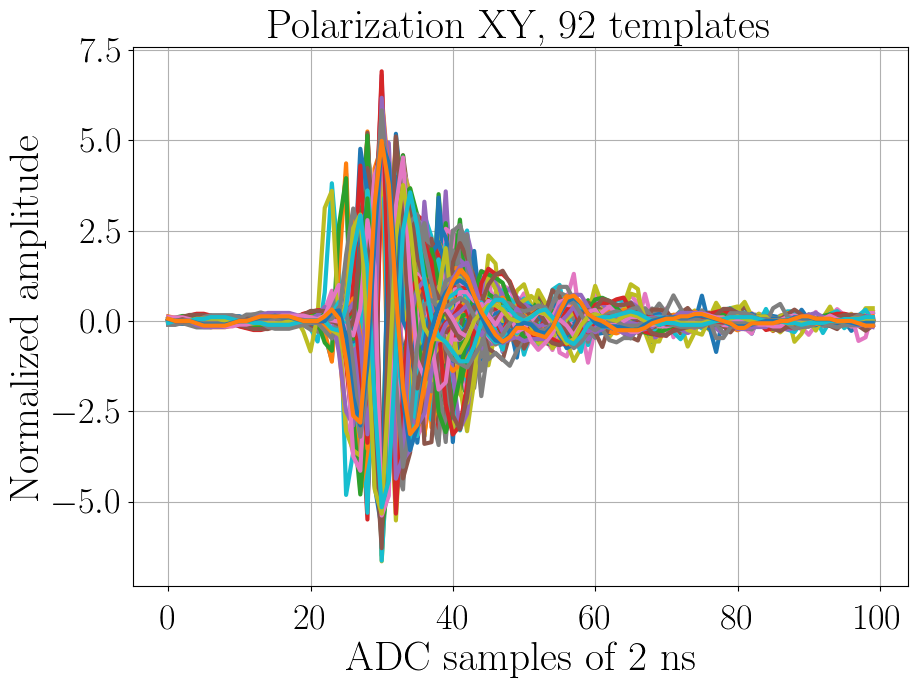

In [97]:
fig, ax = plt.subplots()

ax.plot(templates.T)

ax.set_xlabel('ADC samples of 2 ns')
ax.set_ylabel('Normalized amplitude')

ax.set_title(f'Polarization {pol}, {len(templates)} templates')

plt.show()

 Make a consistency check to see whether the cross correlation of the templates is maximal when the templates are identical. Also gives us an idea of how "different" the different templates are.

In [98]:
corr_grid = np.zeros((len(templates),len(templates)))

for i, template_1 in enumerate(templates):
    #norm = np.correlate(template_1**2,template_1**2)

    for j, template_2 in enumerate(templates):
        corr = np.correlate(template_1,template_2)

        corr_grid[i,j] = corr #/norm

In [99]:
template_id = np.arange(1,len(templates)+1)
x, y = np.meshgrid(template_id,template_id)

/scratch/users/p/pcorrea/ipykernel_10598/2219621412.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  corr_plot = plt.pcolormesh(x,


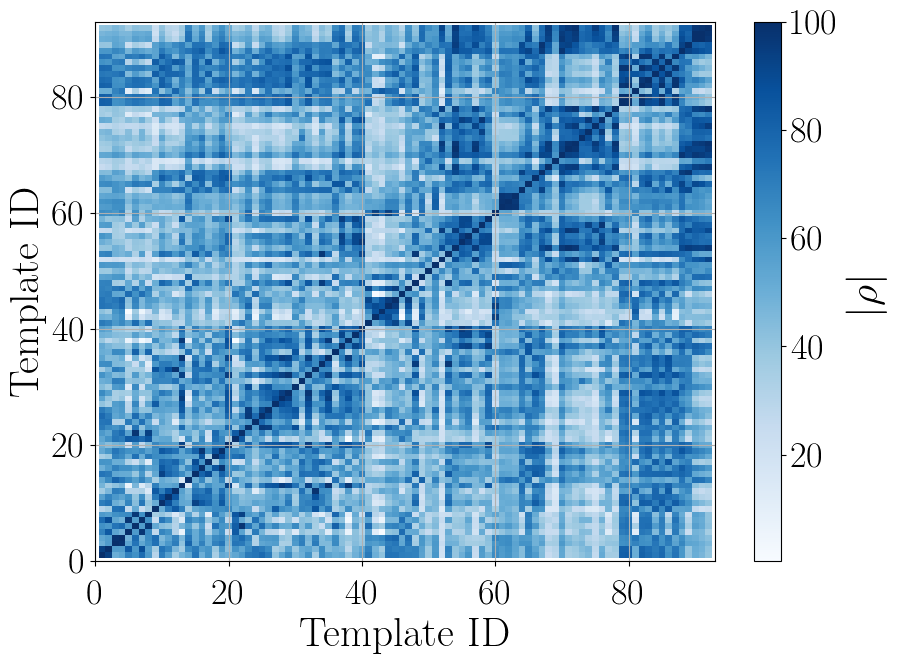

In [100]:
fig, ax = plt.subplots()
#fig.set_size_inches(10,10)

corr_plot = plt.pcolormesh(x,
                           y,
                           np.abs(corr_grid),
                           cmap='Blues',
                           #norm=matplotlib.colors.LogNorm()
                           )

fig.colorbar(corr_plot, ax=ax, label=r'$|\rho|$')

lim = [0,len(templates)+1]
ax.set_xlim(lim)
ax.set_ylim(lim)

label = 'Template ID'
ax.set_xlabel(label)
ax.set_ylabel(label)

ax.grid(True)

plt.show()

In [85]:
np.argmax(corr_grid,axis=1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91])